# Project information

**Which supermarket has the best deals?**

Made by group 3:
* Eduardo González Agüero (100472704)
* Sara Piñas García (100472784)
* María Gómez Rey (100472836)
* María Ángeles Magro Garrote (100472867)

# Scrappings

## Masymas valencia

It is from Valencia because it needs to put a postal code, and we chose a Valencian one.

In [ ]:
from selenium import webdriver
from selenium.webdriver.common.by import By

options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
driver = webdriver.Chrome(options=options)

In [ ]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from bs4 import BeautifulSoup
import time
import pandas as pd
import numpy as np

# Base URL of the supermarket page
base_url = "https://tienda.masymas.com/es/c"

def get_page_content(url):
    driver.get(url)
    time.sleep(5)  # Wait for the page to fully load
    page_source = driver.page_source
    return BeautifulSoup(page_source, 'html.parser')

# Function to extract product details
# Everything has been obtained watching the structure of the webpage
def get_product_details(soup):
    products = []
    product_containers = driver.find_elements(By.CSS_SELECTOR, 'cmp-widget-product.grid__widget--prod')
    print(f"Found {len(product_containers)} products")

    for product in product_containers:
        try:
            name_tag = product.find_element(By.XPATH, ".//a[contains(@id, 'grid-widget--descr')]")
            name = name_tag.text.strip() if name_tag else np.nan
        except Exception as e:
            name = np.nan
            print(f"Error retrieving name: {e}")

        try:
            brand_tag = product.find_element(By.XPATH, ".//span[contains(@id, 'grid-widget--brand')]")
            brand = brand_tag.text.strip() if brand_tag else np.nan
        except Exception as e:
            brand = np.nan
            print(f"Error retrieving brand: {e}")

        try:
            price_tag = product.find_element(By.CSS_SELECTOR, 'span.widget-prod__price--bold')
            price = price_tag.text.strip() if price_tag else np.nan
        except Exception as e:
            price = np.nan
            print(f"Error retrieving price: {e}")

        try:
            price_per_kilo_tag = product.find_element(By.CSS_SELECTOR, 'div.widget-prod__info-unitprice')
            price_per_kilo = price_per_kilo_tag.text.strip() if price_per_kilo_tag else np.nan
        except Exception as e:
            price_per_kilo = np.nan
            print(f"Error retrieving price/kilo: {e}")

        # Add to product list
        products.append({
            'name': name,
            'brand': brand,
            'price': price,
            'price_per_kilo': price_per_kilo,
            'Super': 'Masymas'
        })

    return products

# Main function to iterate through pages using Selenium
def scrape_supermarket(base_url, max_pages=1):
    all_products = []

    # The number of pages and the categories of the link have been manually obtained to
    # avoid errors
    categories = [64, 65, 61, 62]
    max_pages = [150, 55, 47, 19]
    i = 0

    for category in categories:
        # Change the url to the proper one
        current_url = f"{base_url}/{category}?orderById=5"

        for page in range(1, max_pages[i] + 1):
            url = f"{current_url}&page={page}"
            print(f"Scraping page {page}: {url}")

            # Get page content using Selenium
            soup = get_page_content(url)

            # Get product details from the page
            products = get_product_details(soup)

            # If no products found, break the loop
            if not products:
                print("No products found, stopping.")
                break

            # Add the products to the all_products list
            all_products.extend(products)

        i += 1

    return all_products

# Run the scraper
supermarket_data = scrape_supermarket(base_url, max_pages=1)

df = pd.DataFrame(supermarket_data)
df.to_csv("masymas_data.csv", index=False, sep = ";")

print(df)

# Close the driver after scraping is complete
driver.quit()


## Sanchez Romero

It has the same structure as the previous one

In [ ]:
from selenium import webdriver
from selenium.webdriver.common.by import By

options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
driver = webdriver.Chrome(options=options)

In [ ]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from bs4 import BeautifulSoup
import time
import pandas as pd
import numpy as np

# Base URL of the supermarket page
base_url = "https://sanchez-romero.online/es/c"

def get_page_content(url):
    driver.get(url)
    time.sleep(5)  # Wait for the page to fully load
    page_source = driver.page_source
    return BeautifulSoup(page_source, 'html.parser')

def get_product_details(soup):
    products = []
    product_containers = driver.find_elements(By.CSS_SELECTOR, 'cmp-widget-product.grid__widget--prod')
    print(f"Found {len(product_containers)} products")

    for product in product_containers:
        try:
            name_tag = product.find_element(By.XPATH, ".//a[contains(@id, 'grid-widget--descr')]")
            name = name_tag.text.strip() if name_tag else np.nan
        except Exception as e:
            name = np.nan
            print(f"Error retrieving name: {e}")

        try:
            brand_tag = product.find_element(By.XPATH, ".//span[contains(@id, 'grid-widget--brand')]")
            brand = brand_tag.text.strip() if brand_tag else np.nan
        except Exception as e:
            brand = np.nan
            print(f"Error retrieving brand: {e}")

        try:
            price_tag = product.find_element(By.CSS_SELECTOR, 'span.widget-prod__price--bold')
            price = price_tag.text.strip() if price_tag else np.nan
        except Exception as e:
            price = np.nan
            print(f"Error retrieving price: {e}")

        try:
            price_per_kilo_tag = product.find_element(By.CSS_SELECTOR, 'div.widget-prod__info-unitprice')
            price_per_kilo = price_per_kilo_tag.text.strip() if price_per_kilo_tag else np.nan
        except Exception as e:
            price_per_kilo = np.nan
            print(f"Error retrieving price/kilo: {e}")

        products.append({
            'name': name,
            'brand': brand,
            'price': price,
            'price_per_kilo': price_per_kilo,
            'Super': 'Sanchez Romero'
        })

    return products

def scrape_supermarket(base_url, max_pages=1):
    all_products = []

    # Again the categories have been taken by hand
    categories = ['la-despensa/7229797920', 'el-mercado/7229798002', 'bebidas/7229798063', 'refrigerados/7229798382', 'congelados-y-helados/7229798444']
    max_pages = [120, 68, 45, 11, 10]
    i = 0

    for category in categories:
        current_url = f"{base_url}/{category}?orderById=7"

        for page in range(1, max_pages[i] + 1):
            url = f"{current_url}&page={page}"
            print(f"Scraping page {page}: {url}")

            soup = get_page_content(url)

            products = get_product_details(soup)

            if not products:
                print("No products found, stopping.")
                break

            all_products.extend(products)

        i += 1

    return all_products

supermarket_data = scrape_supermarket(base_url, max_pages=1)

df = pd.DataFrame(supermarket_data)
df.to_csv("sanchezromero_data.csv", index=False, sep = ";")

print(df)

# Close the driver after scraping is complete
driver.quit()

## Consum

Same structure

In [ ]:
from selenium import webdriver
from selenium.webdriver.common.by import By

options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
driver = webdriver.Chrome(options=options)

In [ ]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from bs4 import BeautifulSoup
import time
import pandas as pd
import numpy as np

base_url = "https://tienda.consum.es/es/c"

def get_page_content(url):
    driver.get(url)
    time.sleep(5)
    page_source = driver.page_source
    return BeautifulSoup(page_source, 'html.parser')

def get_product_details(soup):
    products = []
    product_containers = driver.find_elements(By.CSS_SELECTOR, 'cmp-widget-product.grid__widget--prod')
    print(f"Found {len(product_containers)} products")

    for product in product_containers:
        try:
            name_tag = product.find_element(By.XPATH, ".//a[contains(@id, 'grid-widget--descr')]")
            name = name_tag.text.strip() if name_tag else np.nan
        except Exception as e:
            name = np.nan
            print(f"Error retrieving name: {e}")

        try:
            brand_tag = product.find_element(By.XPATH, ".//span[contains(@id, 'grid-widget--brand')]")
            brand = brand_tag.text.strip() if brand_tag else np.nan
        except Exception as e:
            brand = np.nan
            print(f"Error retrieving brand: {e}")

        try:
            price_tag = product.find_element(By.CSS_SELECTOR, 'span.widget-prod__price--bold')
            price = price_tag.text.strip() if price_tag else np.nan
        except Exception as e:
            price = np.nan
            print(f"Error retrieving price: {e}")

        try:
            price_per_kilo_tag = product.find_element(By.CSS_SELECTOR, 'div.widget-prod__info-unitprice')
            price_per_kilo = price_per_kilo_tag.text.strip() if price_per_kilo_tag else np.nan
        except Exception as e:
            price_per_kilo = np.nan
            print(f"Error retrieving price/kilo: {e}")

        products.append({
            'name': name,
            'brand': brand,
            'price': price,
            'price_per_kilo': price_per_kilo,
            'Super': 'Consum'
        })

    return products

def scrape_supermarket(base_url, max_pages=1):
    all_products = []

    categories = ['despensa/2811', 'bebidas/1690', 'frescos/2812', 'horno/4108', 'platos-preparados/1833', 'congelados/1783', 'ecologico-saludable/5281']
    max_pages = [154, 52, 60, 9, 13, 21, 4]
    i = 0

    for category in categories:
        current_url = f"{base_url}/{category}?orderById=5"

        for page in range(1, max_pages[i] + 1):
            url = f"{current_url}&page={page}"
            print(f"Scraping page {page}: {url}")

            soup = get_page_content(url)

            products = get_product_details(soup)

            if not products:
                print("No products found, stopping.")
                break

            all_products.extend(products)

        i += 1

    return all_products

supermarket_data = scrape_supermarket(base_url, max_pages=1)

df = pd.DataFrame(supermarket_data)
df.to_csv("consum_data.csv", index=False, sep = ";")

print(df)

driver.quit()

## Sedovin

This one has a different structure from the other two

In [ ]:
from selenium import webdriver
from selenium.webdriver.common.by import By

# options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
driver = webdriver.Chrome(options=options)

In [ ]:
import re
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.by import By
from bs4 import BeautifulSoup
import time

# Base URL
url = "https://www.sedovin.com/alimentacion/"

# This one has an infinite scroll structure
def get_page_content(url):
    driver.get(url)
    time.sleep(2)
    page_source = driver.page_source
    return BeautifulSoup(page_source, 'html.parser')

def extract_brand(name):
    # The brand starts always in the second word with capital letters
    # and finishes before the number of the weight
    # First, find all capitalized words with a regular expression
    capitalized_words = re.findall(r'\b[A-Z][a-z]*\b', name)
    print(f"Capitalized words found: {capitalized_words}")

    # Secondly, find the weight pattern with regular expressions
    # (a number followed by letters for units)
    weight_match = re.search(r'\d+(\.\d+)?\s*[a-zA-Z]+', name)
    print(f"Weight match found: {weight_match.group(0) if weight_match else 'None'}")

    # Get the words in between if it has been obtained
    if len(capitalized_words) > 1 and weight_match:
        # Get the second capitalized word (start of the brand)
        brand_start = capitalized_words[1]

        # Find the position of the second capitalized word in the name string
        second_word_pos = name.find(capitalized_words[1])

        # Get the portion of the name between the second capitalized word and the weight match
        brand_end_portion = name[second_word_pos + len(capitalized_words[1]):weight_match.start()].strip()

        # Now, find all capitalized words between the second capitalized word and weight
        additional_words = re.findall(r'\b[A-Z][a-z]*\b', brand_end_portion)

        if additional_words:
            # Combine the second word with the additional words before the weight
            brand_part = f"{brand_start} {' '.join(additional_words)}"
        else:
            # If no additional words, just use the second word
            brand_part = brand_start

        print(f"Extracted brand: '{brand_part}'")
        return brand_part if brand_part else 'No brand found'

    print("No brand found")
    return 'No brand found'

# Function to extract the first number and its unit as the weight
def extract_weight(name):
    # Use a regular expression to obtain this information
    match = re.search(r'(\d+(\.\d+)?\s*[a-zA-Z]+)', name)
    return match.group(0) if match else 'No weight found'

def get_product_details(soup):
    products = []
    # Get all info based on the page structure
    product_containers = driver.find_elements(By.CSS_SELECTOR, 'article.item')

    for product in product_containers:
        try:
            name_tag = product.find_element(By.CSS_SELECTOR, 'div.tvproduct-name.product-title h6')
            name = name_tag.text.strip() if name_tag else 'No name found'
            brand = extract_brand(name)
            weight = extract_weight(name)
        except Exception as e:
            name = 'No name found'
            brand = 'No brand found'
            weight = 'No weight found'
            print(f"Error retrieving name, brand, or weight: {e}")

        try:
            price_tag = product.find_element(By.CSS_SELECTOR, 'span.price')
            price = price_tag.text.strip() if price_tag else 'No price found'
        except Exception as e:
            price = 'No price found'
            print(f"Error retrieving price: {e}")

        products.append({
            'name': name,
            'brand': brand,
            'weight': weight,
            'price': price,
            'Super': 'Sedovin'
        })

    return products

def scrape_supermarket(base_url):
    all_products = []
    print(f"Scraping page: {url}")
    soup = get_page_content(url)
    products = get_product_details(soup)
    all_products.extend(products)
    return all_products

supermarket_data = scrape_supermarket(url)

df = pd.DataFrame(supermarket_data)
df.to_csv("sedovin_data.csv", index=False, sep = ";")

driver.quit()

##HiperDino

Scrapping performed with requests

In [ ]:
# Retrieve the URL by using UserAgents and BeautifulSoup
web_dino = "https://www.hiperdino.es/c9505/"
user_agent = "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/128.0.0.0 Safari/537.36"
headers = {"User-Agent": user_agent}
page_dino = requests.get(web_dino, headers = headers)
soup_dino = BeautifulSoup(page_dino.text, "html.parser")

In [ ]:
# Retrieve all the links of the main page, each corresponds to a category with all
# products in it.

h = soup_dino.find_all('a', class_='link--wrapper')
subcategory_dino_links = [link.get('href') for link in h]

#Filtering of the links that do not contain food products
inicio_url = "https://www.hiperdino.es/c9505/alimentacion/aceites.html"
fin_url = "https://www.hiperdino.es/c9505/derivados-lacteos-y-huevos/yogur-y-petit.html"
inicio_index = subcategory_dino_links.index(inicio_url)
fin_index = subcategory_dino_links.index(fin_url) + 1
filtered_links = subcategory_dino_links[inicio_index:fin_index]

In [ ]:
# Scrap all the info from all products in each link
productos = []
for url in filtered_links:
    page = requests.get(url, headers=headers)
    soup = BeautifulSoup(page.text, "html.parser")

    productos_contenedores = soup.find_all("div", class_="item--container flex-container flex-column")

    for contenedor in productos_contenedores:

            nombre = contenedor.find("div", class_="description__text name").get_text(strip=True)
            precio = contenedor.find("div", class_="price__text price").get_text(strip=True)

            productos.append({
                "nombre": nombre,
                "precio": precio
            })

In [ ]:
# Iterate though all scrapped products and use regular expressions because
# the weight is contained in it, so:
# Find the first number and take all info from there to a new category

for producto in productos:
    nombre = producto["nombre"]
    match = re.search(r'(\d+\s*\w+)$', nombre)
    if match:
        peso = match.group(0)
        nombre_sin_peso = nombre[:match.start()].strip()
        producto["nombre"] = nombre_sin_peso
        producto["peso"] = peso
    else:
        producto["peso"] = "N/A"


In [ ]:
for producto in productos:
    print(f"Nombre: {producto['nombre']}, Precio: {producto['precio']}, Peso: {producto['peso']}")

Nombre: Abril aceite especial freir, Precio: 1,75 €, Peso: 1 l
Nombre: Abril aceite spray, Precio: 2,25 €, Peso: 200 ml
Nombre: Borges aceite aromático 3 pimientas y guindilla vidrio, Precio: 4,15 €, Peso: 200 ml
Nombre: Borges aceite aromático albahaca vidrio, Precio: 4,15 €, Peso: 200 ml
Nombre: Ifa Eliges aceite de orujo de oliva, Precio: 4,99 €, Peso: 1 l
Nombre: La Masía aceite de aguacate, Precio: 5,99 €, Peso: 250 ml
Nombre: La Masía aceite de oliva orujo, Precio: 4,99 €, Peso: 1 l
Nombre: Abrilsol aceite de girasol refinado, Precio: 1,69 €, Peso: 1 l
Nombre: Abrilsol aceite girasol, Precio: 8,13 €, Peso: 5 l
Nombre: Abrisol aceite de girasol refinado, Precio: 3,25 €, Peso: 2 l
Nombre: Happyday aceite refinado de girasol, Precio: 2,59 €, Peso: 1 l
Nombre: Happyday aceite refinado de girasol, Precio: 8,55 €, Peso: 5 l
Nombre: HiperDino aceite refinado de girasol, Precio: 1,34 €, Peso: 1 l
Nombre: HiperDino aceite refinado de girasol, Precio: 6,52 €, Peso: 5 l
Nombre: La Masía mas

In [ ]:
# Now do the same but this time with the Brand. the name contains the brand which
# is represented by a Capital letter
# And do not take XL cause by observing the products, the only capital letters contained are the ones are the ones of the brands,
# and teh size of the eggs.
for producto in productos:
    nombre = producto["nombre"]

    palabras_marca = [palabra for palabra in re.findall(r'\b[A-ZÁÉÍÓÚÑ][a-záéíóúñA-ZÁÉÍÓÚÑ]{1,}\b', nombre) if palabra != "XL"]
    marca = " ".join(palabras_marca)
    nombre_sin_marca = nombre
    for palabra in palabras_marca:
        nombre_sin_marca = nombre_sin_marca.replace(palabra, '').strip()

    nombre_sin_marca = re.sub(r'\s+', ' ', nombre_sin_marca)

    producto["nombre"] = nombre_sin_marca
    producto["marca"] = marca

In [ ]:
# Now all scrapping is done so rename columns:
HiperDino_dirty = pd.DataFrame(productos)
HiperDino_dirty.rename(columns={"nombre": "Name", "marca": "Brand", "precio": "Price", "peso": "Weight"}, inplace=True)

In [ ]:
#Finally, by inspecting the results, there could be seen some characters that were not properly removed before, so clean it with the function
# not_interesting_characters that uses regular expressions. (^ so any character that is not contained in the ones specified, is removed)

def not_interesting_characters(name):
    return re.sub(r'[^a-zA-Z0-9áéíóúÁÉÍÓÚñÑ º%]+', '', name)

HiperDino_dirty['Name'] = HiperDino_dirty['Name'].apply(not_interesting_characters)

In [ ]:
HiperDino_dirty.to_csv("HiperDino.csv", index=False, encoding="utf-8")

## Mercadona

Scrapping performed with Selenium

In [ ]:
options = webdriver.FirefoxOptions()
options.add_argument('--headless')
driver = webdriver.Chrome(options=options)

In [ ]:
url = "https://tienda.mercadona.es/"
driver.get(url)
page_source = driver.page_source
soup = BeautifulSoup(page_source, 'html.parser')

In [ ]:
# All product links are contained on the categories section, so take the link and start a new driver
categories_link = soup.find("a", class_="menu-item subhead1-sb", string="Categorías")
if categories_link:
    categories_url = url + categories_link['href']

driver.quit()

In [ ]:
mercadona_link = "https://tienda.mercadona.es/categories"
options = webdriver.FirefoxOptions()
options.add_argument('--headless')

driver = webdriver.Chrome(options=options)
driver.get(mercadona_link)

try:
    WebDriverWait(driver, 10).until(
        EC.presence_of_element_located((By.ID, "root"))
    )
    time.sleep(5)
except:
    print("Error")

page_source = driver.page_source
soup = BeautifulSoup(page_source, 'html.parser')

In [ ]:
productos_info = []
WebDriverWait(driver, 10).until(
    EC.presence_of_element_located((By.CLASS_NAME, "category-menu__item"))
)

# Retrieve the specific category by its name
categoria_especifica = None
categorias = driver.find_elements(By.CLASS_NAME, "category-menu__item")
for categoria in categorias:
    nombre_categoria = categoria.find_element(By.CLASS_NAME, "category-menu__header").text.strip()
    if nombre_categoria == "Zumos":
        categoria_especifica = categoria
        break

if categoria_especifica:
    try:

        categoria_button = categoria_especifica.find_element(By.TAG_NAME, "button")
        driver.execute_script("arguments[0].click();", categoria_button)
        time.sleep(2)

        subcategorias = categoria_especifica.find_elements(By.CLASS_NAME, "category-item")
        for subcategoria in subcategorias:
            nombre_subcategoria = subcategoria.text.strip()
            subcategoria_button = subcategoria.find_element(By.TAG_NAME, "button")
            driver.execute_script("arguments[0].click();", subcategoria_button)

            WebDriverWait(driver, 10).until(
                EC.presence_of_element_located((By.CLASS_NAME, "product-cell__content-link"))
            )

            page_source = driver.page_source
            soup = BeautifulSoup(page_source, 'html.parser')

            productos = soup.find_all("button", class_="product-cell__content-link")
            for producto in productos:
                nombre = producto.find("h4", class_="product-cell__description-name").get_text(strip=True)
                formato = producto.find("div", class_="product-format__size--cell").get_text(" ", strip=True)
                precio_unitario_actual = producto.find("p", class_="product-price__unit-price").get_text(strip=True)

                producto_info = {
                    "Name": nombre,
                    "format": formato,
                    "Price": precio_unitario_actual,
                }

                productos_info.append(producto_info)

            driver.back()
            time.sleep(2)

    except StaleElementReferenceException:
        print("Error")

In [ ]:
mercadona = pd.DataFrame(productos_info)

In [ ]:
mercadona['Super'] = 'Mercadona'

In [ ]:
mercadona['Brand'] = mercadona['Name'].apply(lambda x: 'Hacendado' if 'Hacendado' in x else '')
mercadona['Name'] = mercadona['Name'].str.replace('Hacendado', '', regex=False)

In [ ]:
def update_brand_and_name(row):
  """
  To retrieve the brand of the wines cause they follow same pattern: D.O. + Brand
  """
    name = row['Name']
    if 'D.O' in name:
        match = re.search(r'D\.O(.*)', name)
        if match:
            brand_value = match.group(1).strip()
            row['Brand'] = brand_value
            row['Name'] = name.split('D.O')[0].strip()
    return row

mercadona = mercadona.apply(update_brand_and_name, axis=1)

## Condisline

First access with requests and then use Selenium to access all separate links for scrapping

In [ ]:
web_condis = "https://www.condisline.com/Frescos_Pescado-y-marisco_c03_cat00290001_cat_es_ES.jsp"
user_agent = "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/128.0.0.0 Safari/537.36"
headers = {"User-Agent": user_agent}
page_condis = requests.get(web_condis, headers = headers)
soup_condis = BeautifulSoup(page_condis.text, "html.parser")

In [ ]:
# get from the page all the links from the subcategories
c = soup_condis.find_all('a', class_='submenu_link')
subcategory_condis_links = [link.get('href') for link in c]
base_url = "https://www.condisline.com"
full_links = [base_url + link for link in subcategory_condis_links]

In [ ]:
# Filter all the links that do not contain food
inicio_url = "https://www.condisline.com/Alimentacion_Aceite-y-vinagre_c01_cat00020001_cat_es_ES.jsp"
fin_url = "https://www.condisline.com/Bebidas_Cervezas_c07_cat00270001_cat_es_ES.jsp"
inicio_index = full_links.index(inicio_url)
fin_index = full_links.index(fin_url) + 1
filtered_links = full_links[inicio_index:fin_index]

In [ ]:
options = webdriver.FirefoxOptions()
options.add_argument('--headless')
driver = webdriver.Chrome(options=options)

In [ ]:
#Initialize a drive for each category and scrap all the products
productos_info = []

for link in filtered_links:
    driver.get(link)

    page_source = driver.page_source
    soup = BeautifulSoup(page_source, 'html.parser')
    productos = soup.find_all("li", class_="article")

    for producto in productos:
        try:
            producto_link_tag = producto.find("a", class_="article_name")
            producto_href = producto_link_tag['href'] if producto_link_tag else None

            if producto_href:
                driver.get(base_url + producto_href)
                WebDriverWait(driver, 10).until(
                    EC.presence_of_element_located((By.CLASS_NAME, "product_container"))
                )

                product_page_source = driver.page_source
                product_soup = BeautifulSoup(product_page_source, 'html.parser')

                name = product_soup.find("h1", class_="product_name").get_text(strip=True)
                brand = product_soup.find("p", class_="brand_name").get_text(strip=True) if product_soup.find("p", class_="brand_name") else "N/A"
                price_per_kg = product_soup.find("span", class_="price_per_kg").get_text(strip=True) if product_soup.find("span", class_="price_per_kg") else "N/A"
                price = product_soup.find("span", class_="article_price").get_text(strip=True) if product_soup.find("span", class_="article_price") else "N/A"

                producto_info = {
                    "Name": name,
                    "Brand": brand,
                    "Price_per_kg": price_per_kg,
                    "Price": price
                }

                productos_info.append(producto_info)
                driver.back()

        except AttributeError as e:
            print(f"Error en: {e}")
        except Exception as e:
            print(f"Error en: {e}")


In [ ]:
condisline = pd.DataFrame(productos_info)
condisline['Super'] = 'CondisLine'
filename = 'condisline.csv'
condisline.to_csv(filename, index=False, encoding='utf-8')

## Dia

First, the main links where we need to iterate are obtained

In [ ]:
import time
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.action_chains import ActionChains
from bs4 import BeautifulSoup

# Configure browser options
options = webdriver.ChromeOptions()
options.add_argument('--headless')  # Run in headless mode (without GUI)
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
options.add_argument("user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/128.0.0.0 Safari/537.36")

# Initialize the WebDriver
driver = webdriver.Chrome(options=options)

# Access the webpage
driver.get("https://www.dia.es")

# Wait for the page to fully load
time.sleep(3)

# Try to close the cookie banner if it appears
try:
    cookie_banner = driver.find_element(By.ID, "onetrust-accept-btn-handler")
    cookie_banner.click()  # Click the accept cookies button
    time.sleep(1)
except Exception as e:
    print("Cookie banner not found:", e)

# Click on the categories button
category_button = driver.find_element(By.CSS_SELECTOR, "button[data-test-id='mobile-category-button']")
category_button.click()

# Wait for the menu to expand
time.sleep(2)

# Get the category links
category_links = driver.find_elements(By.CSS_SELECTOR, "a[data-test-id='category-item-link']")

# Iterate over each link and extract the href
for link in category_links:
    href = link.get_attribute('href')
    print(href)

# Close the browser
driver.quit()


Each category has sublinks

In [ ]:
import time
from selenium import webdriver
from selenium.webdriver.common.by import By

# Configure browser options
options = webdriver.ChromeOptions()
options.add_argument('--headless')  # Run in headless mode (without GUI)
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
options.add_argument("user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/128.0.0.0 Safari/537.36")

# Initialize the WebDriver
driver = webdriver.Chrome(options=options)

# Access the main page
driver.get("https://www.dia.es")

# Wait for the page to fully load
time.sleep(3)

# Try to close the cookie banner if it appears
try:
    cookie_banner = driver.find_element(By.ID, "onetrust-accept-btn-handler")
    cookie_banner.click()  # Click the accept cookies button
    time.sleep(1)
except Exception as e:
    print("Cookie banner not found:", e)

# Click on the categories button
category_button = driver.find_element(By.CSS_SELECTOR, "button[data-test-id='mobile-category-button']")
category_button.click()

# Wait for the menu to expand
time.sleep(2)

# Get the category links directly (only href)
category_links = [link.get_attribute('href') for link in driver.find_elements(By.CSS_SELECTOR, "a[data-test-id='category-item-link']")]

# List to store all "See All" links
see_all_links_all_categories = []

# Categories to skip
categories_to_skip = ["Limpieza y hogar", "Perfumería, higiene y salud", "Bebé", "Mascotas"]

# Iterate over each category link
for category_href in category_links:
    # Access the category page
    driver.get(category_href)

    # Wait for the category page to load
    time.sleep(3)

    # Get the category name
    category_name = driver.find_element(By.CSS_SELECTOR, ".category-item__title").text

    # If the category name is in the skip list, skip to the next one
    if category_name in categories_to_skip:
        print(f"Skipping category: {category_name}")
        driver.back()  # Go back to the main page
        time.sleep(2)
        continue

    print(f"Accessing category: {category_name} - {category_href}")

    # Search for "See All" links within the category page
    see_all_links = driver.find_elements(By.CSS_SELECTOR, "a[rel='nofollow']")

    # Store the "See All" links in the list
    for see_all_link in see_all_links:
        href = see_all_link.get_attribute('href')
        see_all_links_all_categories.append(href)
        print(f"'See All' link: {href}")

    # Go back to the main page after collecting the links
    driver.back()

    # Wait for the main page to reload
    time.sleep(2)

# Show all the "See All" links collected
print("All 'See All' links:")
for link in see_all_links_all_categories:
    print(link)

# Close the browser
driver.quit()


We erase no food links

In [ ]:
# Filter see_all_links_all_categories to remove all links after 'https://www.dia.es/cervezas-vinos-y-bebidas-con-alcohol/brandy/c/L2126'
cut_off_url = 'https://www.dia.es/cervezas-vinos-y-bebidas-con-alcohol/brandy/c/L2126'

# Find the index of the cut-off link
index_cut_off = next((i for i, link in enumerate(see_all_links_all_categories) if link == cut_off_url), None)

# If the cut-off link is found, trim the list
if index_cut_off is not None:
    see_all_links_all_categories = see_all_links_all_categories[:index_cut_off + 1]

# Display the filtered links
print("Filtered 'See All' links up to the cut-off point:")
for link in see_all_links_all_categories:
    print(link)


Scrapping

In [ ]:
import time
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.by import By

# Function to scroll until the page stops resizing
def scroll_until_load_complete(driver):
    last_height = driver.execute_script("return document.body.scrollHeight")
    while True:
        # Scroll to the bottom of the page
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        time.sleep(2)  # Wait for new elements to load
        new_height = driver.execute_script("return document.body.scrollHeight")
        # If the page height doesn't change, we've reached the end
        if new_height == last_height:
            break
        last_height = new_height

# Set up the browser options
options = webdriver.ChromeOptions()
options.add_argument('--headless')  # Run in background
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
options.add_argument("user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/128.0.0.0 Safari/537.36")

# Initialize the WebDriver
driver = webdriver.Chrome(options=options)

# List to store product data
product_data = []

# Iterate over each link in see_all_links_all_categories
for category_href in see_all_links_all_categories:
    # Access the page for the link
    driver.get(category_href)

    # Scroll until the page is fully loaded
    scroll_until_load_complete(driver)

    # Find the products on the page
    product_cards = driver.find_elements(By.CSS_SELECTOR, "div[data-test-id='product-card']")

    # Extract information from each product
    for product in product_cards:
        try:
            # Product name
            product_name = product.find_element(By.CSS_SELECTOR, ".search-product-card__product-name").text

            # Price section
            prices_section = product.find_element(By.CSS_SELECTOR, "[data-test-id='search-product-card-prices']")

            # Unit price
            product_price = prices_section.find_element(By.CSS_SELECTOR, "[data-test-id='search-product-card-unit-price']").text

            # Price per kilogram
            kilo_price = prices_section.find_element(By.CSS_SELECTOR, "[data-test-id='search-product-card-kilo-price']").text

            # Add the data to the array
            product_data.append({
                "product_name": product_name,
                "price": product_price,
                "price_quantity": kilo_price
            })
        except Exception as e:
            print(f"Error extracting product information: {e}")

# Close the browser after finishing
driver.quit()

# Create the DataFrame with the extracted data
df = pd.DataFrame(product_data)

# Show the DataFrame
print(df.head())

## Eroski

Extracting sublinks of the main categories

In [ ]:
from selenium import webdriver
from bs4 import BeautifulSoup
import time

# Set up browser options
options = webdriver.ChromeOptions()
options.add_argument('--headless')  # Run in background
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
options.add_argument("user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/128.0.0.0 Safari/537.36")

# Initialize the WebDriver
driver = webdriver.Chrome(options=options)

# URLs to extract links from
urls = [
    "https://supermercado.eroski.es/es/supermercado/2059806-alimentacion/",
    "https://supermercado.eroski.es/es/supermercado/2059698-frescos/",
    "https://supermercado.eroski.es/es/supermercado/2060118-dulces-y-desayuno/"
]

# List to store all the links
all_links = []

# Function to extract links from a page
def extract_links(url):
    driver.get(url)
    time.sleep(3)  # Wait for the page to load completely
    soup = BeautifulSoup(driver.page_source, 'html.parser')
    category_items = soup.find_all("li", class_=lambda x: x and x.startswith("m__list_category__listitem category-"))
    for item in category_items:
        link_tag = item.find("a")
        if link_tag and 'href' in link_tag.attrs:
            all_links.append(link_tag['href'])

# Iterate over each URL and extract the links
for url in urls:
    extract_links(url)

# Close the WebDriver
driver.quit()

# Print all the found links
print("Category links found on all URLs:")
for link in all_links:
    print(link)


Scrolling down till all products are laoded per link

In [ ]:
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.by import By
from bs4 import BeautifulSoup
import time

# Set up browser options
options = webdriver.ChromeOptions()
options.add_argument('--headless')  # Run in the background
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
options.add_argument("user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/128.0.0.0 Safari/537.36")

# Initialize WebDriver
driver = webdriver.Chrome(options=options)

# Initialize an empty DataFrame to store the product data
product_data = pd.DataFrame(columns=["URL", "Title", "Price", "Currency"])

# Function to scrape product information from a URL
def scrape_products(url):
    driver.get(url)
    time.sleep(3)  # Initial wait to load the page

    # Scroll until no more products load
    last_height = driver.execute_script("return document.body.scrollHeight")
    while True:
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        time.sleep(3)
        new_height = driver.execute_script("return document.body.scrollHeight")
        if new_height == last_height:
            break
        last_height = new_height

    # Extract HTML of the current page after all products have loaded
    page_html = driver.page_source
    soup = BeautifulSoup(page_html, 'html.parser')
    products = soup.find_all("div", class_="product-description")
    print(f"Total number of products found on {url}: {len(products)}")

    # Function to extract data from each product
    def get_product_info(product):
        title_tag = product.find("h2", class_="product-title")
        title = title_tag.find("a").text.strip() if title_tag else "Title not found"

        price_now_tag = product.find("span", class_="price-now")
        if price_now_tag:
            price = price_now_tag.find("span", class_="price-offer-now").text.strip()
            currency = price_now_tag.find("span", class_="price-offer-now-euro").text.strip()
        else:
            price, currency = "Price not found", "Currency not found"

        return title, price, currency

    # Extract information from each product and save it to the DataFrame
    for product in products:
        title, price, currency = get_product_info(product)
        product_data.loc[len(product_data)] = [url, title, price, currency]

# Iterate over each URL in all_links and call scrape_products function
for link in all_links:
    scrape_products(link)

# Close the WebDriver
driver.quit()

## Familia online

In [ ]:
from selenium import webdriver
from bs4 import BeautifulSoup
import time
import pandas as pd

# Set Chrome options
options = webdriver.ChromeOptions()
options.add_argument('--headless')  # Run headless to not open a browser window
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
options.add_argument("user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/128.0.0.0 Safari/537.36")
options.add_argument("--lang=es")
options.add_experimental_option('prefs', {'intl.accept_languages': 'es,es-ES'})

# Initialize the WebDriver
driver = webdriver.Chrome(options=options)

# Function to scroll to the bottom of the page until it stops updating
def scroll_to_bottom(driver, pause_time=2):
    last_height = driver.execute_script("return document.body.scrollHeight")
    while True:
        # Scroll to the bottom
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        time.sleep(pause_time)  # Wait for new content to load

        # Get the new height
        new_height = driver.execute_script("return document.body.scrollHeight")

        if new_height == last_height:  # Stop if the height hasn't changed
            break
        last_height = new_height

# URL to scrape (base for sublinks)
base_url = "https://www.familiaonline.es"

sublinks = all_links

# List to store product data
product_data = []

# Iterate through sublinks
for sublink in sublinks:
    full_url = base_url + sublink
    driver.get(full_url)
    driver.implicitly_wait(5)

    # Scroll to the bottom of the page
    scroll_to_bottom(driver)

    # Get the page source after loading all content
    page_source = driver.page_source
    soup = BeautifulSoup(page_source, 'html.parser')

    # Extract product information
    product_items = soup.find_all('div', class_='col col-xs-12 col-sm-12 col-md-12 col-lg-12 product-item big-item')
    print(f"Found {len(product_items)} products in {full_url}")

    for product in product_items:
        # Extract product title
        description = product.find('h2', class_='product-title product-title-resp')
        description_text = description.get_text(strip=True) if description else "No title"

        # Extract price per quantity
        quantity_div = product.find('p', class_='quantity-price')
        if quantity_div:
            quantity_product = quantity_div.find('span', class_='quantity-product')
            price_product = quantity_div.find('span', class_='price-product')
            quantity_price = f"{quantity_product.get_text(strip=True)} {price_product.get_text(strip=True)}" if quantity_product and price_product else "No quantity price"
        else:
            quantity_price = "No quantity price"

        # Extract current price
        price_span = product.find('span', class_='price-now')
        if price_span:
            price_now = price_span.find('span', class_='price-offer-now')
            price_euro = price_span.find('span', class_='price-offer-now-euro')
            price_text = f"{price_now.get_text(strip=True)}{price_euro.get_text(strip=True)}" if price_now and price_euro else "No price"
        else:
            price_text = "No price"

        # Store the extracted data in the list
        product_data.append({
            'Product Title': description_text,
            'Quantity Price': quantity_price,
            'Price': price_text
        })

# Convert the list of product data to a pandas DataFrame
df = pd.DataFrame(product_data)

# Print the DataFrame
print(df)

# Optionally, save the DataFrame to a CSV file
df.to_csv('products.csv', index=False)

# Close the WebDriver
driver.quit()


## Alcampo

In [ ]:
from bs4 import BeautifulSoup
import csv
import time
import requests

In [ ]:
catalog_url = ['https://www.compraonline.alcampo.es/categories/frescos/OC2112?source=navigation',
'https://www.compraonline.alcampo.es/categories/leche-huevos-l%C3%A1cteos-yogures-y-bebidas-vegetales/OC16?source=navigation',
'https://www.compraonline.alcampo.es/categories/alimentaci%C3%B3n/OCC10?source=navigation',
'https://www.compraonline.alcampo.es/categories/desayuno-y-merienda/OC10?source=navigation',
'https://www.compraonline.alcampo.es/categories/congelados/OC200220183?source=navigation',
'https://www.compraonline.alcampo.es/categories/comida-preparada/OC20022018?source=navigation',
'https://www.compraonline.alcampo.es/categories/bebidas/OCC11?source=navigation',
'https://www.compraonline.alcampo.es/categories/supermercado-ecol%C3%B3gico/OC26112021?source=navigation',
'https://www.compraonline.alcampo.es/categories/sin-gluten-sin-lactosa-y-otras-dietas-espec%C3%ADficas/OCSINGSINL?source=navigation',
'https://www.compraonline.alcampo.es/categories/veganos/OC09112021?source=navigation']

In [ ]:
for cat in catalog_url:
  driver = webdriver.Firefox()
  driver.get(cat)
  time.sleep(20)
  driver.execute_script("document.body.style.zoom='1%'")
  SCROLL_PAUSE_TIME = 120
  product_links = []
  time.sleep(SCROLL_PAUSE_TIME)
  soup = BeautifulSoup(driver.page_source, "html.parser")
  new_links = soup.find_all("a", {"data-test": "fop-product-link"})

  # Add new links to the set to avoid duplicates
  for link in new_links:
      product_links.append("https://www.compraonline.alcampo.es" + link["href"])

  products = set(product_links)
  with open('alcampo_products.csv', mode='a', newline='', encoding='utf-8') as file:
      writer = csv.writer(file, delimiter=';')
      print(f"Total unique product links found: {len(products)}")
      # Visit each product link and collect data
      headers = {"User-Agent": "Mozilla/5.0"}
      for product_url in products:
          product_response = requests.get(product_url, headers=headers)
          if product_response.status_code == 200:
              product_soup = BeautifulSoup(product_response.content, "html.parser")

              # Extract product details
              product_name = product_soup.find("h1").text.strip() if product_soup.find("h1") else "N/A"

              # Get price from the "price-container" div
              price = "N/A"
              price_container = product_soup.find("div", {"data-test": "price-container"})
              if price_container:
                  price = price_container.text.strip()

              # Get size from the "size-container" div
              size = "N/A"
              size_container = product_soup.find("div", {"data-test": "size-container"})
              if size_container:
                  spans = size_container.find_all("span")
                  if len(spans) >= 2:
                      size = spans[1].text.strip()  # Second span for size

              # Get price per unit (third span inside size-container)
              price_per_unit = "N/A"
              if len(spans) >= 3:
                  price_per_unit = spans[2].text.strip()  # Third span for price per unit

              # Look for 'Características' to find fabricante
              fabricante = "N/A"
              caracteristicas_section = product_soup.find("h2", text="Características")
              if caracteristicas_section:
                  table = caracteristicas_section.find_next("table")
                  rows = table.find_all("tr") if table else []
                  for row in rows:
                      cells = row.find_all("td")
                      if len(cells) >= 2 and cells[0].text.strip() == "Fabricante":
                          fabricante = cells[1].text.strip()

              # Write to CSV
              writer.writerow([product_name, fabricante, price, size, price_per_unit, "Alcampo"])
              print(f"Written to CSV: {product_name}, {fabricante}, {price}, {size}, {price_per_unit}, Alcampo")

          else:
              print(f"Failed to fetch product page: {product_url}")
  driver.quit()

# Preprocessing

In [2]:
import pandas as pd
import numpy as np
import re


In [ ]:

# Get the datasets to preprocess them

consum = pd.read_csv('consum_data.csv', sep=";")
sedovin = pd.read_csv('sedovin_data.csv', sep =";")
sanchez = pd.read_csv('sanchezromero_data.csv', sep=";")
masymas = pd.read_csv('masymas_data.csv', sep = ";")
hiperdino = pd.read_csv('hiperdino_data.csv', sep = ";")
mercadona = pd.read_csv('mercadona.csv')
condisline = pd.read_csv('condisline.csv')
dia = pd.read_csv("df_dia.csv")
eroski = pd.read_csv("eroski.csv")
familia_online = pd.read_csv('familia_online.csv')
alcampo = pd.read_csv("alcampo_products.csv", sep=";")

## Consum

In [ ]:
consum.head()

# It lacks the weight column

In [ ]:
# The approach to obatin the weight will be to divide the price by the price per kilo

# First obtain these values
consum['price_numeric'] = consum['price'].str.replace('€', '').str.replace(',', '.').astype(float)
consum['price_per_kilo_numeric'] = consum['price_per_kilo'].str.extract(r'([\d,]+)')[0].str.replace(',', '.').astype(float)

# Obtain the unit to put the proper one
def extract_unit(name):
    if 'L' in name:
        return 'L'
    else:
        return 'Kg'

# Apply the function in a new column 'unit' that will be discarded later
consum['unit'] = consum['name'].apply(extract_unit)

# Calculate weight in kg (or L) by dividing price by price_per_kilo and round to 3 decimals
consum['weight'] = (consum['price_numeric'] / consum['price_per_kilo_numeric']).round(3)

# Combine weight and unit to form a complete column
consum['weight'] = consum['weight'].astype(str) + ' ' + consum['unit']

# Erase the intermediate columns
consum = consum.drop(columns=['price_numeric', 'price_per_kilo_numeric', 'unit'])

# Change the name of this column so that it makes more sense
consum.rename(columns={'price_per_kilo': 'price_per_weight'}, inplace=True)

consum

## Sanchez Romero

In [ ]:
# In a slight error the name of the super was not changed so firstly change it

sanchez['Super'] = sanchez['Super'].str.replace('Masymas', 'Sánchez Romero')

In [ ]:
sanchez

# Lacks the weight and change the price per kilo to have consistency

In [ ]:
# To obtain the weight the approach is the same as before

# Convert price and price_per_kilo to numeric values
sanchez['price_numeric'] = sanchez['price'].str.replace('€', '').str.replace(',', '.').str.replace('/ Kilo', '').astype(float)
sanchez['price_per_kilo_numeric'] = sanchez['price_per_kilo'].str.extract(r'([\d,]+)')[0].str.replace(',', '.').astype(float)

# Change the units in the price per kilo column for consistency
sanchez['price_per_kilo'] = sanchez['price_per_kilo'].str.replace('/ Kilo', '/ 1 Kg').str.replace('/ Litro', '/ 1 L')

# Fagain get the proper unit
def extract_unit(name):
    if isinstance(name, str):
        if 'Kg' in name:
            return 'Kg'
        else:
            return 'L'
    return 'Unit'

# Apply the function in a new column 'unit'
sanchez['unit'] = sanchez['price_per_kilo'].apply(extract_unit)

# Calculate weight in kg (or L) by dividing price by price_per_kilo and round to 3 decimals
sanchez['weight'] = (sanchez['price_numeric'] / sanchez['price_per_kilo_numeric']).round(3)

# Combine weight and unit to form a complete column
sanchez['weight'] = sanchez['weight'].astype(str) + ' ' + sanchez['unit']

sanchez = sanchez.drop(columns=['price_numeric', 'price_per_kilo_numeric', 'unit'])

# Again rename the columns
sanchez.rename(columns={'price_per_kilo': 'price_per_weight'}, inplace=True)

sanchez

## Masymas

In [ ]:
masymas

# Same changes as before must be done

In [ ]:
# Convert price and price_per_kilo to numeric values
masymas['price_numeric'] = masymas['price'].str.replace('€', '').str.replace(',', '.').str.replace('/ Kilo', '').astype(float)
masymas['price_per_kilo_numeric'] = masymas['price_per_kilo'].str.extract(r'([\d,]+)')[0].str.replace(',', '.').astype(float)

# Change the units in the price per kilo column for consistency
masymas['price_per_kilo'] = masymas['price_per_kilo'].str.replace('/ Kilo', '/ 1 Kg').str.replace('/ Litro', '/ 1 L')

# Function to extract the unit (Kg or L) from the product name
def extract_unit(name):
    if isinstance(name, str):
        if 'Kilo' in name:
            return 'Kg'
        else:
            return 'L'
    return 'Unit'

# Apply the function in a new column 'unit'
masymas['unit'] = masymas['price_per_kilo'].apply(extract_unit)

# Calculate weight in kg (or L) by dividing price by price_per_kilo and round to 3 decimals
masymas['weight'] = (masymas['price_numeric'] / masymas['price_per_kilo_numeric']).round(3)

# Combine weight and unit to form a complete column
masymas['weight'] = masymas['weight'].astype(str) + ' ' + masymas['unit']

masymas = masymas.drop(columns=['price_numeric', 'price_per_kilo_numeric', 'unit'])

# Again rename the columns
masymas.rename(columns={'price_per_kilo': 'price_per_weight'}, inplace=True)

masymas


## Sedovin

In [ ]:
sedovin

# Now the weight is appearing, but the price per kilo is not
# Also the units are not in correct format

In [ ]:
# Convert price to numeric values
sedovin['price_numeric'] = sedovin['price'].str.replace('€', '').str.replace('.', '').str.replace(',', '.').str.replace(' ', '').astype(float)

# Extract the weight from the 'weight' column
def extract_weight_in_kg(weight):
    weight = str(weight).lower().strip()  # Ensure it's a string and lowercase
    try:
        if 'kg' in weight:
            return float(weight.split('kg')[0].strip()), 'Kg'  # Return kg with unit
        elif 'l' in weight:
            return float(weight.split('l')[0].strip()), 'L'  # Return liter with unit
        elif 'g' in weight:
            return float(weight.split('g')[0].strip()) / 1000, 'Kg'  # Convert grams to kg
        elif 'cm' in weight:
            return 0, 'N/A'  # Assuming no weight for measurements like cm
        else:
            return None, 'N/A'  # Return None if the weight format is invalid
    except Exception as e:
        return None, 'N/A'  # Catch any conversion errors and return None

# Apply the function in a new column 'weight_kg' and 'weight_unit'
sedovin[['weight_kg', 'weight_unit']] = sedovin['weight'].apply(lambda x: pd.Series(extract_weight_in_kg(x)))

# Filter out empty values in the weight rows
sedovin = sedovin.dropna(subset=['weight_kg'])

# 3. Calculate the price per weight with the proper format
sedovin['price_per_weight'] = sedovin.apply(
    lambda row: f"{(row['price_numeric'] / row['weight_kg']):.2f} € / 1 {row['weight_unit']}" if row['weight_kg'] > 0 else 'N/A',
    axis=1
)

sedovin['weight'] = sedovin['weight_kg'].apply(lambda x: f"{x} {sedovin.loc[sedovin['weight_kg'] == x, 'weight_unit'].values[0]}" if x > 0 else 'N/A')

sedovin = sedovin[['name', 'brand', 'price', 'price_per_weight', 'Super', 'weight']]

sedovin

## HiperDino

In [ ]:
def clean_price(price):
  """
  Function used to clean the characters that are not related to the price
  :param price: string
  :return: string
  """
    return re.sub(r'[^0-9.,€]', '', price)

hiperdino['Price'] = hiperdino['Price'].apply(clean_price)
# Create an space between number and €
hiperdino["Price"] = hiperdino["Price"].str.replace("€", " €", regex=False)

In [ ]:
def convert_weight(weight):
  """
  Convert the weight to KG, L or Units
  """
    match = re.match(r"(\d+)\s*(\D+)", weight)
    if match:
        value = match.group(1)  # Here comes the number
        unit = match.group(2).strip().lower()  # Here we take the unit
    # If different format, return the same as before to then analyze the specific aislated cases
    else:
        return weight

    # If the weight contains a x (e.g., 8x60ml) we multiply it
    if "x" in weight:
        nums = re.findall(r"(\d+)", weight)
        return f"{int(nums[0]) * int(nums[1]) / 1000:.2f} L" if "ml" in weight else f"{int(nums[0]) * int(nums[1]) / 1000:.2f} Kg"

    # Convert by taking into account the specific unit we are working with
    if unit in ["g", "gr", "gramos"]:
        return f"{int(value) / 1000:.2f} Kg"
    elif unit in ["mg"]:
      return f"{int(value) / 1000000:.2f} Kg"
    elif unit in ["ml", "cl"]:
        factor = 100 if unit == "cl" else 1000
        return f"{int(value) / factor:.2f} L"
    elif unit in ["l", "kg"]:
        return f"{value} {unit.upper()}"
    else:  # if units
        return f"{value} U"

hiperdino["Weight"] = hiperdino["Weight"].apply(convert_weight)

In [ ]:
def calculate_price_per_unit(row):
  """
  Standarize the price to price per units (kg, l or u)
  """
  #Transform to float number
    price = float(row["Price"].replace(",", ".").replace("€", "").strip())
    # Take the unit of the product
    weight = row["Weight"]

    if "Kg" in weight:
        weight_value = float(weight.replace("Kg", "").strip())
        return f"{price / weight_value:.2f} € / 1 Kg"

    elif "L" in weight:
        weight_value = float(weight.replace("L", "").strip())
        return f"{price / weight_value:.2f} € / 1 L"

    elif "U" in weight:
        weight_value = float(weight.replace("U", "").strip())
        return f"{price / weight_value:.2f} € / 1 U"

    else:
        return "Nan"

hiperdino["price_per_weight"] = hiperdino.apply(calculate_price_per_unit, axis=1)


In [ ]:
# Rename to the column names
hiperdino = hiperdino.rename(columns={
    "Name": "name",
    "Price": "price",
    "Weight": "weight",
    "Brand": "brand",
    "Super": "Super",
    "price_per_weight": "price_per_weight"
})[["name", "brand", "price", "price_per_weight", "Super", "weight"]]


In [ ]:
#Save
hiperdino.to_csv('hiperdino_data_preprocessed.csv', index=False, sep=';')

## Mercadona

In [ ]:
mercadona

Name          format  \
0                                 Aceite de oliva 0,4º      Botella 1 L   
1                         Aceite de oliva virgen extra      Garrafa 3 L   
2                         Aceite de oliva virgen extra      Botella 1 L   
3          Aceite de oliva virgen extra  Gran Selección  Botella 750 ml   
4                                   Aceite de oliva 1º      Botella 1 L   
...                                                 ...             ...   
3279  Néctar de maracuyá  fruta de la pasión, mango,...       Brick 1 L   
3280             Bebida de mango  sin azúcares añadidos       Brick 1 L   
3281            Bebida de pomelo  sin azúcares añadidos       Brick 1 L   
3282                         Zumo de manzana selección        Brick 1 L   
3283                                 Néctar de guayaba        Brick 1 L   

        Price      Super      Brand  
0      6,75 €  Mercadona  Hacendado  
1     23,95 €  Mercadona  Hacendado  
2      8,20 €  Mercadona  Hacendado  
3      7,75 €  Mercadona  Hacendado  
4      6,75 €  Mercadona  Hacendado  
...       ...        ...        ...  
3279   1,30 €  Mercadona  Hacendado  
3280   1,25 €  Mercadona  Hacendado  
3281   1,25 €  Mercadona  Hacendado  
3282   1,60 €  Mercadona  Hacendado  
3283   1,30 €  Mercadona  Hacendado  

[3284 rows x 5 columns]

In [ ]:
remove_words = ['botella', 'garrafa', 'spray', 'bote', 'tarro', 'tarrina', 'paquete', 'brick', 'caja', 'botella', 'garrafa', 'spray', 'bote', 'tarro', 'tarrina', 'paquete', 'brick', 'caja', 'latas', 'sobres', 's']


def clean_format_column(format_value):
    """
    To remove innecesary words from the format column and multiply the numbers
    """
    format_value = format_value.lower()
    if re.search(r'(\d+)\s*(sobres|s|latas|x)\s*[(]?\s*(\d+)\s*(g|ml|l)[)]?', format_value):
        match = re.search(r'(\d+)\s*(sobres|s|latas|x)\s*[(]?\s*(\d+)\s*(g|ml|l)[)]?', format_value)
        if match:
            # Extract the two numbers and their units
            num1 = int(match.group(1))  # First number
            num2 = float(match.group(3))  # Second number
            unit = match.group(4) #Save the unit
            result = num1 * num2
            return f"{result} {unit}"
    for word in remove_words:
        format_value = format_value.replace(word, '').strip()

    format_value = re.sub(r'\s+', ' ', format_value)
    return format_value.strip()

mercadona['format'] = mercadona['format'].apply(clean_format_column)

In [ ]:
def extract_last_number_in_parenthesis(format_value):
    # Match the pattern: 'X g (Y g ecurrido)'
    match = re.search(r'(\d+(\.\d+)?)\s*g\s*\(\s*(\d+(\.\d+)?)\s*g\s*ecurrido\)', format_value)

    if match:
        # Extract the last number inside the parentheses
        return f"{match.group(3)} g"  # This will return the value inside the parentheses as 'Y g'
    else:
        return format_value  # If no match, return the original value

mercadona['format'] = mercadona['format'].apply(extract_last_number_in_parenthesis)

In [ ]:
def procesar_producto(texto):
    """
    This function deals with observations in this format:  X g (Y g escurrido)
    """
    # If escurrido found, take last number and take that one.
    if 'currido' in texto.lower():
        numeros = re.findall(r'(\d+)', texto)
        if numeros:
            return f"{numeros[-1]} g"
    else:
        return texto

mercadona['format'] = mercadona['format'].apply(procesar_producto)

In [ ]:
words_to_eliminate = [
    "vao", "tableta", "benjamín", "aprox.", "bandeja", "pieza",
    "patilla", "lata", "malla", "llín", 'obre', 'bol', 'manojo'
]


def eliminate_key_words(texto):
    """
    Eliminates innecesary words
    """
    texto = texto.lower()
    for word in words_to_eliminate:
        if word in texto:
            return ''
    return texto

mercadona['format'] = mercadona['format'].apply(eliminate_key_words)

In [ ]:
def reemplazar_ud_vela(texto):
  """
  To deal with observations that contain vela and ud. instead of U
  """
    texto = texto.lower()
    texto = texto.replace("ud.", "U").replace("vela", "U")
    return texto
mercadona['format'] = mercadona['format'].apply(reemplazar_ud_vela)

In [ ]:
def convert_units(texto):
    """
    Function to convert units into KG and L
    """
    texto_original = texto

    # For KG
    if "g" in texto:
        if "cg" in texto:
            texto = re.sub(r'(\d+)\s?cg', lambda m: f"{int(m.group(1)) / 100000:.6f} kg", texto)
        elif "mg" in texto:
            texto = re.sub(r'(\d+)\s?mg', lambda m: f"{int(m.group(1)) / 1000000:.6f} kg", texto)
        else:
            texto = re.sub(r'(\d+)\s?g', lambda m: f"{int(m.group(1)) / 1000:.3f} kg", texto)

    # For L
    if "ml" in texto:
        texto = re.sub(r'(\d+)\s?ml', lambda m: f"{int(m.group(1)) / 1000:.3f} L", texto)
    if "cl" in texto:
        texto = re.sub(r'(\d+)\s?cl', lambda m: f"{int(m.group(1)) / 100:.3f} L", texto)
    if "l" in texto:
        texto = re.sub(r'(\d+)\s?l', lambda m: f"{int(m.group(1)):.3f} L", texto)

    return texto

mercadona['format'] = mercadona['format'].apply(convert_units)

In [ ]:

def price_per_weight(row):
    """
    Function to calculate the price per weight
    """
    price = float(row['Price'].replace(' €', '').replace(',', '.'))

    match = re.match(r'(\d+[\.,]?\d*)\s?(L|Kg|U)', row['format'])

    if match:
        quantity = float(match.group(1).replace(',', '.'))
        unit = match.group(2)

        if unit == 'L':
            price_per_unit = price / quantity
            return f"{price_per_unit:.2f} € / 1 L"
        elif unit == 'Kg':
            price_per_unit = price / quantity
            return f"{price_per_unit:.2f} € / 1 Kg"
        elif unit == 'U':
            price_per_unit = price / quantity
            return f"{price_per_unit:.2f} € / 1 U"
    return "Nan"

mercadona['price_per_weight'] = mercadona.apply(price_per_weight, axis=1)

In [ ]:
mercadona.rename(columns={
    'Name': 'name',
    'Brand': 'brand',
    'Price': 'price',
    'price_per_weight': 'price_per_weight',
    'Super': 'Super',
    'format': 'weight'
}, inplace=True)

mercadona = mercadona[['name', 'brand', 'price', 'price_per_weight', 'Super', 'weight']]


In [ ]:
mercadona.to_csv('mercadona_data_preprocessed.csv', index=False, sep=';')

## Condisline

In [ ]:
condisline

Name             Brand  \
0             ACEITE VIRGEN EXTRA EL TROS ARBEQUINA 2 L           EL TROS   
1     ACEITE DE OLIVA CARBONELL VIRGEN EXTRA GRAN SE...         CARBONELL   
2                        ACEITE BORGES VIRGEN EXTRA 2 L            BORGES   
3           ACEITE OLIVA FLOR DE OLIVO VIRGEN EXTRA 1 L     FLOR DE OLIVO   
4     ACEITE DE OLIVA CARBONELL VIRGEN EXTRA TRIANGU...         CARBONELL   
...                                                 ...               ...   
1765               CERVEZA FREE DAMM TOSTADA LATA 33 CL              DAMM   
1766                          CERVEZA XIBECA LATA 33 CL              DAMM   
1767       CERVEZA ESTRELLA GALICIA ESPECIAL LATA 33 CL  ESTRELLA GALICIA   
1768                      CERVEZA SAN MIGUEL LATA 33 CL        SAN MIGUEL   
1769                        CERVEZA MORITZ 7 LATA 33 CL            MORITZ   

      Price_per_kg  Price       Super  
0      9,85€/Litro  19,69  CondisLine  
1     11,99€/Litro   8,99  CondisLine  
2     12,00€/Litro  23,99  CondisLine  
3      7,99€/Litro   7,99  CondisLine  
4     10,79€/Litro  10,79  CondisLine  
...            ...    ...         ...  
1765   2,24€/Litro   0,74  CondisLine  
1766   2,09€/Litro   0,69  CondisLine  
1767   2,64€/Litro   0,87  CondisLine  
1768   2,18€/Litro   0,72  CondisLine  
1769   2,58€/Litro   0,85  CondisLine  

[1770 rows x 5 columns]

In [ ]:
def extract_weight(row):
    """
    To deal with the price found in the Name column and create a weight column
    """
    numbers_and_units = re.findall(r'(\d+)\s?(\w+)', row['Name'])
    if numbers_and_units:
        total_weight = 1
        unit = None
        for number, u in numbers_and_units:
            total_weight *= int(number)
            unit_before = unit
            unit = u

        # To check the cases where for example grams are given as G or grams.
        if len(unit) == 1 or len(unit) == 2:
            weight = f"{total_weight} {unit}"
        else:
          if unit_before is not None:
            weight = f"{total_weight} {unit_before}"
          else:
            weight = f"{total_weight} {unit}"

        # Remove the weight part from 'Name'
        row['Name'] = re.sub(r'\d+\s?\w+', '', row['Name']).strip()
        row['Weight'] = weight
    else:
        row['Weight'] = "Nan"

    return row


condisline = condisline.apply(extract_weight, axis=1)

In [ ]:
def modify_weight(row):
    # Check if Weight is valid, if not, next observation
    if not isinstance(row['Weight'], str) or not row['Weight'].strip():
        row['Weight'] = None
        return row
    numbers_and_units = re.findall(r'(\d+)\s?(\w+)', row['Weight'])

    if numbers_and_units:
        total_weight = 1
        unit = None

        for number, u in numbers_and_units:
            total_weight *= int(number)
            unit = u.lower()

        # Adjust the unit
        if unit == 'g':
            total_weight /= 1000
            unit = 'kg'
        elif unit == 'kg':
            unit = 'kg'
        elif unit in ['unidades', 'unidadess', 'u']:
            unit = 'u'
        elif unit == 'l':
            unit = 'l'
        elif unit == 'cl':
            total_weight /= 100
            unit = 'l'
        elif unit == 'ml':
            total_weight /= 1000
            unit = 'l'
        else:
            unit = None
        if unit:
            weight = f"{total_weight:.3f} {unit}".strip()
        else:
            weight = f"{total_weight}"

        row['Weight'] = weight
    else:
        row['Weight'] = "Nan"

    return row

condisline = condisline.apply(modify_weight, axis=1)

In [ ]:
condisline['Price'] = condisline['Price'].astype(str).str.replace(r'(\d+),(\d+)', r'\1.\2', regex=True)
condisline['Price'] = pd.to_numeric(condisline['Price'], errors='coerce')
# Replace commas with dots
condisline['Price_per_kg'] = condisline['Price_per_kg'].astype(str).str.replace(r'(\d+),(\d+)', r'\1.\2', regex=True)


In [ ]:
def format_price_per_kg(value):
    """
    Standarize the column
    """
    match = re.match(r'(\d+\.\d+)(€/[a-zA-Z]+)', value)
    if match:
        number = match.group(1)
        unit = match.group(2)
        if 'l' in unit.lower():
            return f"{number} € / 1 L"
        elif 'kg' in unit.lower():
            return f"{number} € / 1 Kg"
    return value

condisline['Price_per_kg'] = condisline['Price_per_kg'].apply(format_price_per_kg)


In [ ]:
def format_price(value):
   """
    Standarize the column
    """
    try:
        return f"{float(value):.2f} €"
    except ValueError:
        return value
condisline['Price'] = condisline['Price'].apply(format_price)

In [ ]:
condisline = condisline[['Name', 'Brand', 'Price', 'Price_per_kg', 'Super', 'Weight']]
condisline.columns = ['name', 'brand', 'price', 'price_per_kilo', 'Super', 'weight']
condisline['price'] = condisline['price'].str.replace('.', ',', regex=False)

In [ ]:
condisline.to_csv('condisline_data_preprocessed.csv', index=False, sep=';')

## Dia

In [ ]:
df = dia.copy()

# Step 1: Remove numbers and everything that comes after them in the 'product_name' column
df['product_name'] = df['product_name'].str.replace(r'\d.*', '', regex=True).str.strip()

# Print the DataFrame to check the changes
print(df)

# Step 2: Split 'product_name' into 'product_name' and 'brand'
# Function to separate the product name and brand based on capitalization
def split_product_brand(row):
    words = row.split()
    brand_start = next((i for i, word in enumerate(words[1:], start=1) if word[0].isupper()), len(words))
    product = " ".join(words[:brand_start])  # Extract the product part
    brand = " ".join(words[brand_start:]) if brand_start < len(words) else None  # Extract the brand part
    return product, brand

# Apply the function to split 'product_name' into 'product_name' and 'brand'
df[['product_name', 'brand']] = df['product_name'].apply(split_product_brand).apply(pd.Series)

# Print the DataFrame to check the split
print(df)

# Step 3: Fill missing 'brand' values with 'Dia' (store chain name)
df['brand'] = df['brand'].fillna('Dia')

# Step 4: Use str.extract to split 'price_quantity' into 'price_weight' and 'unit_weight'
df[['price_weight', 'unit_weight']] = df['price_quantity'].str.extract(r'\(([\d,]+)\s*(.+)\)')

# Step 5: Convert 'price_weight' to float and replace commas with dots
df['price_weight'] = df['price_weight'].str.replace(',', '.').astype(float)

# Step 6: Drop the original 'price_quantity' column since it's no longer needed
df.drop(columns='price_quantity', inplace=True)

# Step 7: Adjust values where 'unit_weight' is '€/DOCENA'
mask = df['unit_weight'] == '€/DOCENA'
df.loc[mask, 'price_weight'] /= 12  # Divide the price by 12 to get per unit price
df.loc[mask, 'unit_weight'] = '€/UNIDAD'  # Change unit_weight to '€/UNIDAD'

# Step 8: Change commas to dots in the 'price' column and convert to float
df['price'] = df['price'].str.replace(',', '.').str.extract(r'([\d.]+)').astype(float)

# Step 9: Calculate the weight (price per unit / price per weight)
df['weight'] = df['price'] / df['price_weight']

# Step 10: Replace values in 'unit_weight' with standardized units
df['unit_weight'] = df['unit_weight'].replace({
    '€/KILO': '€ / 1 Kg',
    '€/LITRO': '€ / 1 L',
    '€/UNIDAD': '€ / 1 Unidad'
})

# Step 11: Limit the 'weight' to 2 decimal places and concatenate with the last word of 'unit_weight'
df['weight'] = df['weight'].round(2).astype(str) + ' ' + df['unit_weight'].str.split().str[-1]

# Step 12: Create a new column 'price_per_kilo' by combining 'price_weight' and 'unit_weight'
df['price_weight_unit'] = df['price_weight'].astype(str) + ' ' + df['unit_weight']

# Step 13: Rename columns for clarity
df.rename(columns={
    'product_name': 'name',
    'price_weight_unit': 'price_per_kilo',
}, inplace=True)

# Step 14: Drop unnecessary columns 'price_weight' and 'unit_weight'
df.drop(columns=['price_weight', 'unit_weight'], inplace=True)

# Step 15: Add a new column 'Super' with the value 'Dia' (store name)
df['Super'] = 'Dia'

# Step 16: Define a function to remove the last word if it starts with a lowercase letter (fix brand names)
def limpiar_brand(brand):
    palabras = brand.split()  # Split the brand into words
    if palabras[-1][0].islower():  # Check if the last word starts with a lowercase letter
        return ' '.join(palabras[:-1])  # Return the brand without the last word
    return brand  # Return the full brand if no changes are needed

# Step 17: Apply the function to the 'brand' column
df['brand'] = df['brand'].apply(limpiar_brand)


## Eroski

In [ ]:
df = eroski.copy()
# Function to extract brands and clean up extra spaces in the title
def extract_brands_and_clean(title):
    # Ensure the title is a string; if not, return default values
    if not isinstance(title, str):
        return '', ''

    # Find all fully uppercase words (potential brands)
    brands = re.findall(r'\b[A-ZÁÉÍÓÚÑÜ]{2,}(?:\s[A-ZÁÉÍÓÚÑÜ]{2,})*\b', title)

    # Remove the brands from the title, including extra spaces
    title_without_brands = re.sub(r'\s*\b[A-ZÁÉÍÓÚÑÜ]{2,}(?:\s[A-ZÁÉÍÓÚÑÜ]{2,})*\b\s*', ' ', title).strip()

    # Return the cleaned title and brands as a string
    return title_without_brands, ' '.join(brands)

# Apply the function to the DataFrame
df[['Title', 'brand']] = df['Title'].apply(lambda x: pd.Series(extract_brands_and_clean(x)))

# Print the updated DataFrame
print(df)

# Remove rows where 'brand' is empty
df = df[df['brand'].str.strip() != '']
print(len(df))

# Extract the weight into numerical part and unit
df[['Weight_Number', 'Weight_Unit']] = df['Weight'].str.extract(r'(\d+)(\D+)')

# Convert the numerical part to a numeric type
df['Weight_Number'] = pd.to_numeric(df['Weight_Number'], errors='coerce')

# Strip spaces at the beginning and end of 'Weight_Unit' and other text columns
df['Weight_Unit'] = df['Weight_Unit'].str.strip()
df['Title'] = df['Title'].str.strip()
df['Currency'] = df['Currency'].str.strip()

# Remove duplicate rows based on 'Title'
df = df.drop_duplicates(subset='Title', keep='first')

# Drop rows with missing 'Title' or 'Price' values
df = df.dropna(subset=['Title'])
df = df.dropna(subset=['Price'])

# Function to adjust weight units (e.g., convert grams to kilograms)
def adjust_weight_unit(row):
    if isinstance(row['Weight_Unit'], str):
        # Convert solid weight units
        if row['Weight_Unit'].lower() in ['g', 'grams', 'g', 'G']:
            row['Weight_Unit'] = 'Kg'
            row['Weight_Number'] = row['Weight_Number'] / 1000  # Convert grams to kilograms
        elif row['Weight_Unit'].lower() in ['kg', 'Kg', 'KG']:
            row['Weight_Unit'] = 'Kg'
        # Convert liquid weight units
        elif row['Weight_Unit'].lower() in ['ml', 'mls']:
            row['Weight_Unit'] = 'L'  # Convert milliliters to liters
            row['Weight_Number'] = row['Weight_Number'] / 1000  # Convert ml to L
        elif row['Weight_Unit'].lower() in ['liter', 'liters']:
            row['Weight_Unit'] = 'L'
        # Convert centiliters to liters
        elif row['Weight_Unit'].lower() in ['cl']:
            row['Weight_Unit'] = 'L'
            row['Weight_Number'] = row['Weight_Number'] / 100  # Convert centiliters to liters
        # Convert dozens to units
        elif row['Weight_Unit'].lower() in ['uds', 'unit', 'monodosis']:
            row['Weight_Unit'] = 'Unit'
            row['Weight_Number'] = row['Weight_Number'] * 12  # Convert dozen to units
        elif row['Weight_Unit'] in ['dozen']:
            row['Weight_Unit'] = 'Unit'
            row['Weight_Number'] = row['Weight_Number'] * 12  # Convert dozen to units
        else:
            row['Weight_Unit'] = 'Unit'  # Default to 'Unit' for unrecognized units
    else:
        row['Weight_Unit'] = 'Unit'  # If not a string, label as 'Unit'

    return row

# Apply the function to the DataFrame
df = df.apply(adjust_weight_unit, axis=1)

# Replace commas with periods in the 'Price' column
df['Price'] = df['Price'].str.replace(',', '.', regex=False)

# Convert 'Price' and 'Weight_Number' columns to numeric types
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
df['Weight_Number'] = pd.to_numeric(df['Weight_Number'], errors='coerce')

# Create the new 'price_quantity' column as the result of the division
df['price_quantity'] = df['Price'] / df['Weight_Number']

# Display the updated DataFrame with the new column
print(df.head())

# Combine 'Price' and 'Currency' into a new column 'Price_Currency'
df['Price_Currency'] = df['Price'].astype(str) + ' ' + df['Currency'].astype(str)

# Display the DataFrame with the new column
print(df[['Title', 'Price_Currency']].head())

# Combine 'Weight_Number' and 'Weight_Unit' into a new column 'Weight_Combined'
df['Weight_Combined'] = df['Weight_Number'].astype(str) + ' ' + df['Weight_Unit'].astype(str)

# Display the DataFrame with the new column
print(df[['Title', 'Weight_Combined']].head())

# Create a new column 'Price_Per_Kilo' combining 'price_quantity' with the weight unit
df['Price_Per_Kilo'] = df['price_quantity'].astype(str) + ' € / 1 ' + df['Weight_Unit'].astype(str)

# Display the DataFrame with the new column
print(df[['Title', 'Price_Per_Kilo']].head())

# Remove spaces before commas in the 'Title' column
df['Title'] = df['Title'].str.replace(r'\s+,', ',', regex=True)

# Display the DataFrame with the updated columns
print(df[['Title']].head())

# Rename columns for clarity
df = df.rename(columns={
    'Title': 'name',
    'Price_Currency': 'price',
    'Price_Per_Kilo': 'price_per_kilo',
    'Weight_Combined': 'weight'
})

# Add a new column 'Super' with the value 'Eroski' in all rows
df['Super'] = 'Eroski'

# Display the updated DataFrame
print(df.head())


## Familia Online

In [ ]:
# Load the dataset
df = familia_online.copy()
# Remove rows with 'No title' in the 'Product Title' column
df = df[df['Product Title'] != 'No title']
print(f"Number of products after removing 'No title': {len(df)}")

# Filter products where 'Quantity Price' is 'No quantity price'
df_no_quantity_price = df[df['Quantity Price'] == 'No quantity price']
print(f"Number of products with 'No quantity price': {len(df_no_quantity_price)}")

# Add a space between the number and the euro symbol in 'Price'
df['Price'] = df['Price'].str.replace('€', ' €')

# Function to correctly split the 'Product Title' into title and weight
def split_product_title(title):
    parts = title.split(',')
    if len(parts) > 2 and parts[-1].strip()[0].isdigit():
        title_part = ','.join(parts[:-2]).strip()
        weight_part = f"{parts[-2].strip()},{parts[-1].strip()}"
        return title_part, weight_part
    elif len(parts) > 1:
        return ','.join(parts[:-1]).strip(), parts[-1].strip()
    else:
        return title, ""

# Apply the split function to the 'Product Title' column
df[['Product Title', 'weight']] = df['Product Title'].apply(split_product_title).apply(pd.Series)

# Function to extract parts of 'weight' (text, number, and post-text)
def extract_weight_parts(weight):
    match = re.search(r'([a-zA-Z\s]+)?(\d+(?:,\d+)?(?:x\d+(?:,\d+)?)?)(\s?[a-zA-Z\s]+)?', str(weight))
    if match:
        part1 = match.group(1).strip() if match.group(1) else np.nan
        part2 = match.group(2).strip() if match.group(2) else np.nan
        part3 = match.group(3).strip() if match.group(3) else np.nan
        return pd.Series([part1, part2, part3])
    else:
        return pd.Series([np.nan, np.nan, np.nan])

# Apply the extraction function to the 'weight' column
df[['weight_1', 'weight_2', 'weight_3']] = df['weight'].apply(extract_weight_parts)

# Function to handle '3x300' type weight format
def multiply_weight(weight):
    if isinstance(weight, str) and 'x' in weight:
        factors = weight.split('x')
        try:
            return int(factors[0]) * int(factors[1])
        except ValueError:
            return np.nan
    else:
        return weight

# Apply the function to 'weight_2' column
df['weight_2'] = df['weight_2'].apply(multiply_weight)

# Function to convert units (g to Kg, ml to L, etc.)
def convert_units(unit, weight_2_value):
    unit = str(unit).lower()
    try:
        weight_2_value = float(str(weight_2_value).replace(',', '.'))
    except ValueError:
        return None, None

    if unit in ['g', 'gr']:
        return weight_2_value * 0.001, 'Kg'
    elif unit in ['kg', 'kg,', 'kg'] or unit == 'Kg':
        return weight_2_value, 'Kg'
    elif unit in ['ml', 'cl']:
        if unit == 'ml':
            return weight_2_value * 0.001, 'L'
        elif unit == 'cl':
            return weight_2_value * 0.01, 'L'
    elif unit in ['litro', 'litros', 'l']:
        return weight_2_value, 'L'
    elif unit in ['docena', 'docenas']:
        return weight_2_value * 12, 'unidades'
    else:
        return weight_2_value, 'unidades'

# Apply the conversion function to adjust weight units
df[['adjusted_weight_3', 'adjusted_units_3']] = df.apply(
    lambda row: pd.Series(convert_units(row['weight_3'], row['weight_2'])), axis=1
)

# Convert 'Price' to numeric for calculations but keep the euro symbol
df['Price_numeric'] = df['Price'].replace('[^\d,\.]', '', regex=True).str.replace(',', '.').astype(float)

# Calculate price per unit of measure
df['price_per_unit_value'] = df['Price_numeric'] / df['adjusted_weight_3']

# Format price per unit with the euro symbol and corresponding unit
df['price_per_unit'] = df['price_per_unit_value'].apply(lambda x: f"{x:.2f} €") + " / 1 " + df['adjusted_units_3']

# Add a new column combining weight and unit
df['weight_with_units'] = df['adjusted_weight_3'].astype(str) + " " + df['adjusted_units_3']

# Select the relevant columns
df = df[["Product Title", "Price", "price_per_unit", "weight_with_units"]]

# Function to extract the brand from the last word in uppercase
def extract_brand(title):
    match = re.search(r'\b([A-Z]+)\b$', title)
    if match:
        return match.group(1)
    return None

# Function to remove the brand from the product title
def remove_brand_from_title(title):
    return re.sub(r'\b([A-Z]+)\b$', '', title).strip()

# Apply brand extraction and removal from the 'Product Title'
df['Brand'] = df['Product Title'].apply(extract_brand)
df['Product Title'] = df['Product Title'].apply(remove_brand_from_title)

# Clean the 'price_per_kilo' column, remove non-numeric symbols and units
df['price_per_kilo'] = df['price_per_kilo'].replace({'€': '', '/ 1 L': '', '/ 1 Kg': '', '\s+': ' '}, regex=True)

# Convert 'price_per_kilo' to numeric
df['price_per_kilo'] = pd.to_numeric(df['price_per_kilo'], errors='coerce')

## Alcampo

In [ ]:
df = pd.read_csv('alcampo_products.csv', delimiter=';')
df = df[~df.iloc[:, 5].str.contains('cm', na=False)]
df = df[df.iloc[:, 0] != 'product_name']
df = df.drop_duplicates()

1. PRODUCT NAME
- Change name to 'name'
- Extract brand name (in uppercase) from name and put it on brand column (fabricante)
- Extract redundant term (". Producto Alcampo")

In [ ]:
df = df.rename(columns={'product_name': 'name'})
for i in range(df.shape[0]):
  df.iloc[i, 0] = df.iloc[i, 0].strip()

for i in range(df.values.shape[0]):
  """Brand is not the same as fabricante--one is the name under which it is produced, the other under which it is sold"""
  text = df.iloc[i, 0]

# Find words that are all uppercase
  brand = [word for word in text.split() if word.isupper() if word not in brand]


  # Join the result into a single string
  if brand != []:
    brand = " ".join(brand)
    df.iloc[i, 0].strip().replace(brand, "")
    df.iloc[i, 1] = brand

a = [] # to check something
for i in range(df.shape[0]):
    if "Producto Alcampo" in df.iloc[i,0]:
        a.append(i)
    df.iloc[i,0] = df.iloc[i,0].replace(". Producto Alcampo", "")

for i in range(df.shape[0]):
    df.iloc[i,0] = df.iloc[i,0].strip()


In [ ]:
def process_text(text):
    # Split the text into words, filter out uppercase ones, and convert remaining to lowercase
    return ' '.join(word.lower() for word in text.split() if not word.isupper())
df['name'] = df['name'].apply(process_text)

To remove numbers from name

In [ ]:
def remove_number_with_x_and_next_word(text):
    # Match number + space + word, optionally followed by 'x', another number, and a word
    match = re.search(r'\b(\d+)\s(\w+)(?:\s(x)\s(\d+)\s(\w+))?', text)

    if match:
        # Full matched pattern
        match_string = match.group(0)
        # Remove the matched pattern from the original string
        text_without_match = re.sub(re.escape(match_string), '', text)
        return text_without_match.replace(' .', '').replace(',', ''.strip())  # Return modified text

    return text  # Return the original text if no match is found
df['name'] = df['name'].apply(remove_number_with_x_and_next_word).apply(remove_number_with_x_and_next_word)

2. BRAND
- Change name from "fabricante" to "brand"
- Fill NAs with PRODUCTO ECONÓMICO ALCAMPO
- Remove stuff like A, XL, XXL.

In [ ]:
df = df.rename(columns={'fabricante': 'brand'})
no_brands = df['name'].isna() # We store this for later checks on rows

In scraping we saw that those products with no registered brand were special Alcampo products

In [ ]:
df['brand'] = df['brand'].fillna('PRODUCTO ECONÓMICO ALCAMPO')

Huevos identified by size, produce with uppercase characters. In our code, that means that those characters will be included in the brand. So, remove from brand. Little issues like this may pop up in the code later on, they have to be purged on a case-to-case basis.

In [ ]:
for i in range(df.shape[0]):
    if 'Huevos' in df.iloc[i,0]:
        print(df.iloc[i,1])

In [ ]:
for i in range(df.shape[0]):
    if 'Huevos' in df.iloc[i,0] and "AUCHAN" in df.iloc[i,1]:
        df.iloc[i,1] = "AUCHAN"

    if 'Huevos' in df.iloc[i,0] and "GRANJAS VILLARREAL" in df.iloc[i,1]:
        df.iloc[i,1] = "GRANJAS VILLARREAL"

    if 'Huevos' in df.iloc[i,0] and "RUJAMAR" in df.iloc[i,1]:
        df.iloc[i,1] = "RUJAMAR"

    if 'Huevos' in df.iloc[i,0] and "ALCAMPO CULTIVAMOS LO BUENO" in df.iloc[i,1]:
        df.iloc[i,1] = "ALCAMPO CULTIVAMOS LO BUENO"

    if 'Huevos' in df.iloc[i,0] and "PAZO DE VILANE" in df.iloc[i,1]:
        df.iloc[i,1] = "PAZO DE VILANE"

    if 'Huevos' in df.iloc[i,0] and "CORRAL DE MONEGROS" in df.iloc[i,1]:
        df.iloc[i,1] = "CORRAL DE MONEGROS"

    if 'Huevos' in df.iloc[i,0] and "PITAS" in df.iloc[i,1]:
        df.iloc[i,1] = "PITAS"

    if 'Huevos' in df.iloc[i,0] and "DAGU" in df.iloc[i,1]:
        df.iloc[i,1] = "DAGU"

    if 'Huevos' in df.iloc[i,0] and "LOS FRESQUITOS" in df.iloc[i,1]:
        df.iloc[i,1] = "LOS FRESQUITOS"

    if 'Huevos' in df.iloc[i,0] and df.iloc[i,1] == "L":
        df.iloc[i,1] = "AUCHAN"

In [ ]:
for i in range(df.shape[0]):
    if "AUCHAN" in df.iloc[i, 1]:
        df.iloc[i,1] = "AUCHAN"

In [ ]:
df['brand'].head(150)

In [ ]:
df.iloc[3,1] = 'GARCÍA BAQUERO'

In [ ]:
def remove_duplicate_words(text):
    # Split the string into words and remove duplicates while preserving order
    words = text.split()
    unique_words = list(dict.fromkeys(words))  # Using dict.fromkeys() to maintain order and remove duplicates
    return ' '.join(unique_words)

# Apply the function to the 'fabricante' column
df['brand'] = df['brand'].apply(remove_duplicate_words)

3. PRICE

In [ ]:
df['price'] = df['price'].str.replace(",", ".")

In [ ]:
df[df['price'].str.contains('Aprox', case=False, na=False)]

In [ ]:
aux = df['price'].str.contains('Aprox', case=False, na=False)

In [ ]:
df['price'] = df['price'].str.replace('Aprox', '', regex=False)

In [ ]:
df[aux]

In [ ]:
for i in df[aux].index:
    if df.iloc[i, 3] == '1000g' and df.iloc[i,4] == 'Aprox':
        df.iloc[i, 4] = df.iloc[i,2].replace('€', '€ / 1 Kg')

In [ ]:
df['price'].unique()

Substitute all \xa0 for real spaces

In [ ]:
df['price'] = df['price'].str.replace('\xa0', ' ')

4. SIZE

In [ ]:
df['size'] = df['size'].str.replace('\xa0', ' ')
items = []
for i in df['size'].str.findall(r'[a-zA-Z]+'):
    if i not in items:
        items.append(i)
items

In [ ]:
for i in range(df.shape[0]):
    if 'g' in df.iloc[i,3] and not ('x' in df.iloc[i,3]):
        x = float(df.iloc[i,3][:-1]) / 1000
        df.iloc[i,3] = str(x) + " Kg"
    if 'ml' in df.iloc[i,3] and not ('x' in df.iloc[i,3]):
      x = float(df.iloc[i,3][:-2]) / 1000
      df.iloc[i,3] = str(x) + " L"
    if 'Unidad' in df.iloc[i,3]:
        df.iloc[i,4] = re.sub(r"[()]", "", df.iloc[i,3]).replace('Unidad', '/ 1 Unidad')
        df.iloc[i,3] = '1 Ud'
    if 'docena' in df.iloc[i,4]:
        print(df.iloc[i, [3,4]])
    if 'por envase' in df.iloc[i,3] and not ('x' in df.iloc[i,3]):
        if 'docena' in df.iloc[i,4]:
            x = df.iloc[i,4].strip("()").replace(",", ".")
            x = round(float(re.search(r"\d+\.\d+", x).group()) / 12,2)
            df.iloc[i,4] = str(x) + "€ / 1 Ud"
            df.iloc[i,3] = df.iloc[i,3].replace('por envase', 'Ud')
        else:
            x = df.iloc[i,4].strip("()").replace(",", ".")
            x = float(re.search(r"\d+\.\d+", x).group())
            if x == 0.0:
                df.iloc[i, 3] = '1 Ud'
                df.iloc[i,4] = df.iloc[i,2] + " / 1 Ud"
            else:
                df.iloc[i,4] = df.iloc[i,4].strip("()").replace(',', '.').replace('Unidad', '/ 1 Ud')
                df.iloc[i,3] = df.iloc[i,3].replace('por envase', 'Ud')
            print(df.iloc[i, [0, 2, 3, 4]])

In [ ]:
x = []
for i in range(df.shape[0]):
    if 'x' in df.iloc[i, 3]:
        x.append(i)
df.iloc[x]

In [ ]:
for i in range(df.shape[0]):
    if 'LADRÓN DE MANZANAS Cider de manzana con frutos' in df.iloc[i, 0]:
        print(df.iloc[i])
    if 'LADRÓN DE MANZANAS Cider de manzanas ácidas y' in df.iloc[i,0]:
        print(df.iloc[i])
    if "LAY'S Al punto de sal Patatas fritas lisas" in df.iloc[i,0]:
        print(df.iloc[i])

In [ ]:
for i in x:
    if 'envase' in df.iloc[i, 3]:
        df.iloc[i,3] = '1 Ud'
        df.iloc[i,4] = df.iloc[i,2] + " / 1 Ud"

In [ ]:
df.iloc[x[0], 3] = '0.265 Kg'
df.iloc[x[0], 4] = str(round(2.48/0.265,2)) + " € / 1 Kg"
df.iloc[x[1], 3] = '0.250 L'
df.iloc[x[1], 4] = str(round(1.14/0.250,2)) + " € / 1 L"
df.iloc[x[2], 3] = '0.250 L'
df.iloc[x[2], 4] = str(round(1.09/0.250,2)) + " € / 1 L"

In [ ]:
# Check how we are going with changing stuff
items = []
for i in df['size'].str.findall(r'[a-zA-Z]+'):
    if i not in items:
        items.append(i)
items

5. PRICE PER UNIT

In [ ]:
df['price_per_unit'].head(500)

In [ ]:
df['price_per_unit']=df['price_per_unit'].str.strip("()")
right_sides = [entry.split('€', 1)[1].strip() for entry in df['price_per_unit'] if '€' in entry]
set(right_sides)

In [ ]:
aprox = []
for i in range(df.shape[0]):
    if df.iloc[i,4] == 'Aprox':
        aprox.append(i)

In [ ]:
df.iloc[aprox]

In [ ]:
for i in aprox:
    price = float(df.iloc[i, 2][:-2])
    size = float(df.iloc[i,3][:-3])
    ppu = round(price/size, 2)
    df.iloc[i,4] = str(ppu) + " € / 1Kg"

In [ ]:
right_sides = [entry.split('€', 1)[1].strip() for entry in df['price_per_unit'] if '€' in entry]
set(right_sides)

In [ ]:
for i in range(df.shape[0]):
    if 'Unidad' in df.iloc[i,4]:
        df.iloc[i,4] = df.iloc[i,4].replace('Unidad', 'Ud').replace(',', '.')
        print(df.iloc[i,4])

In [ ]:
right_sides = [entry.split('€', 1)[1].strip() for entry in df['price_per_unit'] if '€' in entry]
set(right_sides)

In [ ]:
for i in range(df.shape[0]):
    if 'por kilogramo' in df.iloc[i,4]:
        df.iloc[i,4] = df.iloc[i,4].replace('por kilogramo', '/ 1 Kg').replace(',', '.')
        print(df.iloc[i,4])
    if 'por litro' in df.iloc[i,4]:
        df.iloc[i,4] = df.iloc[i,4].replace('por litro', '/ 1 L').replace(',', '.')
        print(df.iloc[i,4])
    if '1Kg' in df.iloc[i,4]:
        df.iloc[i,4] = df.iloc[i,4].replace('1Kg', '1 Kg').replace(',', '.')
        print(df.iloc[i,4])
    if '100 g' in df.iloc[i,4]:
        # df.iloc[i,4] = df.iloc[i,4].replace('por kilogramo', '/ 1 Kg').replace(',', '.')
        df.iloc[i,4] = str(round(float(df.iloc[i,4].split('€')[0].strip().replace(',', '.'))/10, 2)) + " € / 1 Kg"
    if '100 ml' in df.iloc[i,4]:
        # df.iloc[i,4] = df.iloc[i,4].replace('por kilogramo', '/ 1 Kg').replace(',', '.')
        df.iloc[i,4] = str(round(float(df.iloc[i,4].split('€')[0].strip().replace(',', '.'))/10, 2)) + " € / 1 L"

In [ ]:
df['price_per_unit'][df['price_per_unit'].isna()]

In [ ]:
alcampo = df

## Preprocess the name column to apply the API

There were some words that made the API not work, as the names are only of the products, not the format, these are:

- Pack de
- Paquete
- Brik
- Tarrina
- Bolsa
- Lata
- Tarro
- Botella
- Frasco
- Envase
- Estuche
- Caja
- Bandeja

## Sedovin

In [ ]:
import re

# The thing that has to be extracted is the weight, so we use a regular expression
# to take the number out
nombre_producto = sedovin['name']
nombre_producto_ = []
for i, nombre in enumerate(nombre_producto):
    producto_limpio = re.sub(r'\d.*', '', nombre).strip()
    nombre_producto_.append(producto_limpio)

## Sanchez Romero

In [ ]:
# Some names were so long that the API could not take them entirely, what
# provides errors
# If the name has more than 5 words, the last is taken out to omit this errors
sanchezromero['name'] = sanchezromero['name'].apply(
    lambda x: ' '.join(x.split()[:-1]) if isinstance(x, str) and len(x.split()) > 5 else x
)

In [ ]:
import pandas as pd

# Erase the conflict words
# Put everything in lowercase to avoid errors with this
sanchezromero = sanchezromero.apply(lambda x: x.str.lower() if x.dtype == "object" else x)

# Words to erase
keywords = [
    "pack de", "paquete", "brik", "tarrina", "bolsa",
    "lata", "tarro", "botella", "frasco", "p-",
    "envase", "estuche", "caja", "bandeja"
]

# Regular expression with these words
pattern = '|'.join(keywords)

# Erase this words replacing them with nothing
sanchezromero['name'] = sanchezromero['name'].str.replace(pattern, '', regex=True).str.strip()

sanchezromero

## Masymas

In [ ]:
import pandas as pd

# Erase the conflict words
# Put everything in lowercase to avoid errors with this
masymas = masymas.apply(lambda x: x.str.lower() if x.dtype == "object" else x)

# Words to erase
keywords = [
    "pack de", "paquete", "brik", "tarrina", "bolsa",
    "lata", "tarro", "botella", "frasco", "p-",
    "envase", "estuche", "caja", "bandeja"
]

# Regular expression "OR" with these words
pattern = '|'.join(keywords)

# Erase this words replacing them with nothing
masymas['name'] = masymas['name'].str.replace(pattern, '', regex=True).str.strip()

masymas

## Consum

In [ ]:
import pandas as pd

# Erase the conflict words
# Put everything in lowercase to avoid errors with this
consum = consum.apply(lambda x: x.str.lower() if x.dtype == "object" else x)

# Words to erase
keywords = [
    "pack de", "paquete", "brik", "tarrina", "bolsa",
    "lata", "tarro", "botella", "frasco", "p-",
    "envase", "estuche", "caja", "bandeja"
]

# Regular expression with these words
pattern = '|'.join(keywords)

# Erase this words replacing them with nothing
consum['name'] = consum['name'].str.replace(pattern, '', regex=True).str.strip()

consum

## Alcampo


In [ ]:
# Reemplazar las palabras clave en la columna 'name' por una cadena vacía
alcampo['name'] = alcampo['name'].str.replace(pattern, '', regex=True).str.strip()

Then, the same procedure was done for the Dia, the Eroski and Familia Online supermarket for erasing the keywords.

# Open food API

The rest of the information we need will be obtained from an API where the nutri-score, the countries where the products are saled, the categories and some labels they have such as vegan or without gluten.

The same code has been applied to all supermarkets, we have run it locally to avoid stops because of not using Colab so we needed a User agent. Also we included checkpoints so that of an error occurs, we do not have to restart the whole process, as it is very costly.

In [ ]:
# User agent to call it locally

headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/131.0.0.0 Safari/537.36"
}

In [ ]:
import pandas as pd
import requests
import time

# Info was extracted from: https://static.openfoodfacts.org/data/data-fields.txt

def use_openfood_api(wait=5):
    # These are the new columns that will be generated for the datasets
    dataset.loc[:, 'nutri-score'] = None
    dataset.loc[:, 'categories'] = None
    dataset.loc[:, 'countries'] = None
    dataset.loc[:, 'labels'] = None

    # every single product is searched by its name and brand
    for i, row in dataset.iterrows():
        product_name = row['name']
        brand_name = row['brand']
        print(f"Searching product: {product_name} of brand: {brand_name}")

        # URL of the API with the proper product in the parameters
        url = "https://world.openfoodfacts.org/cgi/search.pl"
        parameters = {
            "search_terms": f"{product_name} {brand_name}",
            "json": "true",
        }

        # Call the API
        response = requests.get(url, params=parameters, headers=headers)

        # Check response
        print(f"Response of the API for {product_name}: {response.status_code}")

        # Get the info if the response is correct (200)
        if response.status_code == 200:
            products = response.json().get("products", [])
            if products:
                product = products[0]  # take the first if there is more than one answer
                nutriscore = product.get("nutriscore_grade", "No nutri-score").upper()
                categories = product.get("categories", "Unavailable")
                countries = product.get("countries", "Unavailable")
                labels = product.get("labels", "Unavailable")

                # Update the dataset with the new info
                dataset.loc[i, 'nutri-score'] = nutriscore
                dataset.loc[i, 'catefories'] = categories
                dataset.loc[i, 'countries'] = countries
                dataset.loc[i, 'labels'] = labels
            else:
                # If it is not found, search only by name and not brand
                print(f"No product found for: {product_name} of brand: {brand_name}. Searching by name...")

                # Add a wait so that the API does not block us
                time.sleep(wait)
                parameters['search_terms'] = product_name
                response = requests.get(url, params=parameters, headers=headers)

                # Check new answer
                print(f"Response of the API for {product_name} without brand: {response.status_code}")

                if response.status_code == 200:
                    products = response.json().get("products", [])
                    if products:
                        product = products[0]
                        nutriscore = product.get("nutriscore_grade", "No nutri-score").upper()
                        categories = product.get("categories", "Unavailable")
                        countries = product.get("countries", "Unavailable")
                        labels = product.get("labels", "Unavailable")

                        # Add the retrieved information
                        dataset.loc[i, 'nutri-score'] = nutriscore
                        dataset.loc[i, 'categories'] = categories
                        dataset.loc[i, 'countries'] = countries
                        dataset.loc[i, 'labels'] = labels
                    else:
                        print(f"No products found for: {product_name} even without brand.")
                else:
                    print(f"Error searching for {product_name} without brand: {response.status_code}")
        else:
            print(f"Error searching for {product_name}: {response.status_code}")

        # Add a wait time to avoid blocking from the API
        time.sleep(wait)

        # Make a checkpoint every 200 lines
        if (i + 1) % 200 == 0:
            checkpoint_filename = f"nutriscore_checkpoint_{i + 1}.csv"
            dataset.to_csv(checkpoint_filename, index=False, sep=";")
            print(f"Checkpoint guardado en: {checkpoint_filename}")

    return dataset

# -------------------------------------------------------------------------------

# EXAMPLE with sanchez romero

# The dataset is copied to avoid errors
dataset = sanchezromero.copy()
all_data = use_openfood_api(wait=5)
all_data.to_csv("sanchezromero_nutriscore_final.csv", index=False, sep=";")

# Joining of supermarket scrappings

scrappings.zip is a zip that contains all the scrappings of each supermarket with the API call alredy done.

In [ ]:
import zipfile
import pandas as pd

# Path to the ZIP file
zip_path = 'scrappings.zip'

# List to store DataFrames
dataframes = []

# Open and process the ZIP file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    # Get the list of CSV files inside the ZIP
    csv_files = [file for file in zip_ref.namelist() if file.endswith('.csv')]

    for csv_file in csv_files:
        try:
            # Read the CSV file directly from the ZIP with automatic delimiter detection
            with zip_ref.open(csv_file) as file:
                # Read CSV and rename equivalent columns
                df = pd.read_csv(file, sep=None, engine='python').drop(columns=['Unnamed: 0'], errors='ignore')
                df.rename(columns={'price_per_kilo': 'price_per_weight'}, inplace=True)
                dataframes.append(df)
                print(f"{csv_file} loaded successfully.")
        except Exception as e:
            print(f"Error reading {csv_file}: {e}")

# Concatenate all DataFrames into one
if dataframes:
    try:
        concatenated_df = pd.concat(dataframes, ignore_index=True, sort=False)

        # Spanish to English names
        concatenated_df.rename(columns={
            'Categorías': 'categories',
            'Nutri-Score': 'nutri-score',
            'Sellos': 'labels',
            'Paises': 'countries'
        }, inplace=True)

        print("Datasets concatenated successfully.")
    except ValueError as e:
        print(f"Error concatenating datasets: {e}")

Nutriscore/mercadona_nutriscore_final.csv cargado con éxito.
Nutriscore/masymas_nutriscore.csv cargado con éxito.
Nutriscore/condisline_nutriscore_final.csv cargado con éxito.
Nutriscore/alcampo_nutriscore_final.csv cargado con éxito.
Nutriscore/dia_nutriscore.csv cargado con éxito.
Nutriscore/hiperdino_nutriscore_final.csv cargado con éxito.
Nutriscore/sedovin_nutriscore.csv cargado con éxito.
Nutriscore/sanchezromero_nutriscore.csv cargado con éxito.
Nutriscore/consum_nutriscore.csv cargado con éxito.
Nutriscore/eroski_nutriscore.csv cargado con éxito.
Nutriscore/familia_nutriscore.csv cargado con éxito.
Datasets concatenados con éxito.


The NANs are expected in the API call columns, but not in the other ones. NANs rows should not be too much and in that case, we must drop that rows.

In [ ]:
# Search for NaN values in all columns of concatenated_df
nan_columns = concatenated_df.isna().sum()

# Filter only the columns that have NaN values
nan_columns = nan_columns[nan_columns > 0]

# Display the columns with NaN values and their count
print("Columns with NaN values and their count:")
print(nan_columns)

# Remove rows that have NaN in 'brand' or 'price_per_weight'
concatenated_df.dropna(subset=['brand', 'price_per_weight'], inplace=True)

Columnas con valores NaN y su cantidad:
brand                   7
price_per_weight        3
nutri-score         17073
categories          18221
countries           17085
labels              21992
dtype: int64


In order to apply clustering techniques among others, columns should be in a friender format.

In [ ]:
concatenated_df.loc[0]

name                                            Aceite de oliva 0,4º 
brand                                                       Hacendado
price                                                          6,75 €
price_per_weight                                         6.75 € / 1 L
Super                                                       Mercadona
weight                                                        1.000 l
nutri-score                                                         C
categories          Productos del mar, Conservas, Pescados, Conser...
countries                                                       Spain
labels                                              Especie-protegida
Name: 0, dtype: object

1) PRICE

Price will only contain the numeric part, as having the "€" for all rows is redundant. A numeric column will be obtained. We should note that the decimal part may come after "." or ",". We can plot this values in logarithmic scale so that exterme values that have few ocurrences are seen better.

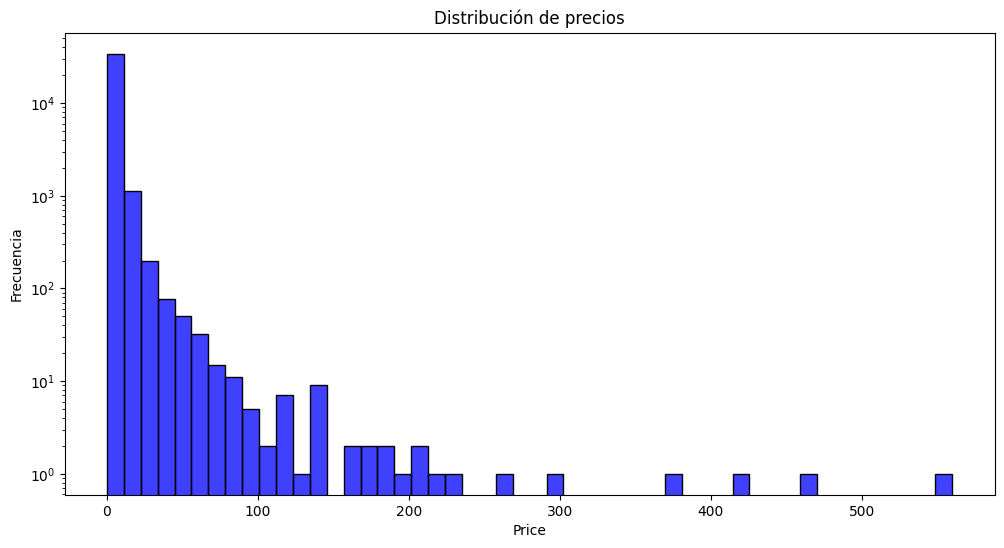

In [ ]:
# Clean and correct the values in 'price' (as you did previously)
concatenated_df['price'] = concatenated_df['price'].replace({'€': '', ',': '.'}, regex=True).str.strip()

# Correct values with more than one dot
concatenated_df['price'] = concatenated_df['price'].apply(lambda x: x.split('.')[0] if isinstance(x, str) and x.count('.') > 1 else x)

# Convert to float
concatenated_df['price'] = concatenated_df['price'].astype(float).round(2)

# Create the bar plot for the 'price' column, adjusting the number of bars and making the extremes visible
plt.figure(figsize=(12, 6))
sns.histplot(concatenated_df['price'], bins=50, kde=False, color='blue')  # Increase the number of bins to improve visibility
plt.title("Price Distribution")
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.yscale('log')
plt.show()

2) PRICE PER WEIGHT

The price per weight comes with "€ / unit" and in unit we may have kilogram,liter or unit. We will store only the number and in another column which type of product it was (kilogram, liter or unit).

In [ ]:
# Function to extract number before the "€" and convert it to numeric
def extract_number(value):
    if isinstance(value, str):
        # Remove the "€" symbol, replace commas with dots for decimal consistency
        value = value.replace('€', '').replace(',', '.').strip()

        # Split the string and extract the number before the space or unit
        number_part = value.split(' ')[0]

        # Convert the extracted number to float
        try:
            return float(number_part)
        except ValueError:
            return None  # Return None if the conversion fails
    return None  # Return None if the value is not a string

# Function to extract the unit after the price
def extract_unit(value):
    if isinstance(value, str):
        # Remove the "€" symbol, replace commas with dots for decimal consistency
        value = value.replace('€', '').replace(',', '.').strip()

        # Split the string and extract the unit after the number
        unit_part = ' '.join(value.split(' ')[2:]).strip()

        return unit_part.lower()  # Return unit in lowercase
    return None  # Return None if the value is not a string

# Apply the functions to 'price_per_weight' to extract and convert the number and unit
concatenated_df['numeric_price_weight'] = concatenated_df['price_per_weight'].apply(extract_number)
concatenated_df['unit_price_weight'] = concatenated_df['price_per_weight'].apply(extract_unit)

# Show the resulting DataFrame
print(concatenated_df[['price_per_weight', 'numeric_price_weight']])

      price_per_weight  numeric_price_weight
0         6.75 € / 1 L                  6.75
1         7.98 € / 1 L                  7.98
2         8.20 € / 1 L                  8.20
3        10.33 € / 1 L                 10.33
4         6.75 € / 1 L                  6.75
...                ...                   ...
36867    0.63 € / 1 Kg                  0.63
36868    10.20 € / 1 L                 10.20
36869     8.30 € / 1 L                  8.30
36870     6.89 € / 1 L                  6.89
36871     1.97 € / 1 L                  1.97

[36864 rows x 2 columns]


In [ ]:
# Replace values ending with 'kg' with 'kilogram', 'l' with 'liter', and those ending with 'unidad', 'unidades', or 'dosis' with 'unidad'
concatenated_df['unit_price_weight'] = concatenated_df['unit_price_weight'].replace(
    {r'.*kg$': 'kilogram', r'.*l$': 'liter', r'.*(unidad|unidades|dosis)$': 'unit'}, regex=True)

# Drop the rows that don't match the desired units (kilogram, liter, unidad)
concatenated_df = concatenated_df[concatenated_df['unit_price_weight'].isin(['kilogram', 'liter', 'unit'])].copy()

# Drop the original 'price_per_weight' column
concatenated_df.drop(columns=['price_per_weight'], inplace=True)

# Print the value counts of 'unit_price_weight'
print(concatenated_df["unit_price_weight"].value_counts())


unit_price_weight
kilogram    26820
liter        8403
unit          987
Name: count, dtype: int64


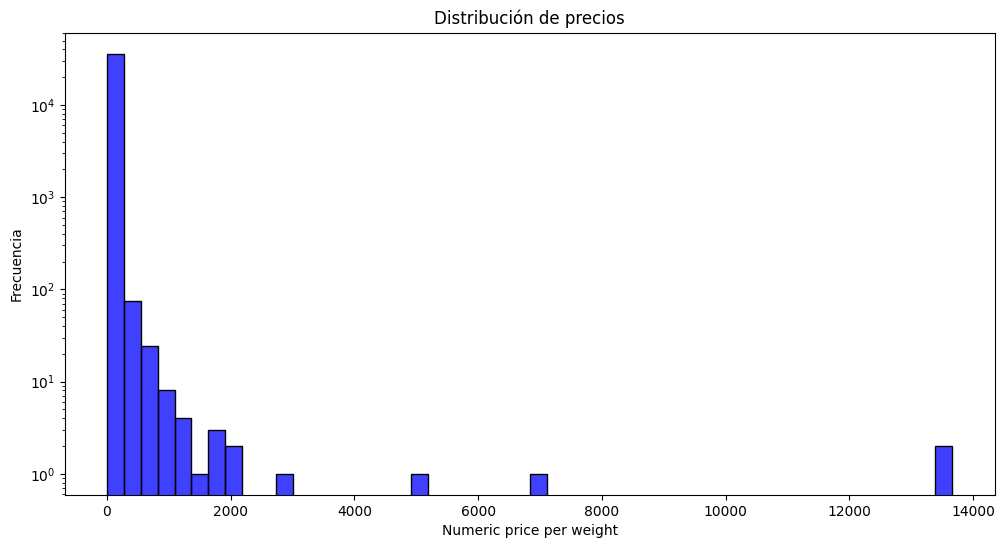

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(concatenated_df['numeric_price_weight'], bins=50, kde=False, color='blue')  # Aumentamos el número de bins para mejorar la visibilidad
plt.title("Distribución de precios")
plt.xlabel('Numeric price per weight')
plt.ylabel('Frecuencia')
plt.yscale('log')
plt.show()

What's left? weight column continues to be an string with the weight and unit.

In [ ]:
concatenated_df.loc[0]

name                                                Aceite de oliva 0,4º 
brand                                                           Hacendado
price                                                                6.75
Super                                                           Mercadona
weight                                                            1.000 l
nutri-score                                                             C
categories              Productos del mar, Conservas, Pescados, Conser...
countries                                                           Spain
labels                                                  Especie-protegida
numeric_price_weight                                                 6.75
unit_price_weight                                                   liter
Name: 0, dtype: object

In [ ]:
# Function to split the 'weight' column into two columns: 'numeric_weight' and 'unit_weight'
def split_weight(value):
    if isinstance(value, str):
        # Replace commas with dots to maintain decimal consistency
        value = value.replace(',', '.')

        # Split into numeric part and unit
        parts = value.split()

        # Ensure there is a numeric part and a unit
        if len(parts) >= 2:
            numeric_part = parts[0]  # Extract the number
            unit_part = parts[1]  # Extract the unit

            # Convert the number to float
            try:
                numeric_weight = float(numeric_part)
            except ValueError:
                numeric_weight = None

            return numeric_weight, unit_part.lower()  # Return as a tuple (number, unit)
    return None, None  # In case the value is not a valid string

# Apply the function to split 'weight' into the new columns
concatenated_df[['numeric_weight', 'unit_weight']] = concatenated_df['weight'].apply(lambda x: pd.Series(split_weight(x)))
concatenated_df.dropna(subset=['numeric_weight'], inplace=True)
concatenated_df.drop(columns=['weight'], inplace=True)

# Display the DataFrame with the new columns
print(concatenated_df[['weight', 'numeric_weight', 'unit_weight']].head())

    weight  numeric_weight unit_weight
0  1.000 l            1.00           l
1  3.000 l            3.00           l
2  1.000 l            1.00           l
3  0.750 l            0.75           l
4  1.000 l            1.00           l


In [ ]:
concatenated_df

name           brand  price  \
0                                Aceite de oliva 0,4º        Hacendado   6.75   
1                        Aceite de oliva virgen extra        Hacendado  23.95   
2                        Aceite de oliva virgen extra        Hacendado   8.20   
3         Aceite de oliva virgen extra  Gran Selección       Hacendado   7.75   
4                                  Aceite de oliva 1º        Hacendado   6.75   
...                                                ...             ...    ...   
36867                           harina de trigo eroski           BASIC   0.63   
36868  aceite de oliva v. extra carbonell g. selección  Familia Online   7.65   
36869        aceite de oliva v. extra diosas arbequina           ABRIL   8.30   
36870                               aceite de oliva 1º          YBARRA   6.89   
36871                                aceite de girasol        KOIPESOL   5.90   

                             Super nutri-score  \
0                        Mercadona           C   
1                        Mercadona           A   
2                        Mercadona           A   
3                        Mercadona           C   
4                        Mercadona           C   
...                            ...         ...   
36867  Familia Online Supermercado         NaN   
36868  Familia Online Supermercado         NaN   
36869  Familia Online Supermercado         NaN   
36870  Familia Online Supermercado         NaN   
36871  Familia Online Supermercado         NaN   

                                              categories       countries  \
0      Productos del mar, Conservas, Pescados, Conser...           Spain   
1      Alimentos y bebidas de origen vegetal, Aliment...          España   
2      Alimentos y bebidas de origen vegetal, Aliment...          España   
3      Alimentos y bebidas de origen vegetal,Alimento...  Francia,España   
4      Productos del mar, Conservas, Pescados, Conser...           Spain   
...                                                  ...             ...   
36867                                                NaN             NaN   
36868                                                NaN             NaN   
36869                                                NaN             NaN   
36870                                                NaN             NaN   
36871                                                NaN             NaN   

                  labels  numeric_price_weight unit_price_weight  \
0      Especie-protegida                  6.75             liter   
1             Sin gluten                  7.98             liter   
2             Sin gluten                  8.20             liter   
3            Punto Verde                 10.33             liter   
4      Especie-protegida                  6.75             liter   
...                  ...                   ...               ...   
36867                NaN                  0.63          kilogram   
36868                NaN                 10.20             liter   
36869                NaN                  8.30             liter   
36870                NaN                  6.89             liter   
36871                NaN                  1.97             liter   

       numeric_weight unit_weight  
0                1.00           l  
1                3.00           l  
2                1.00           l  
3                0.75           l  
4                1.00           l  
...               ...         ...  
36867            1.00          kg  
36868            0.75           l  
36869            1.00           l  
36870            1.00           l  
36871            3.00           l  

[36124 rows x 12 columns]

There are some "unidades" left so we have to process it as units, as well as unidad. Also kg and l should be passed to its corresponding unit name.

In [ ]:
concatenated_df["unit_weight"].value_counts()

unit_weight
kg          26577
l            8714
unidad        512
unidades      321
Name: count, dtype: int64

In [ ]:
# Replace 'kg' with 'kilograms', 'l' with 'liters', and 'unidad' or 'unidades' with 'units' using regular expressions
concatenated_df['unit_weight'] = concatenated_df['unit_weight'].replace(
    {r'kg$': 'kilogram', r'l$': 'liter', r'(unidad|unidades)$': 'unit'},
    regex=True
)

# Remove rows where 'unit_weight' is not 'kilograms', 'liters', or 'units'
concatenated_df = concatenated_df[concatenated_df['unit_weight'].isin(['kilogram', 'liter', 'unit'])]
concatenated_df = concatenated_df[concatenated_df['unit_price_weight'] == concatenated_df['unit_weight']]

# Display the count of unique values in 'unit_weight'
print(concatenated_df['unit_weight'].value_counts())

unit_weight
kilogram    26189
liter        8076
unit          831
Name: count, dtype: int64


In [ ]:
concatenated_df["unit_weight"].value_counts()

unit_weight
kilogram    26189
liter        8076
unit          831
Name: count, dtype: int64

In [ ]:
concatenated_df

name           brand  price  \
0                                Aceite de oliva 0,4º        Hacendado   6.75   
1                        Aceite de oliva virgen extra        Hacendado  23.95   
2                        Aceite de oliva virgen extra        Hacendado   8.20   
3         Aceite de oliva virgen extra  Gran Selección       Hacendado   7.75   
4                                  Aceite de oliva 1º        Hacendado   6.75   
...                                                ...             ...    ...   
36867                           harina de trigo eroski           BASIC   0.63   
36868  aceite de oliva v. extra carbonell g. selección  Familia Online   7.65   
36869        aceite de oliva v. extra diosas arbequina           ABRIL   8.30   
36870                               aceite de oliva 1º          YBARRA   6.89   
36871                                aceite de girasol        KOIPESOL   5.90   

                             Super nutri-score  \
0                        Mercadona           C   
1                        Mercadona           A   
2                        Mercadona           A   
3                        Mercadona           C   
4                        Mercadona           C   
...                            ...         ...   
36867  Familia Online Supermercado         NaN   
36868  Familia Online Supermercado         NaN   
36869  Familia Online Supermercado         NaN   
36870  Familia Online Supermercado         NaN   
36871  Familia Online Supermercado         NaN   

                                              categories       countries  \
0      Productos del mar, Conservas, Pescados, Conser...           Spain   
1      Alimentos y bebidas de origen vegetal, Aliment...          España   
2      Alimentos y bebidas de origen vegetal, Aliment...          España   
3      Alimentos y bebidas de origen vegetal,Alimento...  Francia,España   
4      Productos del mar, Conservas, Pescados, Conser...           Spain   
...                                                  ...             ...   
36867                                                NaN             NaN   
36868                                                NaN             NaN   
36869                                                NaN             NaN   
36870                                                NaN             NaN   
36871                                                NaN             NaN   

                  labels  numeric_price_weight unit_price_weight  \
0      Especie-protegida                  6.75             liter   
1             Sin gluten                  7.98             liter   
2             Sin gluten                  8.20             liter   
3            Punto Verde                 10.33             liter   
4      Especie-protegida                  6.75             liter   
...                  ...                   ...               ...   
36867                NaN                  0.63          kilogram   
36868                NaN                 10.20             liter   
36869                NaN                  8.30             liter   
36870                NaN                  6.89             liter   
36871                NaN                  1.97             liter   

       numeric_weight unit_weight  
0                1.00       liter  
1                3.00       liter  
2                1.00       liter  
3                0.75       liter  
4                1.00       liter  
...               ...         ...  
36867            1.00    kilogram  
36868            0.75       liter  
36869            1.00       liter  
36870            1.00       liter  
36871            3.00       liter  

[35096 rows x 12 columns]

In [ ]:
concatenated_df.drop(columns=['unit_price_weight'], inplace=True)

concatenated_df.rename(columns={
    'numeric_price_weight': 'price_weight',
    'numeric_weight': 'weight',
    'unit_weight': 'unit'
}, inplace=True)

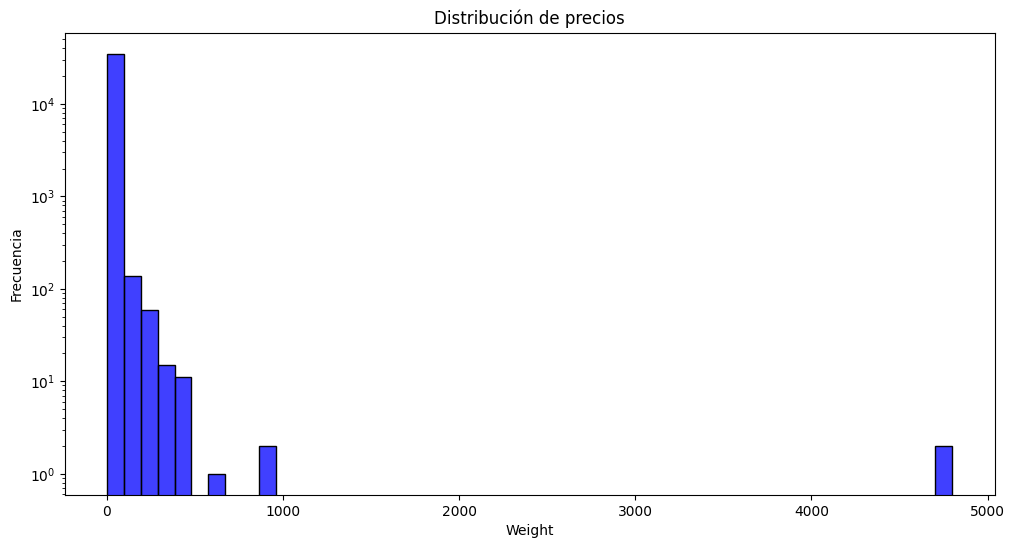

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(concatenated_df['weight'], bins=50, kde=False, color='blue')  # Aumentamos el número de bins para mejorar la visibilidad
plt.title("Distribución de precios")
plt.xlabel('Weight')
plt.ylabel('Frecuencia')
plt.yscale('log')
plt.show()

In [ ]:
concatenated_df

name           brand  price  \
0                                Aceite de oliva 0,4º        Hacendado   6.75   
1                        Aceite de oliva virgen extra        Hacendado  23.95   
2                        Aceite de oliva virgen extra        Hacendado   8.20   
3         Aceite de oliva virgen extra  Gran Selección       Hacendado   7.75   
4                                  Aceite de oliva 1º        Hacendado   6.75   
...                                                ...             ...    ...   
36867                           harina de trigo eroski           BASIC   0.63   
36868  aceite de oliva v. extra carbonell g. selección  Familia Online   7.65   
36869        aceite de oliva v. extra diosas arbequina           ABRIL   8.30   
36870                               aceite de oliva 1º          YBARRA   6.89   
36871                                aceite de girasol        KOIPESOL   5.90   

                             Super nutri-score  \
0                        Mercadona           C   
1                        Mercadona           A   
2                        Mercadona           A   
3                        Mercadona           C   
4                        Mercadona           C   
...                            ...         ...   
36867  Familia Online Supermercado         NaN   
36868  Familia Online Supermercado         NaN   
36869  Familia Online Supermercado         NaN   
36870  Familia Online Supermercado         NaN   
36871  Familia Online Supermercado         NaN   

                                              categories       countries  \
0      Productos del mar, Conservas, Pescados, Conser...           Spain   
1      Alimentos y bebidas de origen vegetal, Aliment...          España   
2      Alimentos y bebidas de origen vegetal, Aliment...          España   
3      Alimentos y bebidas de origen vegetal,Alimento...  Francia,España   
4      Productos del mar, Conservas, Pescados, Conser...           Spain   
...                                                  ...             ...   
36867                                                NaN             NaN   
36868                                                NaN             NaN   
36869                                                NaN             NaN   
36870                                                NaN             NaN   
36871                                                NaN             NaN   

                  labels  price_weight  weight      unit  
0      Especie-protegida          6.75    1.00     liter  
1             Sin gluten          7.98    3.00     liter  
2             Sin gluten          8.20    1.00     liter  
3            Punto Verde         10.33    0.75     liter  
4      Especie-protegida          6.75    1.00     liter  
...                  ...           ...     ...       ...  
36867                NaN          0.63    1.00  kilogram  
36868                NaN         10.20    0.75     liter  
36869                NaN          8.30    1.00     liter  
36870                NaN          6.89    1.00     liter  
36871                NaN          1.97    3.00     liter  

[35096 rows x 11 columns]

# Translating categories

Finally, we have to deal with the categories. There are some very similar ones, and also identical ones but in different languages. We have to take care of all of this.
First, we have to convert a product's categories from a single string into a list of values

In [3]:
concatenated_df = pd.read_csv("all_scrappings_cleaned.csv", sep =";")

In [4]:
def process_categories(cell):
    if isinstance(cell, str):  # Ensure the cell is a string
        elements = cell.split(',')  # Split by commas
        processed = [
            part.split(':', 1)[1].strip() if ':' in part else part.strip()  # Retain part after ':' or keep as is
            for part in elements
        ]
        return processed  # Return the list of processed elements
    return []  # Return an empty list if the cell is not a string

# Apply the function to the 'Categorías' column
d = concatenated_df['categories'].apply(process_categories)

Now we create a list containing all the categories in the text.

In [5]:
all_cats = []
for i in d:
    if i:
        for j in i:
            all_cats.append(j.lower())

There are some rows with special formatting, as we can see below.

In [6]:
print(len(all_cats), len(set(all_cats)))
print(list(str(all_cats[all_cats.index('carnes  aves  pollo  aves cocidas  pollo preparado')])))
for i in range(len(all_cats)):
    if '  ' in all_cats[i]:
        var = all_cats[i].split('  ')
        all_cats[i] = var[0]
        for j in var[1:]:
            all_cats.append(j)

110276 5441
['c', 'a', 'r', 'n', 'e', 's', ' ', ' ', 'a', 'v', 'e', 's', ' ', ' ', 'p', 'o', 'l', 'l', 'o', ' ', ' ', 'a', 'v', 'e', 's', ' ', 'c', 'o', 'c', 'i', 'd', 'a', 's', ' ', ' ', 'p', 'o', 'l', 'l', 'o', ' ', 'p', 'r', 'e', 'p', 'a', 'r', 'a', 'd', 'o']


Next, we are going to create a dictionary. It has a key for each category. The values of each category key are the categories which the key 'envelopes' (ie, 'Bebidas' is the superset of categories like, 'Bebidas frías', 'Bebidas isotónicas', etc)

In [7]:
all_cats = set(all_cats) # Obtain the set to avoid repetitions
asignacion_aux = {}
for i in all_cats:
    asignacion_aux[i] = []
    for j in all_cats:
        if i in j and j not in asignacion_aux[i]:
            asignacion_aux[i].append(j)
asignacion_aux

{'ensaladillas': ['ensaladillas', 'ensaladillas congeladas'],
 'cheeses from england': ['cheeses from england'],
 'boissons au thé': ['boissons au thé'],
 'fermented vegetables': ['fermented vegetables'],
 'dried-meals': ['dried-meals'],
 'productos del mar': ['productos del mar'],
 'sardines': ['sardines',
  'sardines in oil',
  'sardines en conserve',
  'sardines à la sauce tomate',
  'sardines in tomato sauce',
  'canned sardines',
  "sardines à l'huile",
  'sardines in olive oil',
  'sardines in sunflower oil',
  "sardines à l'huile d'olive",
  'sardines in oil and chili'],
 'parmigiano-reggiano': ['parmigiano-reggiano'],
 'culinary plants': ['culinary plants'],
 'salted peanuts': ['salted peanuts'],
 'productos agrícolas': ['productos agrícolas'],
 'chocolate covered honeycomb': ['chocolate covered honeycomb'],
 'jelly desserts': ['jelly desserts'],
 'judiones cocidos en conserva': ['judiones cocidos en conserva'],
 'germinados en conserva': ['germinados en conserva'],
 'bouillon 

We save the original categories list to a txt, where we can inspect the list, duplicate the document and, using online resources, translate the categories to Spanish.

-------

We must be very careful not to run this code, as each time it is run, the order of strings will change, and the one-to-one relationship between the original text and its translation will be lost. Do not modify (as this code can do) 'sinTraduccion.txt'

In [ ]:
# with open('sinTraduccion.txt', "w") as file:
#     for line in all_cats:
#         file.write(line + "\n")

After translating, we read the new version of the categories list

In [10]:
trans = []

# Open the file in read mode
with open('Traducido.txt', 'r') as file:
    # Read each line in the file and add it to the list
    trans = file.readlines()

Both lists should have the same length, and each row from the first second is the corresponding word from the first list, but in Spanish

In [ ]:
print(len(all_cats), len(trans))
# Process the string to remove txt characters
for i in range(len(trans)):
    trans[i] = trans[i].replace('  ', '').replace('\n', '').strip().lower()
    all_cats[i] = all_cats[i].replace('  ', '').replace('\n', '').strip().lower()

Now we can visualize both lists and check that, indeed, one is the translation of the other

In [ ]:
print(trans[:30])

In [ ]:
print(all_cats[:30])

We can also see that, because of the translation, there are now categories repeated in the list

In [ ]:
print(len(set(trans)))
new_cats = []
new_cats = [i for i in trans if i not in new_cats]

Now we are going to get rid of useless categories. We only want the most fundamental ones (see 'Bebidas' example above). We will create a dictionary where each key contains all the categories which contain its name, except itself ('Bebidas' not in grupos['Bebidas']). Then, we will find all keys with child categories, and eliminate the keys corresponding to those categories. That way, we will be left with categories that have no parent category, and a list of their children categories

In [ ]:
grupos = {}
for i in new_cats:
    grupos[i] = []
    for j in new_cats:
        if i in j and j not in grupos[i] and i != j:
            grupos[i].append(j)
rem = []
for i in grupos.values():
    if i != []:
        for j in i:
            if j not in rem:
                rem.append(j)
print(len(grupos) - len(set(rem)), " remaining categories")
for i in rem:
    if i in grupos.keys():
        del grupos[i]
len(grupos.keys())

We can see here the end result

In [ ]:
grupos

Now, we will create a copy of the list of translated categories (the document we imported above, which is as long as and has the one-to-one relationship with the txt we created). We will subtitute each category with its parent category, if it isn't one already

In [ ]:
final = trans.copy()
for i in range(len(final)):
    if final[i] not in grupos:
        for j in grupos:
            for k in grupos[j]:
                if k == final[i]:
                    final[i] = j

Here we can see that we preserve the total number of translations, which in reality are 16% of the original number of categories (5397 translated categories, only 866 final categories).

In [ ]:
print(len(final), len(set(final)))

Now we will assign to the dataset each categories translated, parent category, creating a Series to contain the translations, and then subtituting it for the original column in the dataset. We do this by creating a dictionary, where the keys are the untranslated categories, and the values are the final ones we will use.

In [ ]:
e = pd.Series([None] * d.shape[0])
asign = {}
for i in range(len(all_cats)):
    asign[all_cats[i]] = final[i]

for i in range(e.shape[0]):
    if d.iloc[i]:
        for j in d.iloc[i]: # For each possible element in the cell
            if j.lower() in asign.keys():
                if e.iloc[i]:
                    e.iloc[i].append(asign[j.lower()])
                else:
                    e.iloc[i] = [asign[j.lower()]]
for i in range(e.shape[0]):
    if e.iloc[i]:
        e.iloc[i] = list(set(e.iloc[i])) # a product can belong to several categories that have the same parent category.


In [ ]:
concatenated_df['categories'] = e

In [ ]:
# concatenated_df.to_csv("all_scrappings_cleaned.csv", index=False, sep=";")

# Recommender System

The next implementation shows a recommender system, more exactly a **content-based recoomendation system** that suggests a product to the user based on the similarity to a specified product.

The system uses **Natural Language Processing** as the technique to analyze the name of the product, the brand, the categories, and the labels.

The descriptions are preprocessed by the use of a pipeline which removes irrelevant elements. Then it is vectorized using **TF-IDF**, the vectorization is saved in a sparse matrix. Afterwards, **cosine similarity** measures the degree of similarity between all products in the dataset and the input product. Finally, the recommendations are listed to the user.

In [ ]:
# First we import all the necessary libraries
from collections import Counter
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import re
import nltk
from nltk.tokenize import wordpunct_tokenize
from bs4 import BeautifulSoup
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

def check_nltk_packages():
  packages = ['punkt','stopwords','omw-1.4','wordnet']

  for package in packages:
    try:
      nltk.data.find('tokenizers/' + package)
    except LookupError:
      nltk.download(package)
check_nltk_packages()

try:
  import lxml
except ModuleNotFoundError:
  %pip install lxml

try:
  import contractions
except ModuleNotFoundError:
  %pip install contractions
  import contractions

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 8.5 MB/s eta 0:00:00


In [ ]:
#Now we load the dataset we will be working with, and remove irrelevant columns

supermarkets = pd.read_csv("supers_con_cluster.csv", sep=';')
# supermarkets = supermarkets.drop(columns=['Unnamed: 0'])

In [ ]:
# To start with the nlp process we will choose the columns and data we find the most useful, in this case the following data has been choosen:
#     Name: name of the product
#     Brand: brand of the product
#     Categories: category in which this product is contained
#     Labels: whether this product is lactose free, or has any specific ingredient...

data = supermarkets.copy()
df = pd.DataFrame(data)

def combine_columns(row, columns):
  """
  Combines the choosen columns by not taking into account the Nan Values

    Args:
    row (str): Row of the dataframe
    columns (list): List of columns to combine

    Returns:
    str: All columns merged into one.
  """
  return " ".join(str(row[col]) for col in columns if pd.notna(row[col]))


columns_to_combine = ['name', 'brand', 'categories', 'labels', 'nutri-score']
df['product_description'] = df.apply(lambda row: combine_columns(row, columns_to_combine), axis=1)

In [ ]:
# Now we will start with the cleaning of the text, to do so we will use the function clean_text
# But first we need to specify the list of stopwords in the desired language, in this case: Spanish

stopwords_es = set(stopwords.words('spanish'))
wnl = WordNetLemmatizer()

def clean_text(text):
    """
    Clean and preprocess text data.

    Args:
    text (str): Input text to be cleaned.

    Returns:
    str: Cleaned text.
    """

    # Make use of BeautifulSoup
    text = BeautifulSoup(text, 'lxml').get_text()

    # Use regular expression to remove all irrelevant expressions
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'º', '', text)

    # Expand contractions
    text = contractions.fix(text)

    # Remove numbers
    text = re.sub(r'\d+', '', text)

    # Tokenization
    tokens = wordpunct_tokenize(text)

    # Homogenization and Lemmatization
    clean_tokens = [wnl.lemmatize(token.lower(), pos='v') for token in tokens if token.isalnum()]
    clean_tokens = [wnl.lemmatize(token) for token in clean_tokens]

    # Remove stopwords
    clean_tokens = [token for token in clean_tokens if token not in stopwords_es]

    # Join tokens back into a string
    clean_text = ' '.join(clean_tokens)

    return clean_text

In [ ]:
def highlight_keywords(text):
    """
    Highlights some keywords to augmentate their importance in the vectorization step.

    Args:
        text (str): original text.

    Returns:
        str: text with duplicated words.
    """
    keywords = ['sin gluten', 'sin lactosa', 'gluten', 'lactosa', 'vegano', 'vegana','vegetariano', 'vegetariana']
    for keyword in keywords:
        if keyword in text:
            text += f" {keyword} {keyword}"
    return text

In [ ]:
# And we apply the method in a new column

df['cleaned_description'] = df['product_description'].apply(clean_text)
df['cleaned_description'] = df['cleaned_description'].apply(highlight_keywords)

<ipython-input-4-aec163356b4a>:19: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, 'lxml').get_text()


Now that all words are cleaned up we will be starting with the next step: vectorization of words by the TFI-DF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# We specify that the words are in spanish and apply the vectorizer in the cleaned description

spanish_stop_words = stopwords.words('spanish')
tfidf_vectorizer = TfidfVectorizer(stop_words=spanish_stop_words)

tfidf_matrix = tfidf_vectorizer.fit_transform(df['cleaned_description'])

Now with the cosine similarity we will be calculating the similarity between all products in the dataset.

**Cosine similarity** measures the similarity between two vectors of an inner product space. It is measured by the cosine of the angle between two vectors and determines whether two vectors are pointing in roughly the same direction. [1]

\begin{equation}
\text{cosine similarity}(A, B) = \frac{A \cdot B}{\|A\| \|B\|}
\end{equation}


In [ ]:
# We compute the smilarity and turn it into a DataFrame to use it afterwards

# cosine_similarities = cosine_similarity(tfidf_matrix)
# cosine_sim_df = pd.DataFrame(cosine_similarities, index=df['cleaned_description'], columns=df['cleaned_description'])

Finally we put together everything and create the actual recommender

In [ ]:
def clean_input_text(input_text):
    """
    Cleans the input text by applying the clean_text function.

    Args:
        input_text (str): The input text to be cleaned.

    Returns:
        str: The cleaned input text.
    """

    input_text_cleaned = clean_text(input_text)
    return input_text_cleaned


def vectorize_input_text(input_text_cleaned, tfidf_vectorizer):
    """
    Vectorizes the input text using the provided TF-IDF vectorizer.

    Args:
        input_text_cleaned (str): The cleaned input text.
        tfidf_vectorizer (TfidfVectorizer): The TF-IDF vectorizer.

    Returns:
        numpy.ndarray: The vectorized input text.
    """
    input_vector = tfidf_vectorizer.transform([input_text_cleaned])
    return input_vector

def recommend_products(product_name, top_n=5):
    """
    Recommends products similar to the given product name.

    Args:
        product_name (str): The input product name.
        cosine_sim_df (pd.DataFrame): The DataFrame containing cosine similarities.
        top_n (int): The number of top recommendations to return.

    Returns:
        pd.DataFrame: DataFrame with recommendations including name, brand, and price.
    """

    input_text_cleaned = clean_input_text(product_name)
    input_vector = vectorize_input_text(input_text_cleaned, tfidf_vectorizer)

    input_cosine_sim = cosine_similarity(input_vector, tfidf_matrix)
    input_sim_df = pd.DataFrame(input_cosine_sim.T, index=df.index, columns=['similarity'])

    similar_products = input_sim_df.sort_values(by='similarity', ascending=False)
    similar_products = similar_products.iloc[1:]

    recommended_products = df.loc[similar_products.index, ['name', 'brand','price','Super']]
    recommended_products['similarity'] = similar_products['similarity'].values

    if len(recommended_products) < top_n:
        remaining_products = similar_products.loc[~similar_products.index.isin(recommended_products.index)]
        additional_products = df.loc[remaining_products.index,['name', 'brand','price','Super' ]]
        additional_products['similarity'] = remaining_products['similarity'].values

        # Concat and keep only the top results
        recommended_products = pd.concat([recommended_products, additional_products]).head(top_n)

    return recommended_products.head(top_n)


In [ ]:
product_name = "pan sin gluten"
recommended_products = recommend_products(product_name, top_n=9)

print(f"Productos recomendados para '{product_name}':\n")
print(recommended_products)

Productos recomendados para 'pan sin gluten':

                                name    brand  price  \
15322         pan rallado sin gluten    gallo   2.45   
20440         pan rallado sin gluten    gallo   2.35   
22415         pan rallado sin gluten    gallo   2.35   
31499         pan rallado sin gluten   EROSKI   1.25   
23142  pan de hamburguesa sin gluten  MONBAKE   0.90   
20392    pan hamburguesa sin gluten,  sinblat   1.85   
31419        pan de molde sin gluten   EROSKI   2.99   
29591        pan de molde sin gluten    BIMBO   3.39   
34219        pan de molde sin gluten    BIMBO   3.29   

                             Super  similarity  
15322               sanchez romero    0.685233  
20440                       consum    0.685233  
22415                       consum    0.666795  
31499  Familia Online Supermercado    0.653786  
23142                       Eroski    0.652328  
20392                       consum    0.652328  
31419  Familia Online Supermercado    0.650759  


# Clustering

In [ ]:
supers = pd.read_csv('labels_y_dia_limpio5.csv')

In [ ]:
# !pip install prince

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import silhouette_score
from prince import FAMD

A clustering of products is done taking into accont these variables: price, price_weight and nutri-score. The weight will not be considered as it will be highly correlated with price and weight.

How many clusters are appropiate? The elbow method will be done. But before that, an appropaite encondign must be done to nutri-score, as it is a categorical variable.

In [ ]:
# Replace NaN values with 'UNKNOWN'
supers['nutri-score'] = supers['nutri-score'].fillna('UNKNOWN')

# Select the relevant columns for clustering
X = supers[['price', 'price_weight', 'nutri-score']]

Factorial Analysis of Mixed Data (FAMD) is a dimensionality reduction technique designed for datasets that include both numerical and categorical variables. Unlike Principal Component Analysis (PCA), which primarily handles numerical data and is sensitive to the scale and distances between data points, FAMD integrates the characteristics of both numerical and categorical data, treating them appropriately within a unified framework. **This makes FAMD particularly suited for mixed datasets where categorical variables play a significant role in the analysis.**

In this case, **outliers were identified and removed using the 10th and 90th percentiles**. Removing outliers is essential as extreme values can distort the representation of the data, especially in numerical variables, leading to misleading clustering and analysis results.

Before applying FAMD, the **numerical variables were standardized to ensure all features contribute equally to the analysis, regardless of their original scale.** For categorical variables, FAMD encodes them internally using a method similar to one-hot encoding but optimized for mixed data, ensuring the categorical relationships are preserved without introducing unnecessary noise.

Then kmeans was applied.

In [ ]:
# Select the features for clustering
X = supers[['price', 'price_weight', 'nutri-score']]

# Calculate IQR for 'price' and 'price_weight'
Q1 = X[['price', 'price_weight']].quantile(0.1)
Q3 = X[['price', 'price_weight']].quantile(0.9)
IQR = Q3 - Q1

# Identify outliers based on the IQR rule and erase them
outliers_condition = ((X[['price', 'price_weight']] < (Q1 - 1.5 * IQR)) |
                      (X[['price', 'price_weight']] > (Q3 + 1.5 * IQR))).any(axis=1)

# Assign cluster -1 to outliers
supers['cluster'] = -1  # Initialize with -1
supers.loc[~outliers_condition, 'cluster'] = np.nan  # Non-outliers remain unclustered for now

# Filter out the outliers for FAMD and clustering
X_clean = X[~outliers_condition]

# Standardize the numerical columns
scaler = StandardScaler()
X_clean[['price', 'price_weight']] = scaler.fit_transform(X_clean[['price', 'price_weight']])

# Ensure 'nutri-score' is treated as categorical
X_clean['nutri-score'] = X_clean['nutri-score'].astype(str)

<ipython-input-35-6480a13e37e6>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_clean[['price', 'price_weight']] = scaler.fit_transform(X_clean[['price', 'price_weight']])
<ipython-input-35-6480a13e37e6>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_clean['nutri-score'] = X_clean['nutri-score'].astype(str)


Elbow method can be done to select the optimal number of clusters

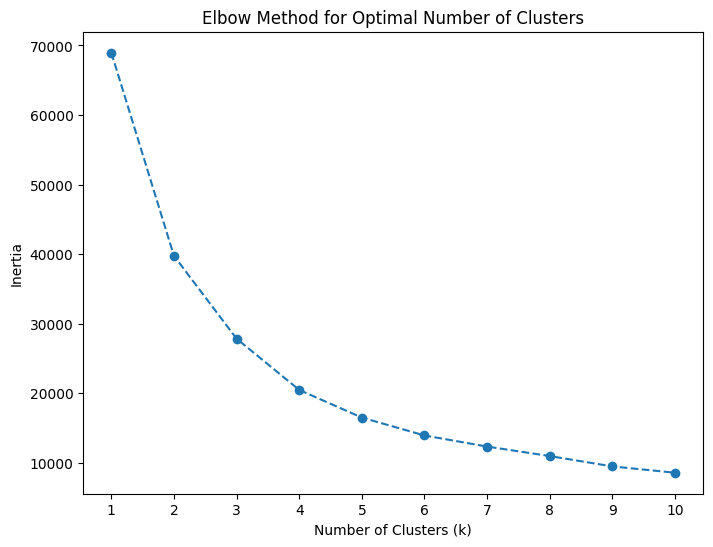

In [ ]:
# Apply FAMD to be able to work with mixed data (categorical and numerical)
famd = FAMD(n_components=2, random_state=42)
X_famd = famd.fit_transform(X_clean)

# Elbow method to find the optimal number of clusters
inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_famd)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.show()

Clustering will be done using 4 clusters. As outliers are products and we do not want to erase them, the cluster -1 will be applied to them.

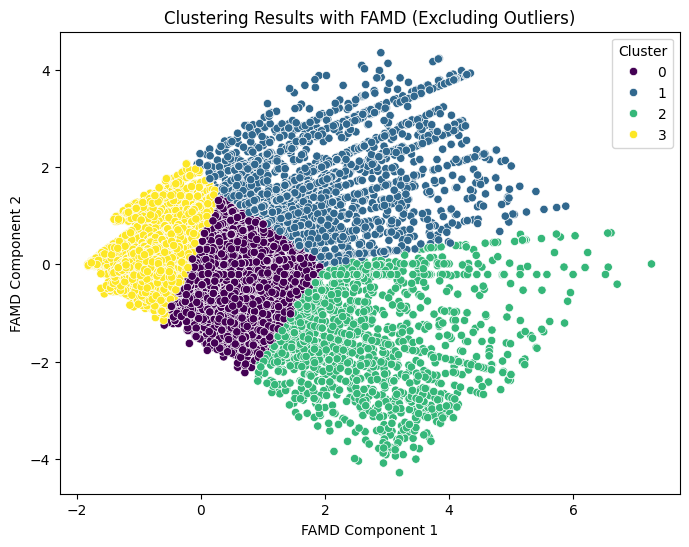

cluster
 3.0    17995
 0.0    11077
 1.0     2623
 2.0     1840
-1.0     1539
Name: count, dtype: int64


In [ ]:
# Based on the elbow method, optimal k
optimal_k = 4

# Apply K-Means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X_famd)

# Assign clusters to the clean data subset
supers.loc[~outliers_condition, 'cluster'] = clusters

# Visualize the clustering results
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_famd[0], y=X_famd[1], hue=clusters, palette='viridis')
plt.title('Clustering Results with FAMD (Excluding Outliers)')
plt.xlabel('FAMD Component 1')
plt.ylabel('FAMD Component 2')
plt.legend(title='Cluster')
plt.show()

# Print the count of observations per cluster
print(supers['cluster'].value_counts())

Before finishing with clustering, an analysis of the dsitribution of each cluster can be done to study what each group represents:

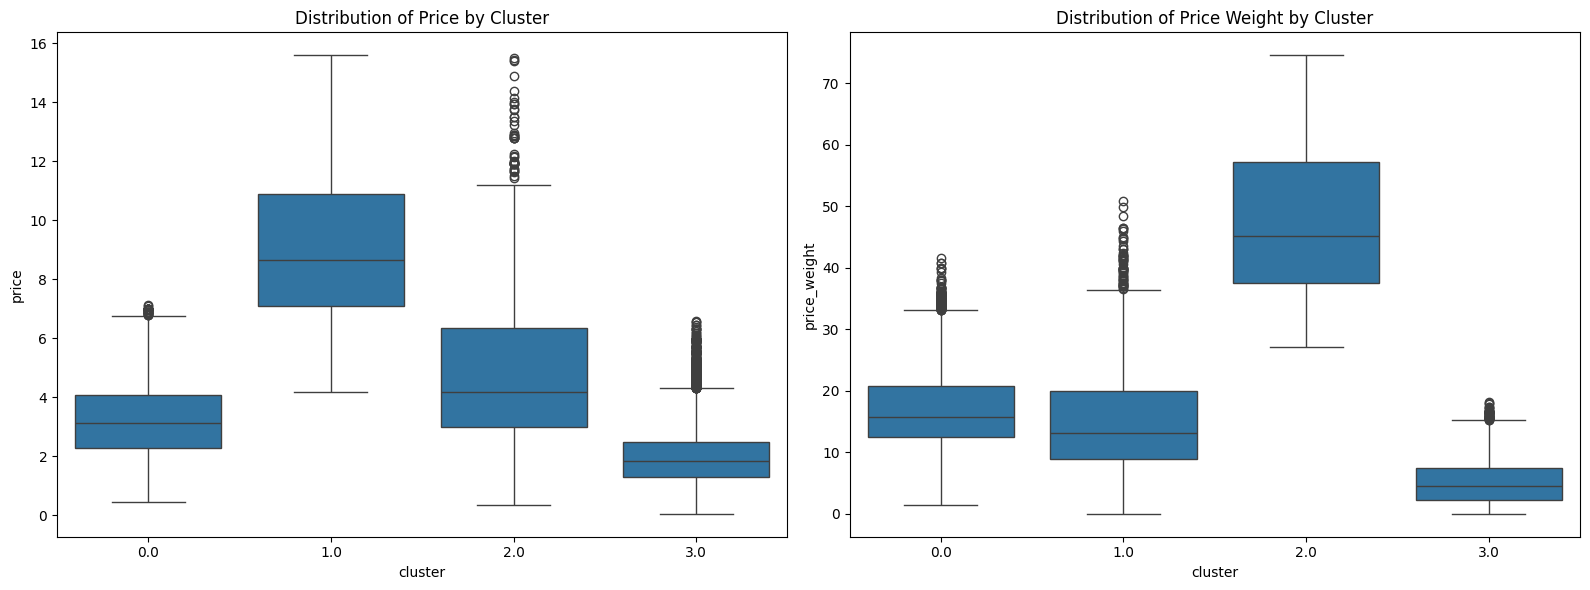

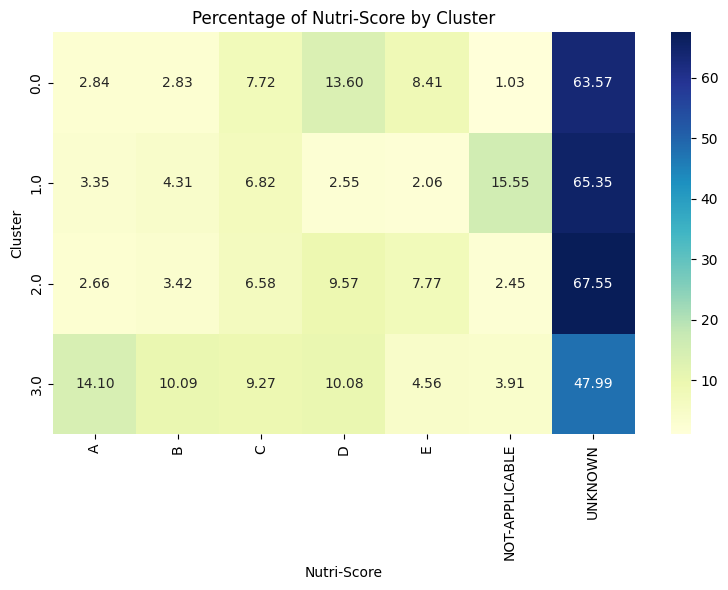

In [ ]:
# Ensure to use .loc to avoid the SettingWithCopyWarning
supers.loc[:, 'price'] = supers['price']
supers.loc[:, 'price_weight'] = supers['price_weight']
supers.loc[:, 'nutri-score'] = supers['nutri-score']

# Remove rows where 'cluster' is -1 just for the plots
supers_plot = supers[supers['cluster'] != -1]

# Calculate the percentage of observations for each Nutri-Score class by cluster
nutriscore_percentage = supers_plot.groupby(['cluster', 'nutri-score']).size().unstack(fill_value=0)
nutriscore_percentage = nutriscore_percentage.div(nutriscore_percentage.sum(axis=1), axis=0) * 100

# Boxplot for 'price' by 'cluster'
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='cluster', y='price', data=supers_plot)
plt.title('Distribution of Price by Cluster')

# Boxplot for 'price_weight' by 'cluster'
plt.subplot(1, 2, 2)
sns.boxplot(x='cluster', y='price_weight', data=supers_plot)
plt.title('Distribution of Price Weight by Cluster')

plt.tight_layout()
plt.show()

# Plot the percentage of Nutri-Score observations by cluster as a heatmap
plt.figure(figsize=(8, 6))

# Create the heatmap
sns.heatmap(nutriscore_percentage, annot=True, fmt='.2f', cmap='YlGnBu', cbar=True)

# Title and labels
plt.title('Percentage of Nutri-Score by Cluster')
plt.xlabel('Nutri-Score')
plt.ylabel('Cluster')

plt.tight_layout()
plt.show()

**NUMERICAL VARIABLES**

Cluster 0:
* Price: Relatively low, with a few outliers at the higher end.
* Price Weight: The distribution is also lower, with few higher values in the outliers. Most of the values fall between 10 and 30.

Cluster 1:
* Price: This cluster shows a higher distribution, with the median above 6, and several higher values in the outliers.
* Price Weight: Higher than Cluster 0, with outliers up to 70. Most values fall between 30 and 60.

Cluster 2:
* Price: The price in this cluster is relatively higher, with a significant difference compared to Cluster 0.
* Price Weight: The distribution here is similar to Cluster 1, with values concentrated between 10 and 30 but with more spread-out higher values in the outliers.

Cluster 3:
* Price: This cluster has a lower median and some extreme outliers at the higher end.
* Price Weight: The distribution is similar to Cluster 0, indicating that products in this cluster are lighter in weight with values mainly under 30.

**NUTRI-SCORE**

* Cluster 0:
High proportion of products with Nutri-Score E, indicating poor nutritional quality.
* Cluster 1: Similar to Cluster 0, with a dominant portion in Nutri-Score E. However, the proportion of Nutri-Score A and C is slightly higher compared to Cluster 0, meaning a mix of worse and slightly better nutritional quality.
* Cluster 2: This cluster has a relatively balanced distribution, with a higher percentage of products with Nutri-Score A and B. This suggests that Cluster 2 products are more nutritionally favorable compared to others.
* Cluster 3: This cluster also shows a significant number of Nutri-Score E items, with a good portion being in the Nutri-Score D category. Nutri-Score A and B are quite rare here, indicating these products are mostly nutritionally poorer.

**SUMMARY**

Cluster 0:
- Price and Price Weight:
Products in Cluster 0 tend to have lower prices and lighter weights, with most values falling in the lower range.
- Nutri-Score: The majority of products have a Nutri-Score E, indicating poorer nutritional quality. A small proportion has Nutri-Score A and C, suggesting a few healthier options within this cluster.

Cluster 1:
- Price and Price Weight: Cluster 1 shows a higher price and weight distribution compared to Cluster 0, with products generally being heavier and more expensive.

- Nutri-Score: Similar to Cluster 0, Cluster 1 contains a large proportion of Nutri-Score E products. However, there is a slightly higher presence of Nutri-Score A and C, indicating a mix of poorer and slightly better nutritional options.

Cluster 2:
- Price and Price Weight: Products in Cluster 2 are generally higher in price and weight, making them the heaviest and most expensive in the dataset.
- Nutri-Score: This cluster stands out as having a higher percentage of Nutri-Score A and B products, which indicates better nutritional quality compared to the other clusters. It is the healthiest cluster overall.

Cluster 3:
- Price and Price Weight: Cluster 3 has a more diverse price distribution, but the products are generally lighter in weight compared to the other clusters.
- Nutri-Score: The cluster contains a mix of Nutri-Score E and D, indicating that the nutritional quality varies but is still mostly on the poorer end.



**Overall Conclusion**

Clusters with higher price and weight (Clusters 1 and 2) tend to have a more diverse nutritional profile, with Cluster 2 standing out for its better nutritional quality.
Clusters with lower price and weight (Cluster 0 and Cluster 3) tend to have poorer nutritional values, with Cluster 3 having a more varied but generally lower nutritional quality.

In [ ]:
# supers.to_csv('supers_con_cluster.csv', index=False, sep = ";")

# Graph Analysis

Now we will be performig a graph analysis of the supermarkets.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import networkx as nx
from networkx.algorithms.community import louvain_communities
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from community import community_louvain
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

## 1st Graph: 15 Basic Products in your Kitchen

For this 1st approach of the graph analysis, we will be studying the pricing similarities of basic products commonly found in kitchens, as recommended by the OCU ([link to list](https://www.ocu.org/alimentacion/platos-preparados/consejos/alimentos-basicos-despensa)). The products are the following:



*   Rice
*   Pasta
*   Mashed potatoes
*   Legumes
*   Flour
*   Breadcrumbs
*   Canned fish
*   Canned vegetables and vegetables
*   Broth
*   Milk
*   Olive oil
*   Olives or pickles
*   Nuts
*   Sugar
*   Salt
*   Vinegar

Using this info, we have:


1.   Retrieved all products from all supermarkets that are contained in these categories or contain that name in their product's name.

2.   Constructed a Graph to represent supermarkets with:
      *   Nodes: Which represent the supermarkets.
      *   Connections: The edges between nodes represent the similarity of the pricing of the basic products. The connections are weighted using cosine similarity since this approaxh works by measuring how close two vectors are.

3. Community Detection by the use of Louvain method which detects sub-groups of supermarkets with similar pricing patterns.

4. Visualization.





In [ ]:
# supers = supermarkets.copy()
supers = pd.read_csv("supers_con_cluster.csv", sep=';')

# To easily find the products we lowercase the whole data
for column in supers.select_dtypes(include=['object']).columns:
    supers[column] = supers[column].str.lower()

In [ ]:
# The categories of products we are interested in are saved in a dicionary with the respective code to easily find them in the whole dataset.

categorias = {
    "Arroz": supers[supers['name'].str.startswith("arroz", na=False)],
    "Pasta": supers[supers['name'].str.startswith("pasta ", na=False)],
    "Puré de patata": supers[supers['name'].str.contains("puré|pure", case=False, na=False) & supers['name'].str.contains("patata", case=False, na=False)],
    "Legumbres": supers[supers['categories'].str.contains("legumbre", case=False, na=False) & ~supers['categories'].str.contains("bebida", case=False, na=False)],
    "Harina": supers[supers['name'].str.startswith("harina", na=False)],
    "Pan rallado": supers[supers['name'].str.startswith("pan rallado", na=False)],
    "Conservas de pescado": supers[supers['categories'].str.contains("conserva", na=False) & supers['categories'].str.contains("pescado", na=False)],
    "Conservas de verduras y verduras": supers[supers['categories'].str.contains("conserva", na=False) & supers['categories'].str.contains("verdura", na=False)],
    "Caldo": supers[supers['categories'].str.contains("caldo", na=False) & supers['name'].str.contains("caldo", na=False)],
    "Leche": supers[supers['categories'].str.contains("leche", na=False) & supers['name'].str.contains("leche", na=False) & supers['categories'].str.contains("lácteos", na=False)],
    "Aceite de oliva": supers[supers['categories'].str.contains("aceite", na=False) & supers['name'].str.startswith("aceite", na=False) & supers['name'].str.contains("oliva", na=False)],
    "Aceitunas o encurtidos": supers[supers['categories'].str.contains("encurtido", na=False)],
    "Frutos secos": supers[supers['categories'].str.contains("frutos secos", na=False) & ~supers['categories'].str.contains("cacao|bebida", case=False, na=False)],
    "Azúcar": supers[supers['name'].str.contains(r"^az[uú]car", na=False, case=False, regex=True)],
    "Sal": supers[supers['name'].str.startswith("sal ", na=False) & supers['categories'].str.contains("sal", na=False) & ~supers['name'].str.contains("salsa", na=False)],
    "Vinagre": supers[supers['name'].str.startswith("vinagre ", na=False) & supers['categories'].str.contains("vinagre", na=False)]
}


In [ ]:
# Combine all data in a table (table_categorias) which contains the name of the products, their category, and the price per weight

table_categorias = []

In [ ]:
for categoria, data in categorias.items():
    if not data.empty:
        data_filtered = data[['name', 'price_weight', 'Super']].copy()
        data_filtered['Categoria'] = categoria
        table_categorias.append(data_filtered)
table_final = pd.concat(table_categorias, ignore_index=True)

In [ ]:
# Now the average price of all items for each category is calculated and saved in another table called (average_price)

table_final['price_weight'] = pd.to_numeric(table_final['price_weight'], errors='coerce')

average_price = (
    table_final
    .groupby(['Categoria', 'Super'], as_index=False)['price_weight']
    .mean()
    .rename(columns={'price_weight': 'Precio Medio'})
)

In [ ]:
# Na values are filled with 0s

pivot = average_price.pivot(index='Super', columns='Categoria', values='Precio Medio').fillna(0)

In [ ]:
# To avoid potential bias created by the 0 values, we change those by the mean of that specific column

def fill_zeros_with_mean(df):
    for column in df.columns:
        mean_value = df[column].replace(0, np.nan).mean()
        df[column] = df[column].replace(0, mean_value)
    return df

pivot_filled = fill_zeros_with_mean(pivot)
pivot_filled

Categoria                    Aceite de oliva  Aceitunas o encurtidos  \
Super                                                                  
alcampo                             7.430000                9.980909   
condisline                         11.712857               16.085000   
consum                              8.836667               11.736667   
dia                                 7.002500                9.656667   
eroski                             11.679677               20.264200   
familia online supermercado         7.771739               10.637407   
hiperdino                           6.960769               10.917778   
masymas                             9.900000               11.534773   
mercadona                           7.346000                8.279677   
sanchez romero                     22.762857               21.616154   
sedovin                            10.880000                5.165000   

Categoria                       Arroz     Azúcar      Caldo  \
Super                                                         
alcampo                      5.940741   2.220000   1.428000   
condisline                   4.596000   4.116250   3.958000   
consum                       4.612791  10.038333   5.848519   
dia                          2.606000   2.034000   0.917000   
eroski                       5.647021  13.321071   6.552000   
familia online supermercado  3.063824   5.805000   2.054000   
hiperdino                    5.515000   7.092308  13.602727   
masymas                      4.078140   5.781000   5.154167   
mercadona                    2.524286   4.210000   1.815714   
sanchez romero               6.383077   6.893750   6.857333   
sedovin                      5.375714   2.160000   3.277143   

Categoria                    Conservas de pescado  \
Super                                               
alcampo                                 15.114000   
condisline                              32.346000   
consum                                  28.226389   
dia                                     21.063750   
eroski                                  40.327778   
familia online supermercado             17.778000   
hiperdino                               39.513750   
masymas                                 25.990000   
mercadona                               30.221667   
sanchez romero                          66.549286   
sedovin                                 20.855714   

Categoria                    Conservas de verduras y verduras  Frutos secos  \
Super                                                                         
alcampo                                              5.980476     16.885028   
condisline                                           3.844000     23.126667   
consum                                               9.857143     18.054000   
dia                                                  3.819286     10.000000   
eroski                                              14.844050     16.443750   
familia online supermercado                          8.313077     19.942500   
hiperdino                                           14.418462     16.885028   
masymas                                              7.236829     12.080000   
mercadona                                            7.230000     11.085000   
sanchez romero                                      22.697111     19.083333   
sedovin                                              7.496000     22.150000   

Categoria                      Harina     Leche  Legumbres  Pan rallado  \
Super                                                                     
alcampo                      5.324444  2.017416   4.395000     1.903333   
condisline                   1.065000  1.248421   8.608792     3.988363   
consum                       2.938182  1.245763   7.495000     4.840000   
dia                          2.418333  1.660769   5.907500     3.383333   
eroski                       4.089268  4.230149  24.576667     4.415714   


In [ ]:
# The similarity of pricing is now calculated by using the cosine similarity

similarity_matrix = cosine_similarity(pivot_filled)

In [ ]:
# We now create the graph and add as nodes the supermarkets

G = nx.Graph()

for super_name in pivot.index:
    G.add_node(super_name)

In [ ]:
# Only supermarkets with a cosine similarity of 0.92 or higher will be considered as similar enough to be connected in the graph
threshold = 0.92

# The code iterates over all pairs of supermarkets and just compared once.
# If the cosine similarity is greater than or equal to the threshold (0.92),
# an edge is added between the two supermarkets in the graph G

for i, super1 in enumerate(pivot_filled.index):
    for j, super2 in enumerate(pivot_filled.index):
        if i < j:
            similarity = similarity_matrix[i, j]
            if similarity >= threshold:
                G.add_edge(super1, super2, weight=similarity)

In [ ]:
# Apply the Louvain method for community detection and creates partitios that maximize the modularity.

partition = community_louvain.best_partition(G)

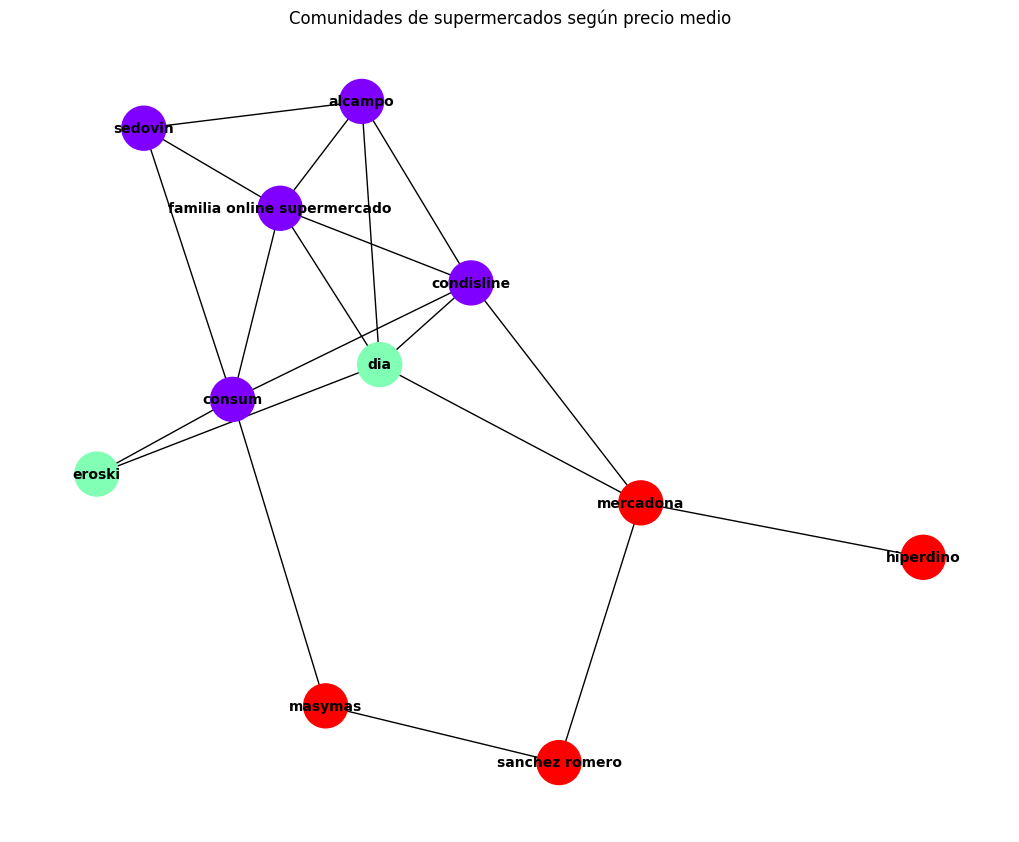

In [ ]:
plt.figure(figsize=(10, 8))

pos = nx.spring_layout(G, seed=42)
colors = [partition[node] for node in G.nodes()]
nx.draw(G, pos, with_labels=True, node_color=colors, cmap=plt.cm.rainbow, node_size=1000, font_size=10, font_weight='bold')

plt.title("Comunidades de supermercados según precio medio")
plt.show()

In [ ]:
# Now print the comunnnities shown in the graph

communities = {}
for node, comm in partition.items():
    if comm not in communities:
        communities[comm] = []
    communities[comm].append(node)

for comm, nodes in communities.items():
    print(f"Community {comm}: {', '.join(nodes)}")

Community 0: alcampo, condisline, consum, familia online supermercado, sedovin
Community 1: dia, eroski
Community 2: hiperdino, masymas, mercadona, sanchez romero


The Louvain Algorithm has grouped the supermarkets into three communities based on their pricing similarity. The supermarkets that are contained in the same community are more alike in their pricing strategies compared to those in other communities.

*   **Community Purple:** Sanchez Romero, Hiperdino and Mercadona are the ones with the most expensive prices when talking about basic product prices.

*   **Community Green:** Alcampo, Condisline, Dia, Familia online supermercado, and Sedovin share a profile of cheapest prices.

*   **Community Red:** Eroski, Consum, and Masymas share a pattern of prices that neither are expensive or cheap.

The study highlights the potential market segments—premium, budget, and mid-range when talking about the basic products that OCU recommends to have in everyones kitchen. It provides valuable insights into where to shop depending on individual budget preferences.

## 2n graph: Comparison of prices per weight across the same categories between supermarkets (Jaccard similarity)








The goal of this section is to compare the similarity among different supermarkets when it comes to their prices in the same product category.

But insted of using normal prices, we will use our "price_weight", which corrsponds to the price per kilogram, liter or unit depending on the product. That way it is fair for all the products with different quantities.

In [ ]:
supers = pd.read_csv("supers_con_cluster.csv", sep = ";")
print(supers["categories"].head())

0    ['productos del mar', 'pescado', 'atunes', 'co...
1    ['bebida', 'gazpacho', 'alimentos de origen ve...
2    ['bebida', 'gazpacho', 'alimentos de origen ve...
3    ['grasas', 'aceites', 'bebida', 'vegetales', '...
4    ['productos del mar', 'pescado', 'atunes', 'co...
Name: categories, dtype: object


As it can be seen above, the categories of each product come in a list format we must descompress.

In [ ]:
# Process categories with validation
def safe_eval(value):
    try:
        if isinstance(value, str):
            return eval(value)  # Try to convert the string into a list
        return []  # If it's not a string, return an empty list
    except:
        return []  # Handle eval errors by returning an empty list

supers['categories'] = supers['categories'].apply(safe_eval)

Now we will iterate over each row in the supers DataFrame, and for each row, we will process the categories associated with the product and its price.

We will store all this results in a dictionary called category_prices.

Why do we need sets instead of lists?

In [ ]:
# Create a dictionary to store prices by category and supermarket
category_prices = {}

# Get the prices by category for each supermarket
for _, row in supers.iterrows():
    for category in row['categories']:
        # Check if the category exists in the dictionary, if not, create it
        if category not in category_prices:
            category_prices[category] = {}

        # Check if the supermarket exists for the category, if not, create it
        if row['Super'] not in category_prices[category]:
            category_prices[category][row['Super']] = set()  # Use a set to store unique prices

        category_prices[category][row['Super']].add(row['price_weight'])  # Add the price to the set

Now, in order to see how similar two supermarkets are knowing their prices for a category, the Jaccard similarity can be done.

The Jaccard Similarity formula is:

$$
J(A, B) = \frac{|A \cap B|}{|A \cup B|}
$$

Where:
- \( A \) and \( B \) are two sets.
- \( |A \cap B| \) is the size of the intersection of sets \( A \) and \( B \).
- \( |A \cup B| \) is the size of the union of sets \( A \) and \( B \).


In [ ]:
# Function to calculate the Jaccard similarity between two sets
def jaccard_similarity(set1, set2):
    intersection = len(set1 & set2)  # Intersection (common elements)
    union = len(set1 | set2)  # Union (all unique elements)

    # Return the ratio of intersection to union, or 0 if the union is empty
    return intersection / union if union != 0 else 0

Now, the goal is to obtain the similarity among supermarkets for different categories.

We iterate through each product category and compare the prices of different supermarkets within that category using the Jaccard similarity coefficient. If the similarity between the prices is greater than 0, we create a connection between those supermarkets. This process helps to find supermarkets that share similar pricing patterns. These connections are stored in a dictionary, where the keys are pairs of supermarkets and the values represent the count of categories where the two supermarkets have similar prices.

In [ ]:
# Function to bin prices to the nearest multiple of `bin_size`, rounding up or down
def bin_prices(prices, bin_size=1):
    # Apply rounding for each price and then scale it back to the nearest bin
    return set([int(price // bin_size) + (1 if price % bin_size >= bin_size / 2 else 0) for price in prices])

# Connection of supermarkets based on similar prices using Jaccard similarity
super_connections = {}
similarities = []
similarity_threshold = 0.5  # Define a threshold for similarity
bin_size = 1  # Define bin size for price rounding (can be adjusted)

for category, super_prices in category_prices.items():
    # Compare supermarkets within each category
    supers = list(super_prices.keys())
    for i in range(len(supers)):
        for j in range(i + 1, len(supers)):
            super1 = supers[i]
            super2 = supers[j]
            prices1 = super_prices[super1]
            prices2 = super_prices[super2]

            # Bin the prices before calculating Jaccard similarity
            binned_prices1 = bin_prices(prices1, bin_size)
            binned_prices2 = bin_prices(prices2, bin_size)

            # Calculate Jaccard similarity between the binned prices of the supermarkets
            similarity = jaccard_similarity(binned_prices1, binned_prices2)

            # Store the similarity with the corresponding supermarket pair and category
            similarities.append((similarity, super1, super2, category))

            # If the Jaccard similarity is greater than the threshold, add connection
            if similarity > similarity_threshold:
                if (super1, super2) not in super_connections:
                    super_connections[(super1, super2)] = 0
                super_connections[(super1, super2)] += 1

We can print the highest and lowest simialrities.

In [ ]:
# Sort similarities in descending order and print the top 5
top_5 = sorted(similarities, key=lambda x: x[0], reverse=True)[:5]
# Sort similarities in ascending order and print the bottom 5
bottom_5 = sorted(similarities, key=lambda x: x[0])[:5]

# Print the top 5 and bottom 5 similarities
print("Top 5 Similarities:")
for similarity, super1, super2, category in top_5:
    print(f"Jaccard similarity between {super1} and {super2} for category '{category}': {similarity:.4f}")

print("\nBottom 5 Similarities:")
for similarity, super1, super2, category in bottom_5:
    print(f"Jaccard similarity between {super1} and {super2} for category '{category}': {similarity:.4f}") # WITHOUT THE 0.5 THRESHOLD!

Top 5 Similarities:
Jaccard similarity between CondisLine and Sedovin for category 'gazpacho': 1.0000
Jaccard similarity between HiperDino and consum for category 'gazpacho': 1.0000
Jaccard similarity between Mercadona and CondisLine for category 'jugos y néctares': 1.0000
Jaccard similarity between Masymas and alcampo for category 'jugos y néctares': 1.0000
Jaccard similarity between CondisLine and consum for category 'jugos exprimidos': 1.0000

Bottom 5 Similarities:
Jaccard similarity between Mercadona and CondisLine for category 'atunes': 0.0000
Jaccard similarity between Mercadona and sanchez romero for category 'atunes': 0.0000
Jaccard similarity between Masymas and CondisLine for category 'atunes': 0.0000
Jaccard similarity between CondisLine and Dia for category 'atunes': 0.0000
Jaccard similarity between CondisLine and Sedovin for category 'atunes': 0.0000


Now, we can see how much categories each supermarket have in common with other supermarkets (notice that if supermarket 1 has in common category "A" with supermarket 2 and 3, this will be counted as two shared categories)


Supermarket connections (number of shared categories):
Masymas ↔ alcampo: 49 categories
Masymas ↔ consum: 100 categories
alcampo ↔ Dia: 42 categories
Mercadona ↔ alcampo: 33 categories
Masymas ↔ Familia Online Supermercado: 67 categories
alcampo ↔ HiperDino: 15 categories
alcampo ↔ consum: 55 categories
alcampo ↔ Familia Online Supermercado: 42 categories
Dia ↔ Familia Online Supermercado: 51 categories
HiperDino ↔ Familia Online Supermercado: 25 categories
consum ↔ Familia Online Supermercado: 85 categories
Mercadona ↔ CondisLine: 21 categories
Mercadona ↔ Dia: 49 categories
Mercadona ↔ HiperDino: 15 categories
Mercadona ↔ consum: 43 categories
Mercadona ↔ Familia Online Supermercado: 40 categories
CondisLine ↔ alcampo: 26 categories
CondisLine ↔ Dia: 21 categories
CondisLine ↔ HiperDino: 12 categories
CondisLine ↔ consum: 28 categories
CondisLine ↔ Familia Online Supermercado: 36 categories
Dia ↔ HiperDino: 21 categories
Dia ↔ consum: 35 categories
CondisLine ↔ Sedovin: 4 categories

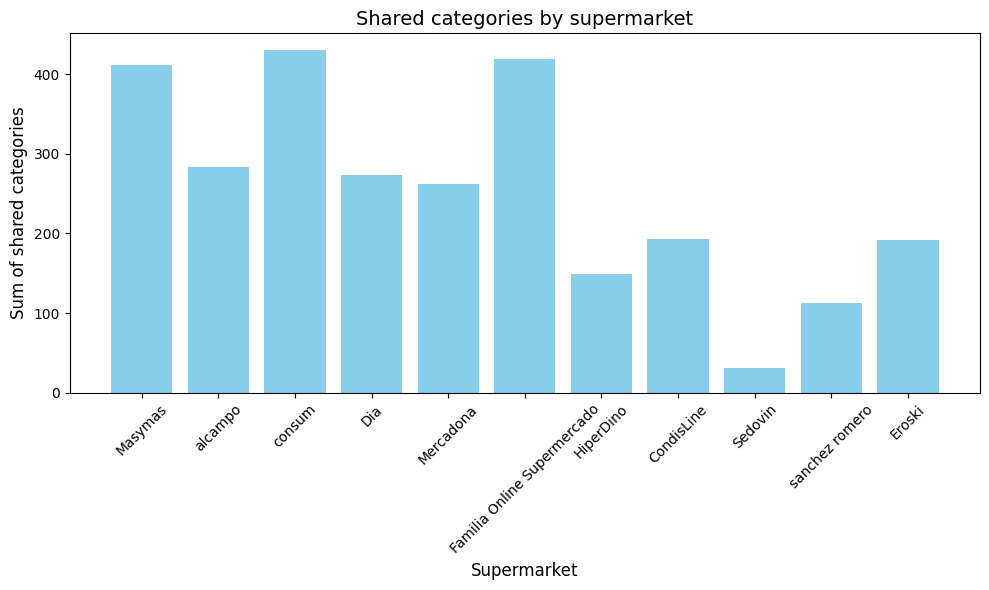

In [ ]:
G = nx.Graph()

# Create nodes and edges in the graph
for (super1, super2), shared_categories in super_connections.items():
    G.add_node(super1, tipo='supermarket')
    G.add_node(super2, tipo='supermarket')
    G.add_edge(super1, super2, weight=shared_categories)

# Print final supermarket connections
print("\nSupermarket connections (number of shared categories):")
for (super1, super2), shared_categories in super_connections.items():
    print(f"{super1} ↔ {super2}: {shared_categories} categories")

# Create a dictionary to store the sum of categories per supermarket
super_category_sums = {}

for node in G.nodes:
    super_category_sums[node] = sum(
        G[node][neighbor]['weight'] for neighbor in G.neighbors(node)
    )

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(super_category_sums.keys(), super_category_sums.values(), color='skyblue')
plt.xlabel('Supermarket', fontsize=12)
plt.ylabel('Sum of shared categories', fontsize=12)
plt.title('Shared categories by supermarket', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Now, the graph plot per supermarket can be doen to see the supermarkets that are closers or further among them.

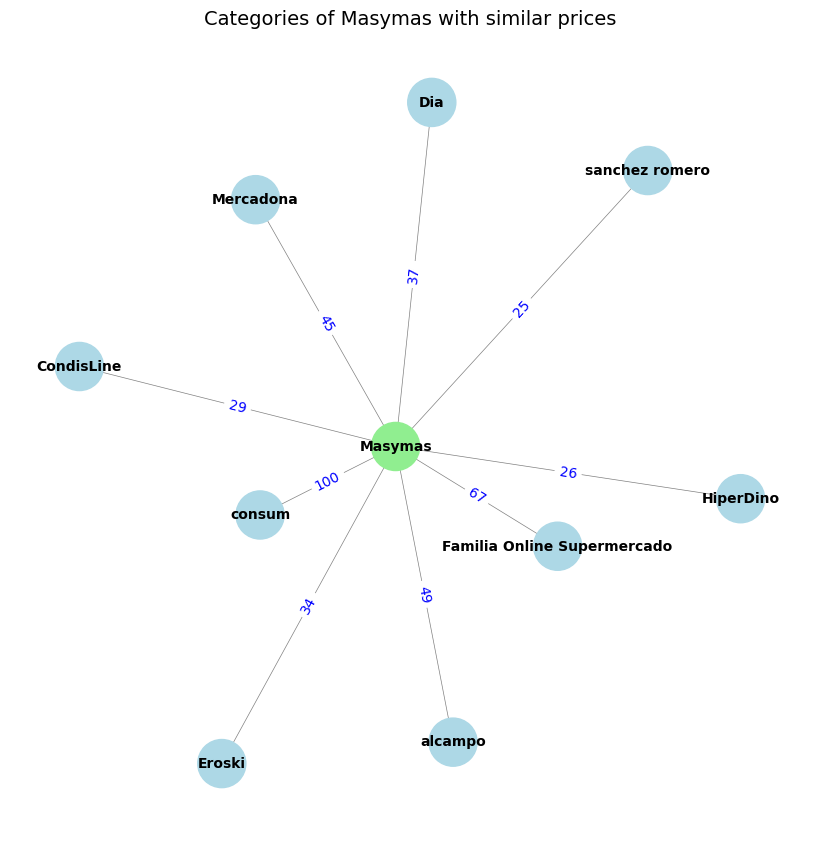

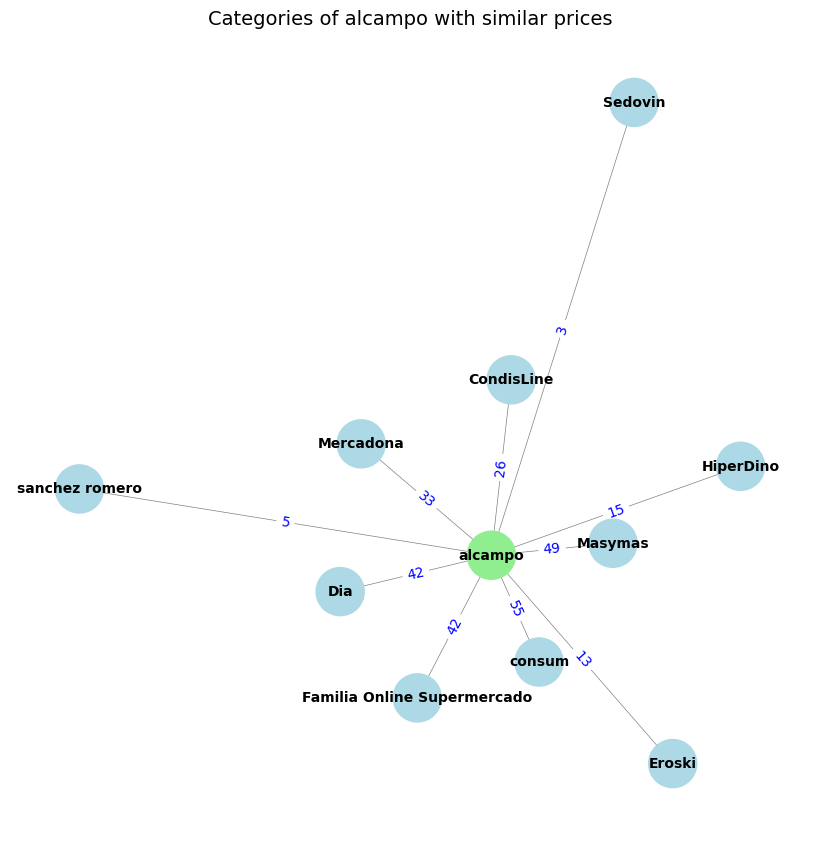

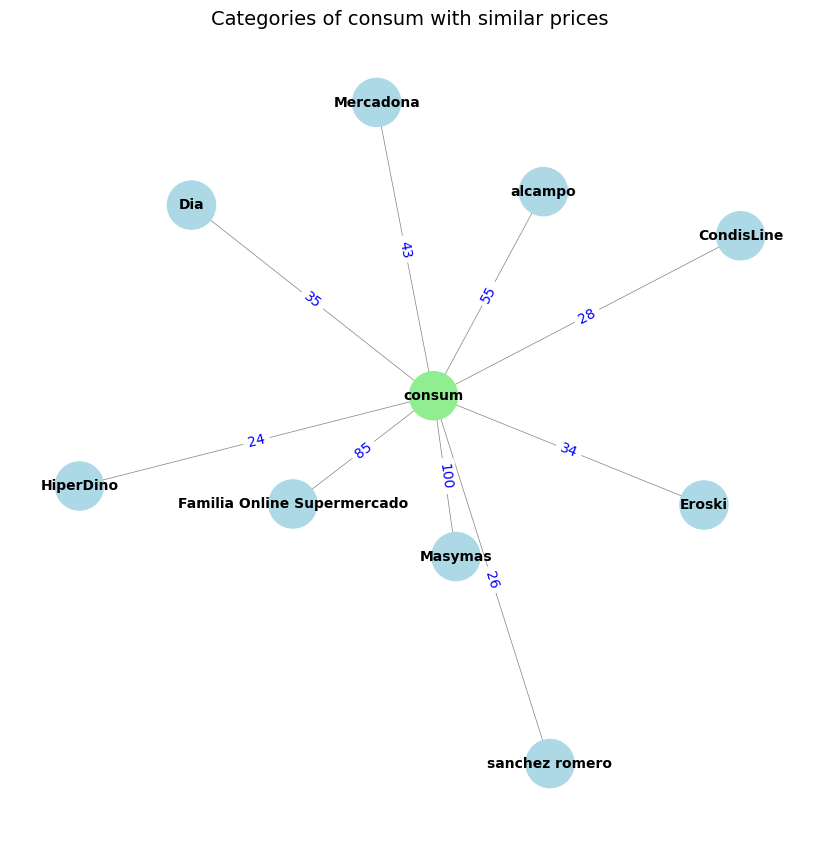

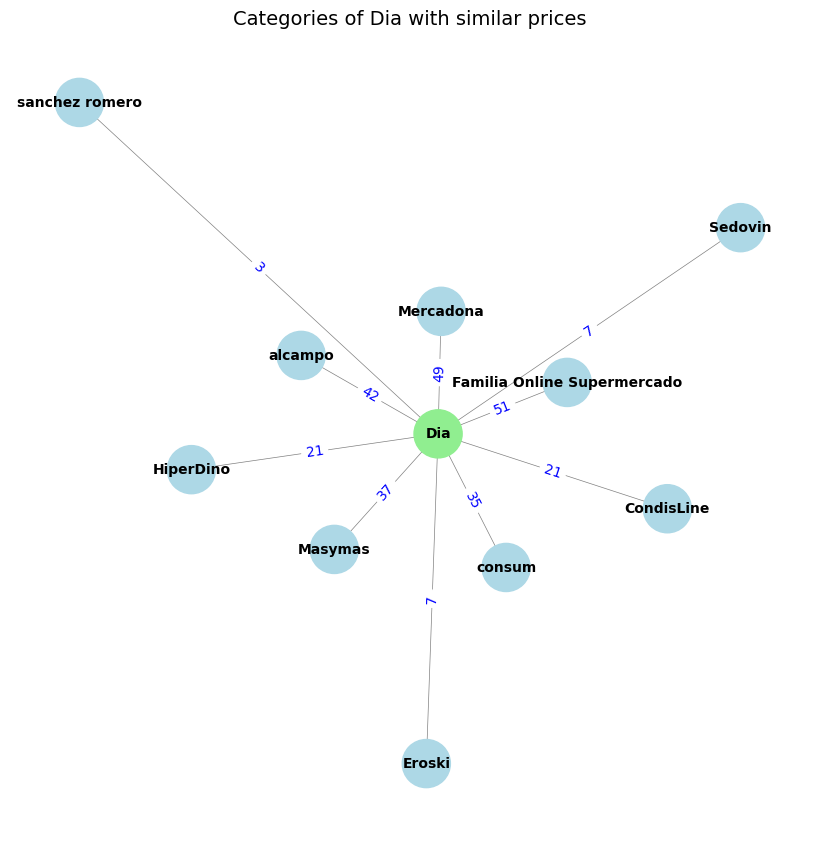

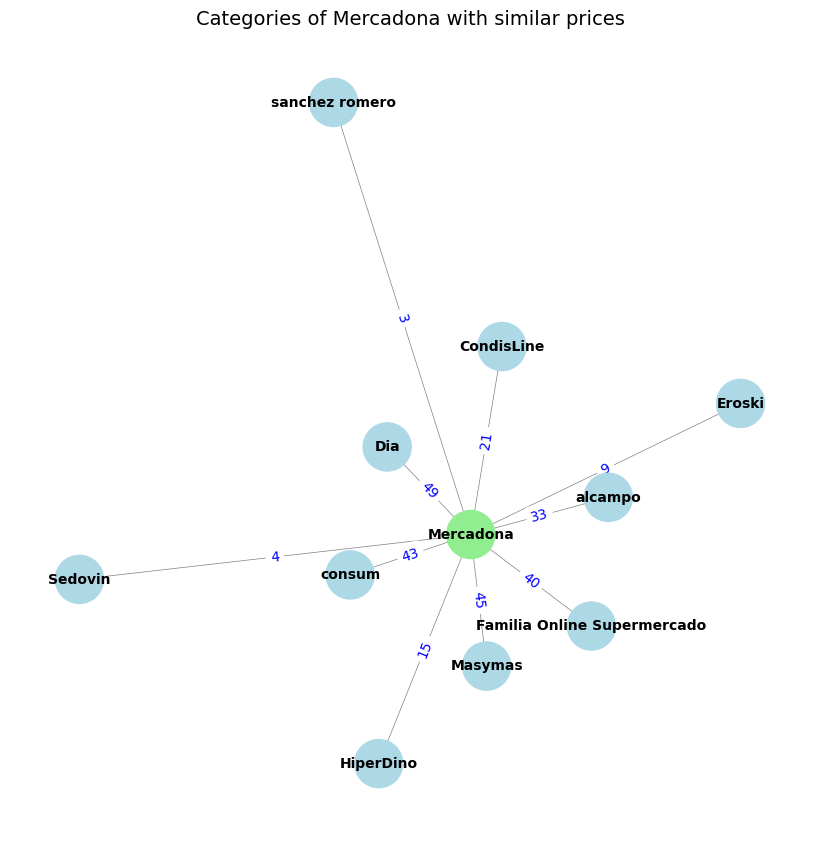

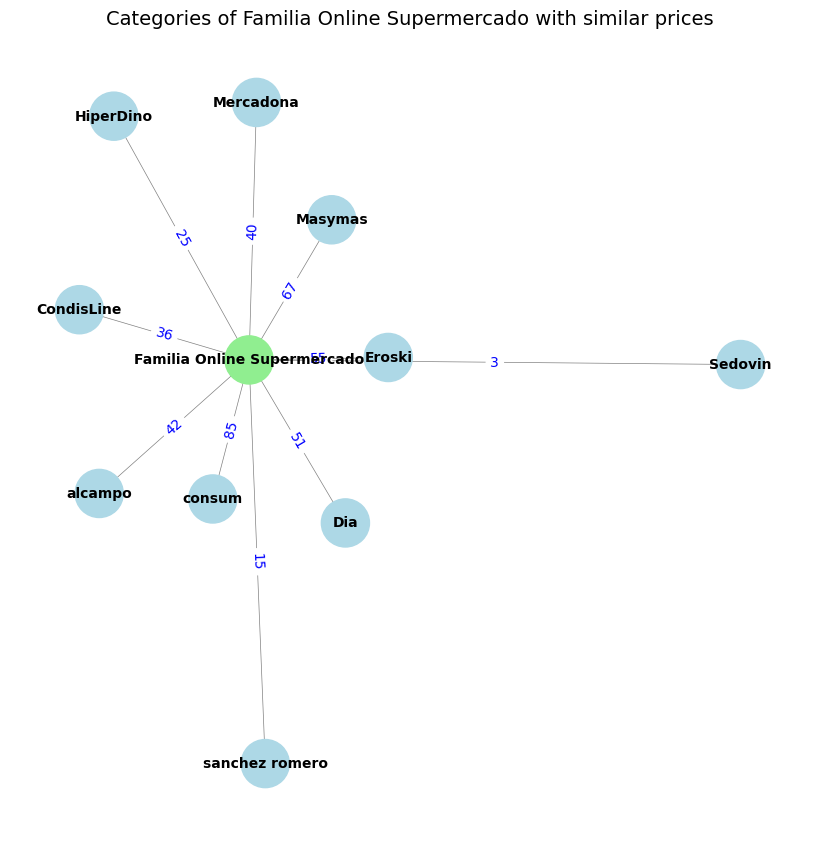

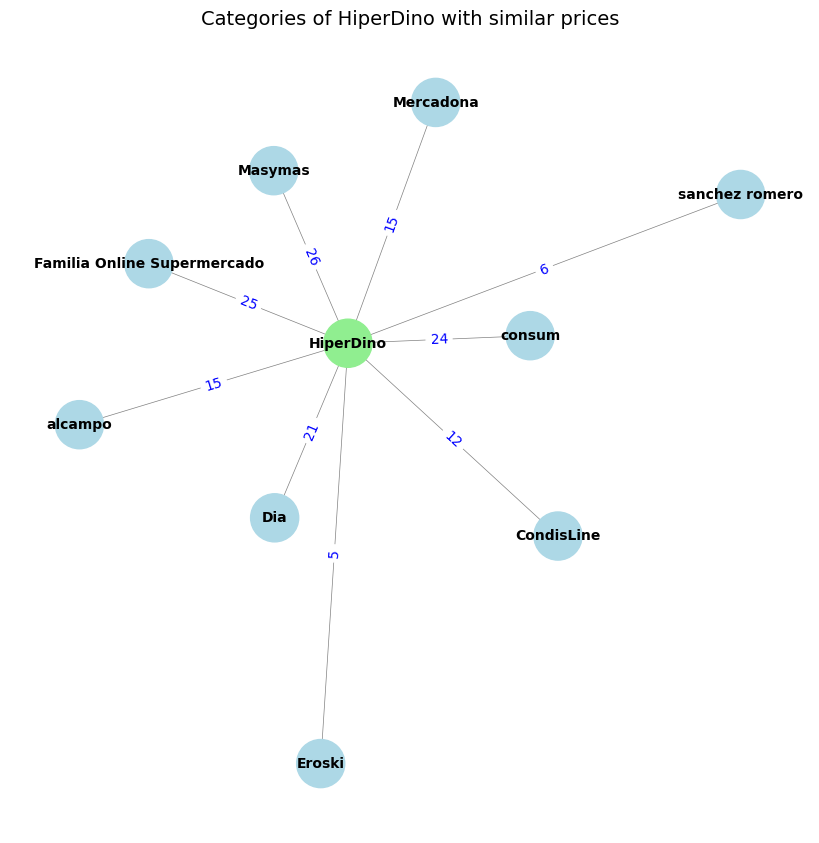

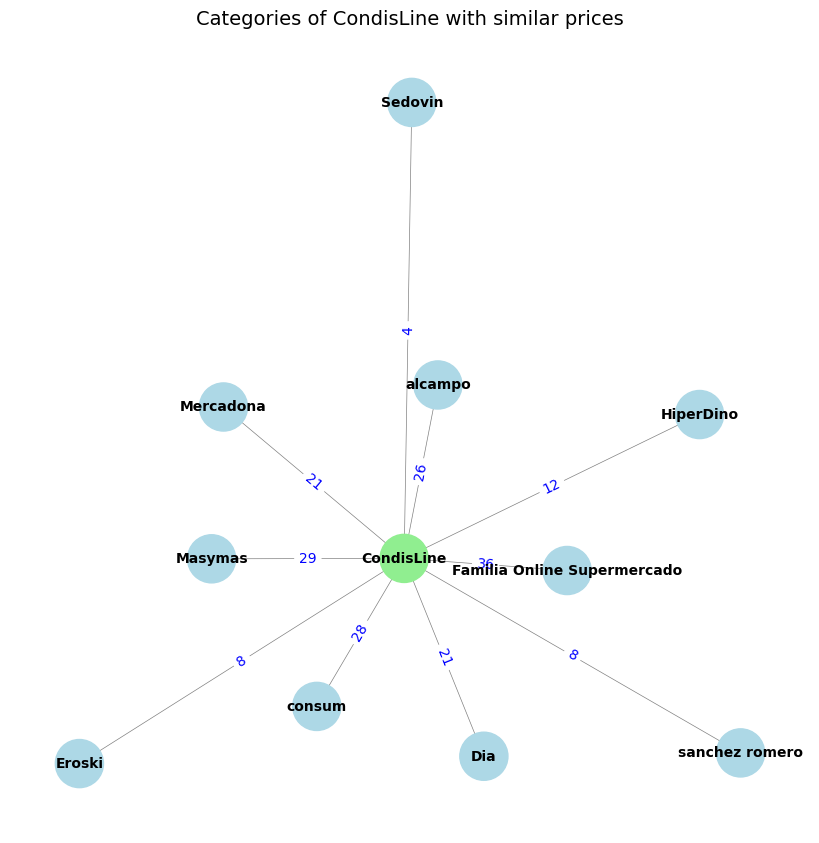

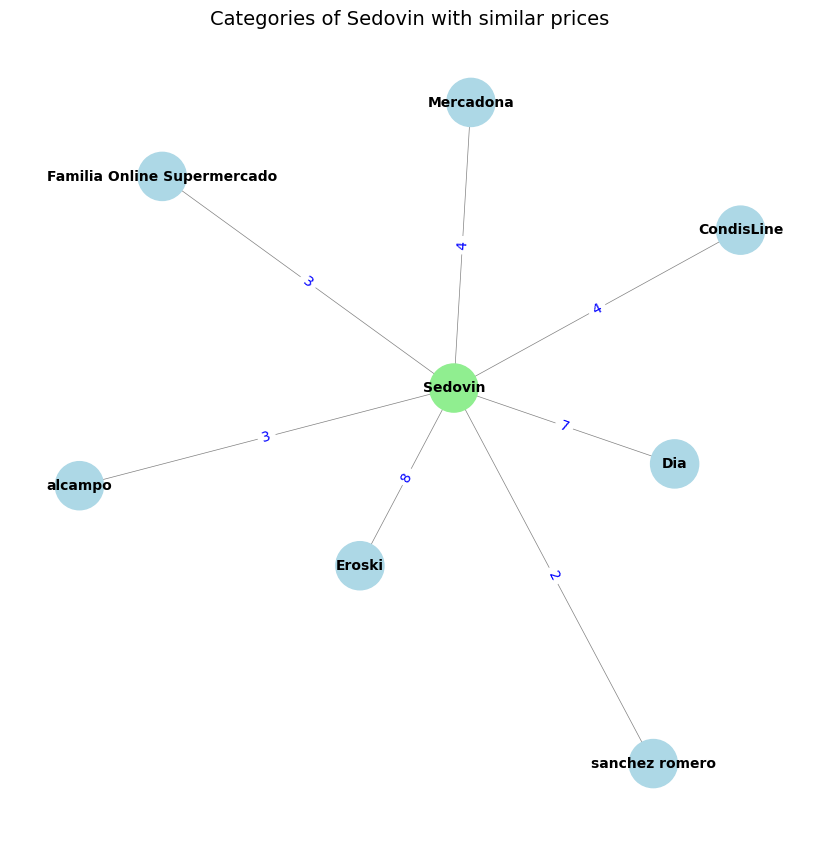

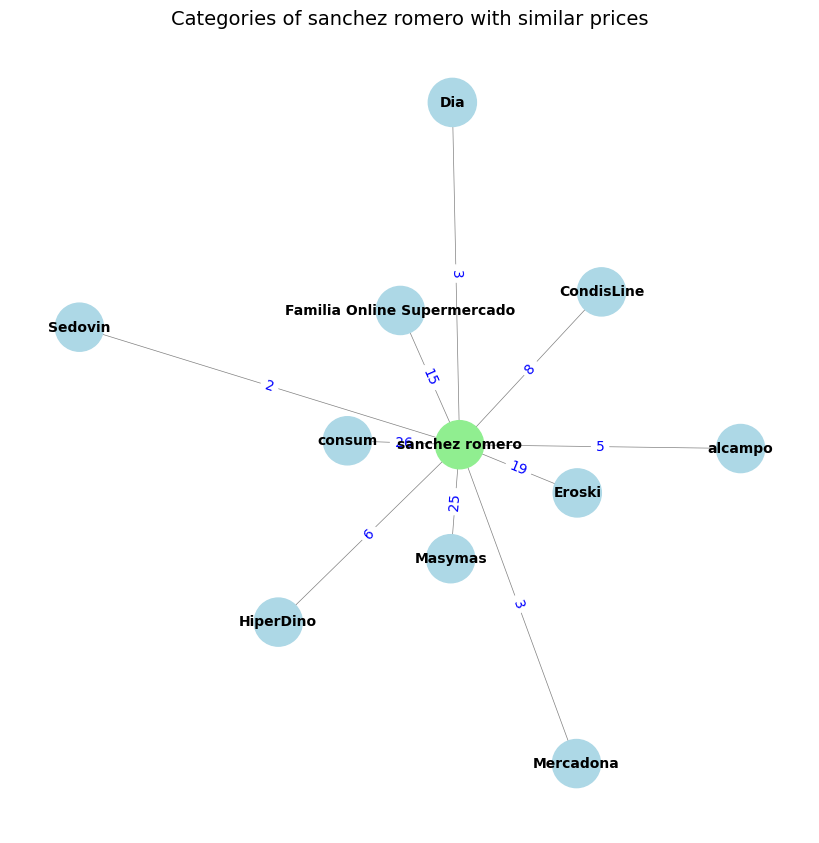

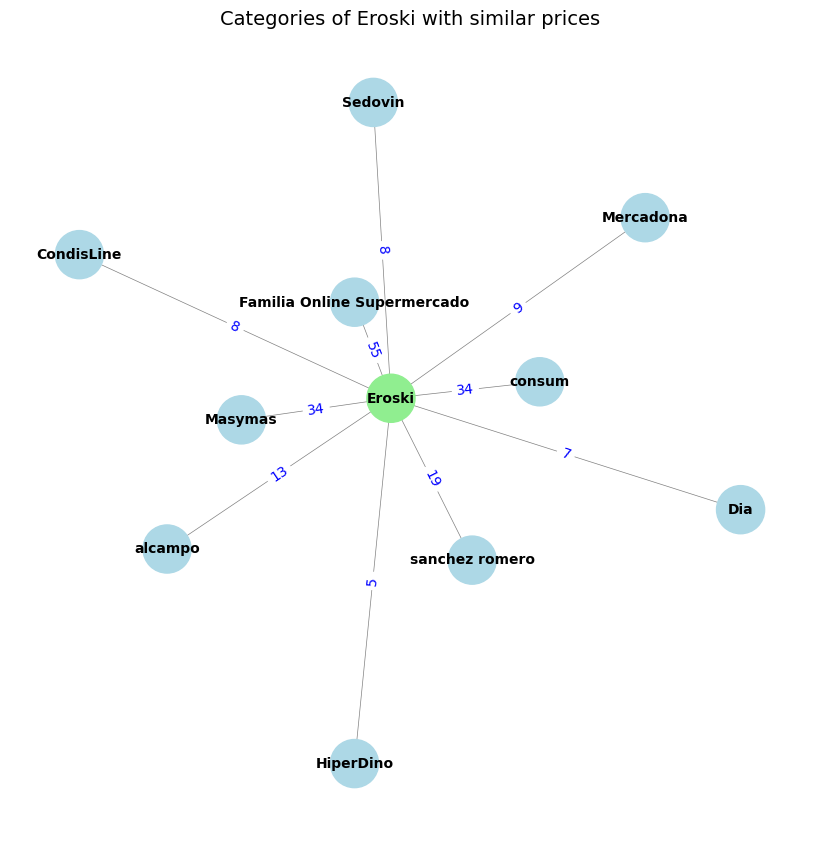

In [ ]:
# Visualization by supermarket
for super_ in G.nodes:
    # Create a subgraph only with the supermarket and its direct connections
    subgraph = nx.Graph()
    for neighbor in G.neighbors(super_):
        weight = G[super_][neighbor]['weight']
        subgraph.add_node(super_, tipo='supermarket')
        subgraph.add_node(neighbor, tipo='supermarket')
        subgraph.add_edge(super_, neighbor, weight=weight)

    # Use the layout
    pos = nx.spring_layout(subgraph)

    # Node sizes and colors
    node_sizes = [1200 for _ in subgraph.nodes]
    node_colors = ['lightgreen' if node == super_ else 'lightblue' for node in subgraph.nodes]

    # Create the figure for each supermarket
    plt.figure(figsize=(8, 8))

    # Draw the subgraph
    nx.draw(
        subgraph, pos, with_labels=True,
        node_color=node_colors, edge_color='gray',
        font_size=10, node_size=node_sizes, font_weight='bold', width=0.5
    )

    # Edge labels
    edge_labels = nx.get_edge_attributes(subgraph, 'weight')
    nx.draw_networkx_edge_labels(
        subgraph, pos, edge_labels=edge_labels, font_size=10, font_color='blue'
    )

    # Title of the plot
    plt.title(f"Categories of {super_} with similar prices", fontsize=14)
    plt.axis('off')  # Remove the axes
    plt.show()

## 3rd graph: white label comparison of prices per weight among supermarkets (Jaccard similarity)

It is worth to compare the prices per weight as in th eprevious graph but now of white label products per supermarket. First, we will store the name of the labels.

In [ ]:
supers = pd.read_csv("supers_con_cluster.csv", sep = ";")

In [ ]:
# Supermarkets and their white labels
private_brands = {
    'mercadona': ['hacendado'],
    'masymas': ['alteza'],
    'condisline': ['condis'],
    'alcampo': ['auchan'],
    'dia': ['dia'],
    'hiperdino': ['hiperdino'],
    'sedovin': ['coaliment'],
    'sanchez romero': ['sanchez romero'],
    'consum': ['consum'],
    'eroski': ['eroski'],
    'familia online supermercado': ['familia online']
}

In [ ]:
# To avoid errors we transform all to lower, both the dictionary and the df brands and supers
private_brands = {supermercado: [marca.lower() for marca in marcas] for supermercado, marcas in private_brands.items()}
supers['brand'] = supers['brand'].str.lower()
supers['Super'] = supers['Super'].str.lower()

# We create a df with only this products
df_private_brands = supers[supers['brand'].isin([brand for brands in private_brands.values() for brand in brands])]

As an initial insight, the mean price of each white label can be extracted.

In [ ]:
# Mean price per label
mean_price_per_brand = df_private_brands.groupby('brand')['price'].mean().reset_index()
mean_price_per_brand = mean_price_per_brand.sort_values(by='price', ascending=False)

print(mean_price_per_brand)

             brand     price
10  sanchez romero  8.062500
3           condis  3.753994
7   familia online  3.693994
9        hiperdino  2.847488
2        coaliment  2.618333
8        hacendado  2.573401
1           auchan  2.389370
5              dia  2.244970
4           consum  2.138989
6           eroski  2.090060
0           alteza  1.602269


As done in the previous graph, using the prices per label now, the Jaccard similarity index will be calculated. Remember this is how we calculated it:

```
# Function to calculate the Jaccard similarity between two sets
def jaccard_similarity(set1, set2):
    intersection = len(set1 & set2)  # Intersection (common elements)
    union = len(set1 | set2)  # Union (all unique elements)
    
    # Return the ratio of intersection to union, or 0 if the union is empty
    return intersection / union if union != 0 else 0
```



First, the prices will be stored by supermarket, and now by label, instead of category.

In [ ]:
# Create a dictionary to store prices for each private brand
brand_prices = {}

# Iterate through each row in the private brands dataframe
for _, row in df_private_brands.iterrows():
    brand = row['brand']  # Get the brand name
    price = row['price_weight']  # Get the price of the brand

    # If the brand is not already in the dictionary, add it
    if brand not in brand_prices:
        brand_prices[brand] = set()

    # Add the price to the set for this brand (avoids duplicates)
    brand_prices[brand].add(price)

The Jaccard similarity is calcualted using all prices per label per two supermarkets.

In [ ]:
# Function to bin prices to the nearest multiple of `bin_size`
def bin_prices(prices, bin_size=1):
    return set([int(price // bin_size) + (1 if price % bin_size >= bin_size / 2 else 0) for price in prices])

# Calculate Jaccard similarity between the private brands with binned prices
jaccard_similarities = {}

# Compare each brand with every other brand
for brand1, prices1 in brand_prices.items():
    for brand2, prices2 in brand_prices.items():
        if brand1 != brand2:  # Avoid comparing the brand with itself
            # Bin the prices before calculating the Jaccard similarity
            binned_prices1 = bin_prices(prices1)
            binned_prices2 = bin_prices(prices2)

            # Calculate the Jaccard similarity between the binned prices
            similarity = jaccard_similarity(binned_prices1, binned_prices2)

            # Ensure no duplicate comparisons by checking if the pair has already been considered
            if (brand1, brand2) not in jaccard_similarities and (brand2, brand1) not in jaccard_similarities:
                jaccard_similarities[(brand1, brand2)] = similarity

# Limit the Jaccard similarities to two decimal places for easier reading
jaccard_similarities = {key: round(value, 2) for key, value in jaccard_similarities.items()}

# Print the Jaccard similarities
print(jaccard_similarities)

{('hacendado', 'alteza'): 0.64, ('hacendado', 'condis'): 0.62, ('hacendado', 'auchan'): 0.39, ('hacendado', 'dia'): 0.62, ('hacendado', 'hiperdino'): 0.45, ('hacendado', 'coaliment'): 0.46, ('hacendado', 'sanchez romero'): 0.1, ('hacendado', 'consum'): 0.57, ('hacendado', 'eroski'): 0.6, ('hacendado', 'familia online'): 0.65, ('alteza', 'condis'): 0.68, ('alteza', 'auchan'): 0.43, ('alteza', 'dia'): 0.62, ('alteza', 'hiperdino'): 0.52, ('alteza', 'coaliment'): 0.43, ('alteza', 'sanchez romero'): 0.07, ('alteza', 'consum'): 0.59, ('alteza', 'eroski'): 0.58, ('alteza', 'familia online'): 0.7, ('condis', 'auchan'): 0.57, ('condis', 'dia'): 0.63, ('condis', 'hiperdino'): 0.7, ('condis', 'coaliment'): 0.49, ('condis', 'sanchez romero'): 0.1, ('condis', 'consum'): 0.63, ('condis', 'eroski'): 0.5, ('condis', 'familia online'): 0.64, ('auchan', 'dia'): 0.5, ('auchan', 'hiperdino'): 0.76, ('auchan', 'coaliment'): 0.47, ('auchan', 'sanchez romero'): 0.07, ('auchan', 'consum'): 0.54, ('auchan', '

Now, as before, the graph plot can be done associating as weight each similarity. For readability, a plot will be done per supermarket.

<ipython-input-39-5677aba1aa8e>:34: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


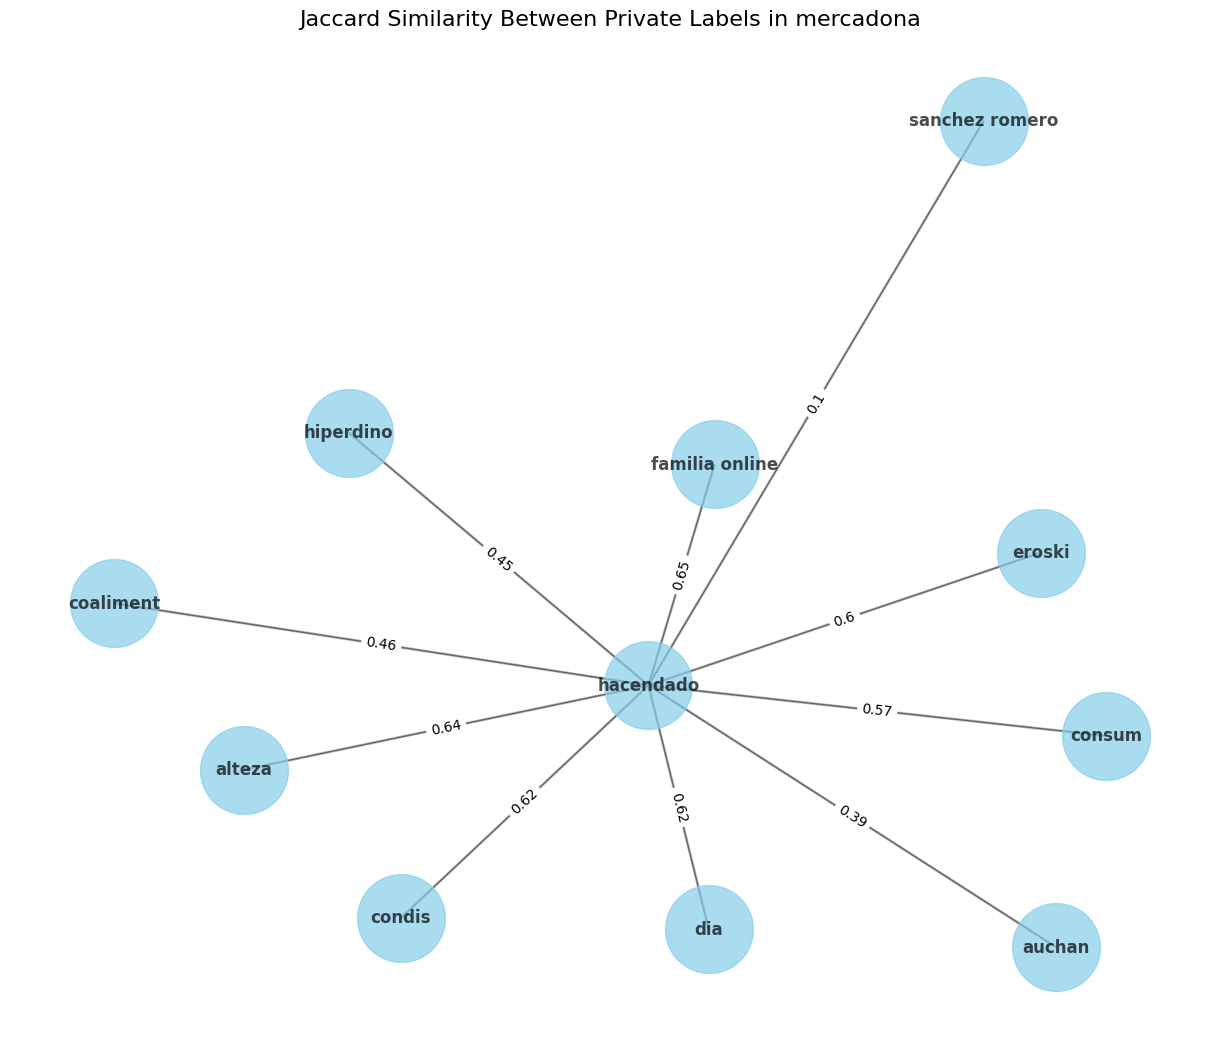

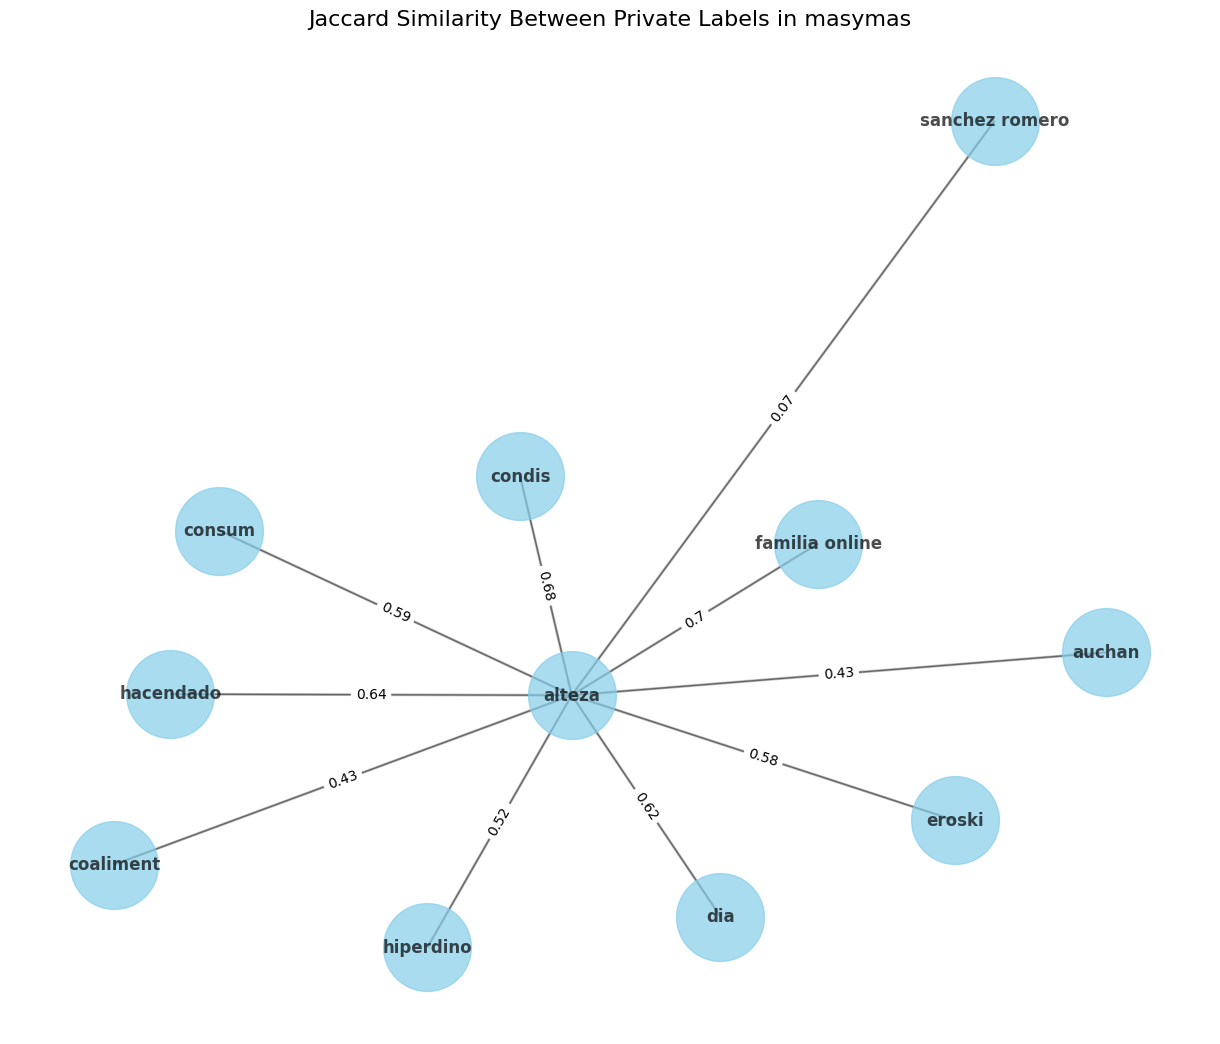

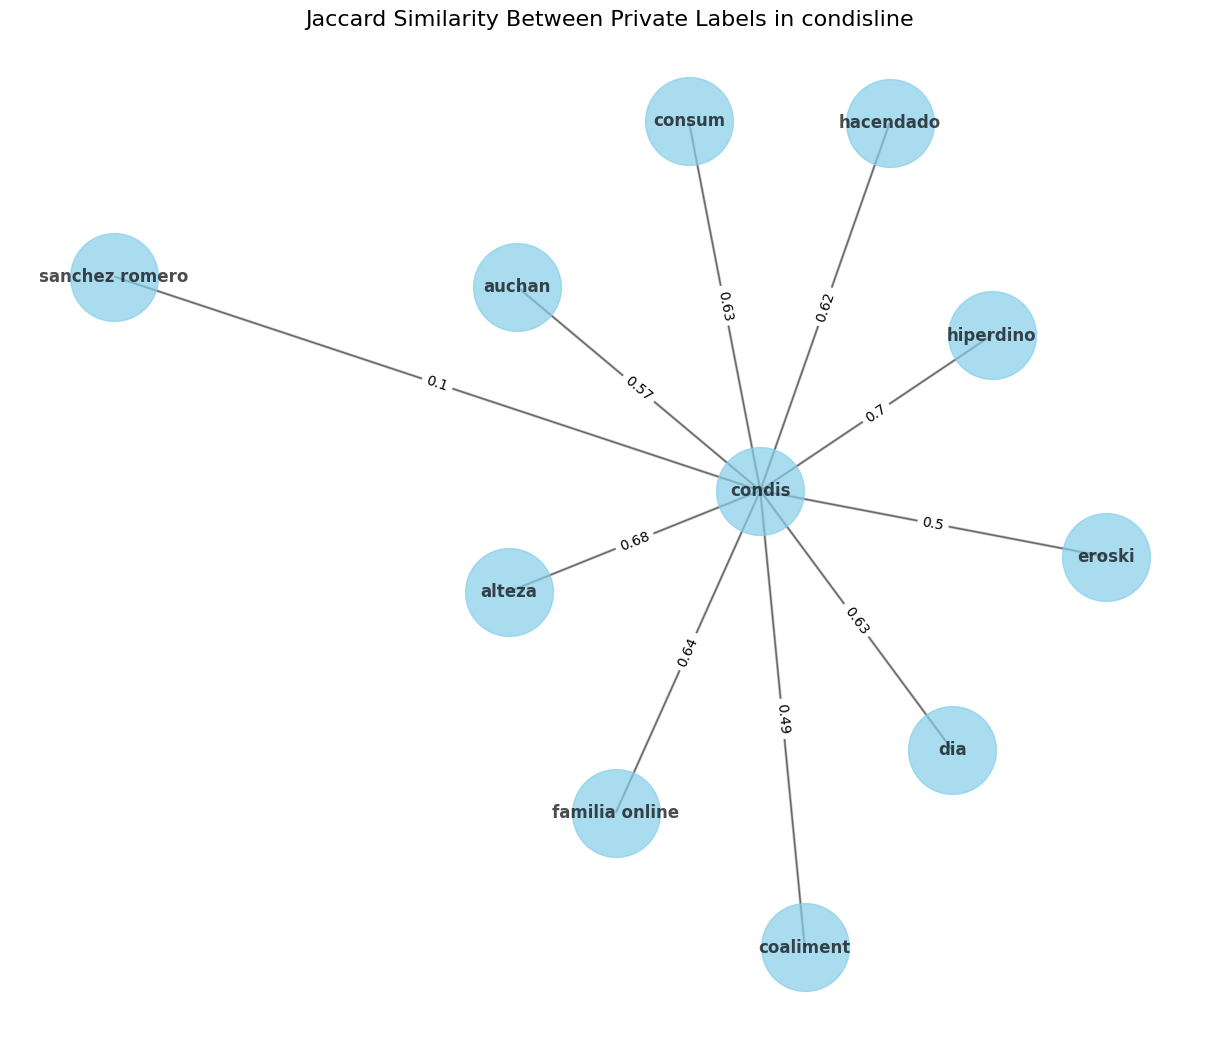

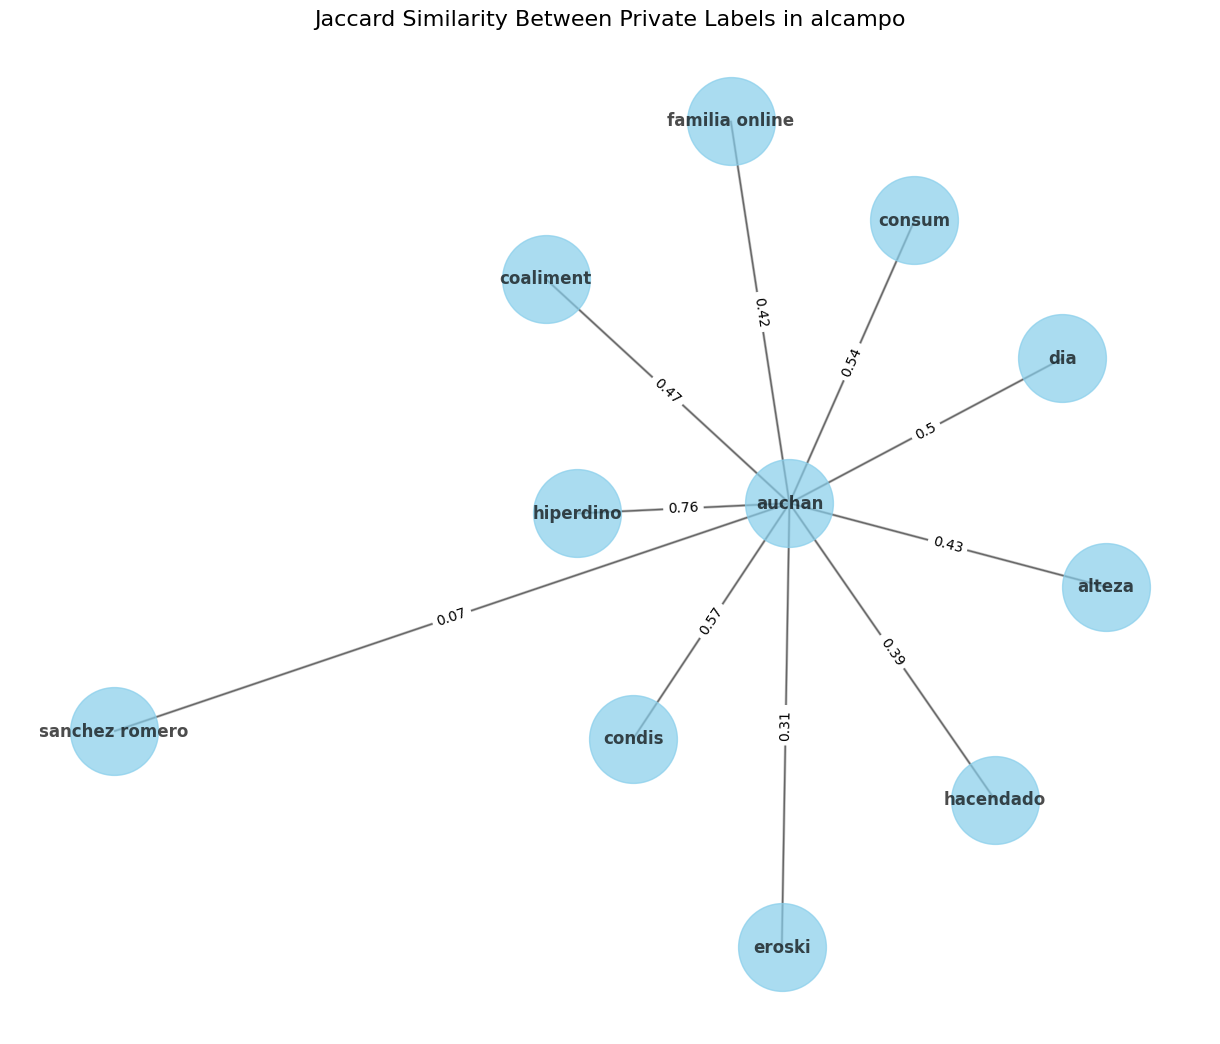

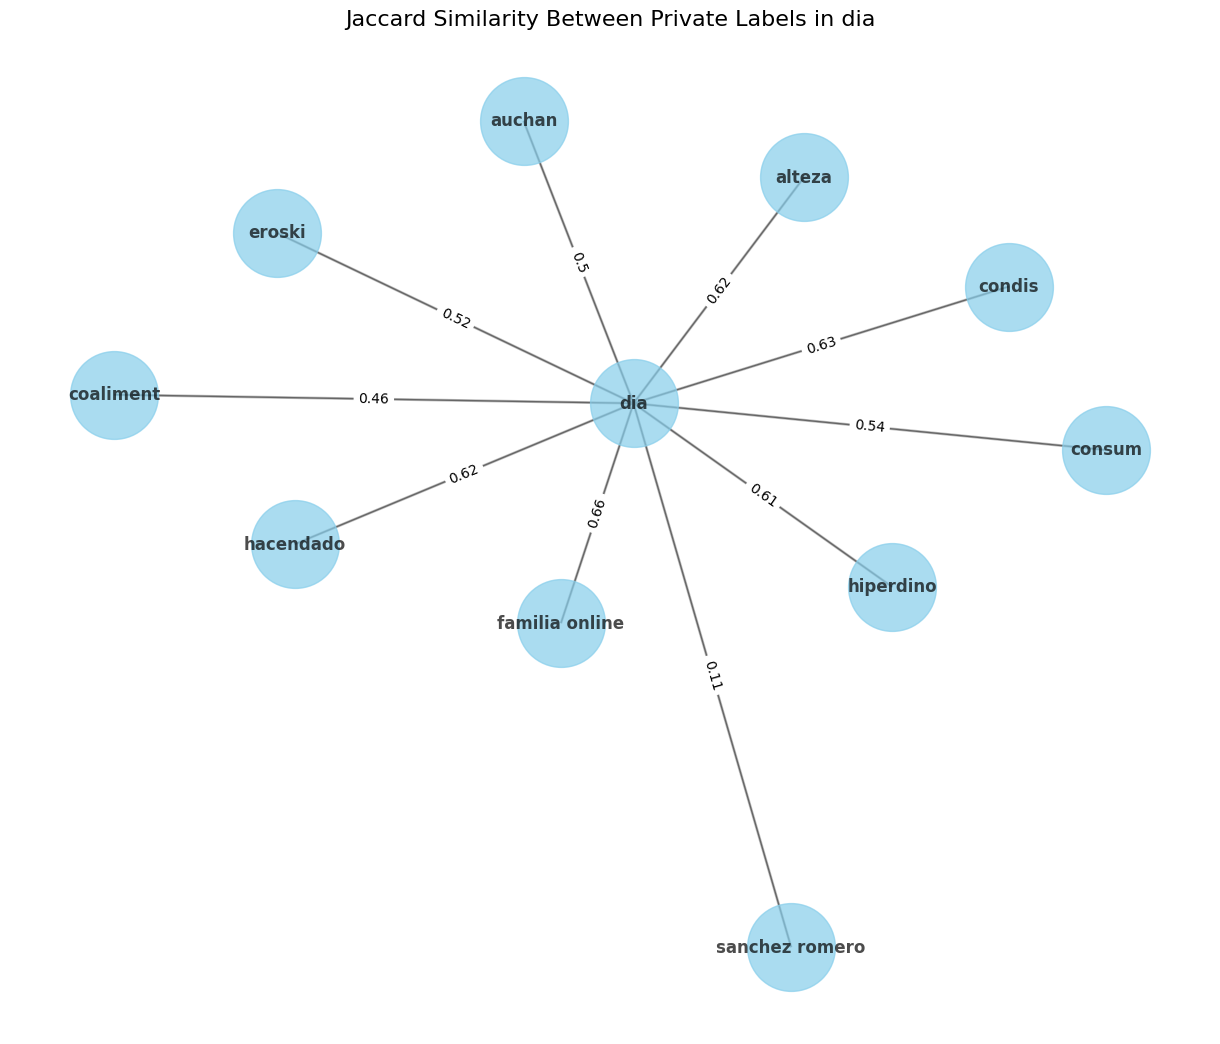

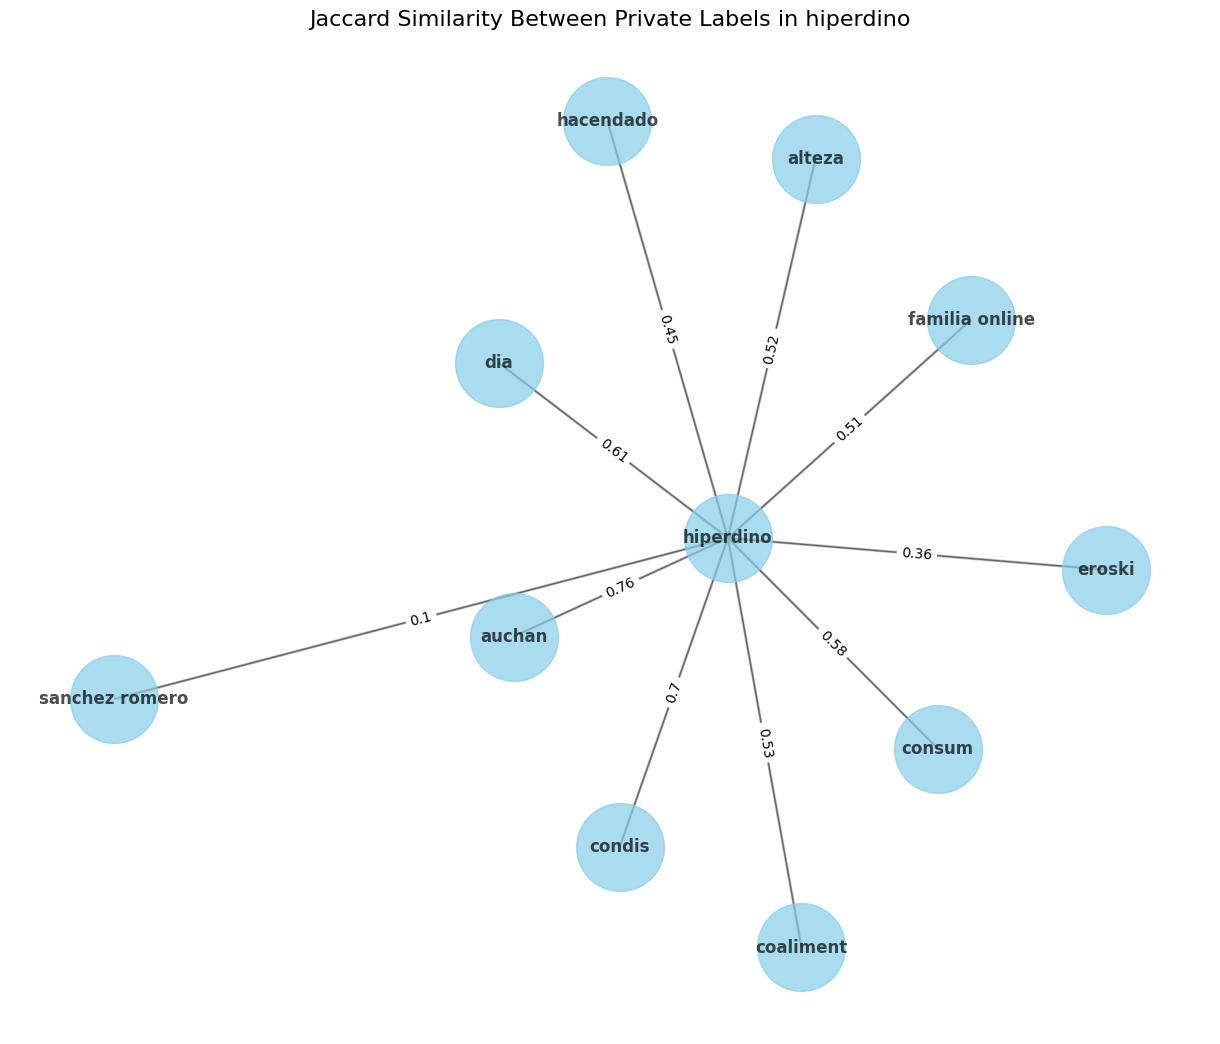

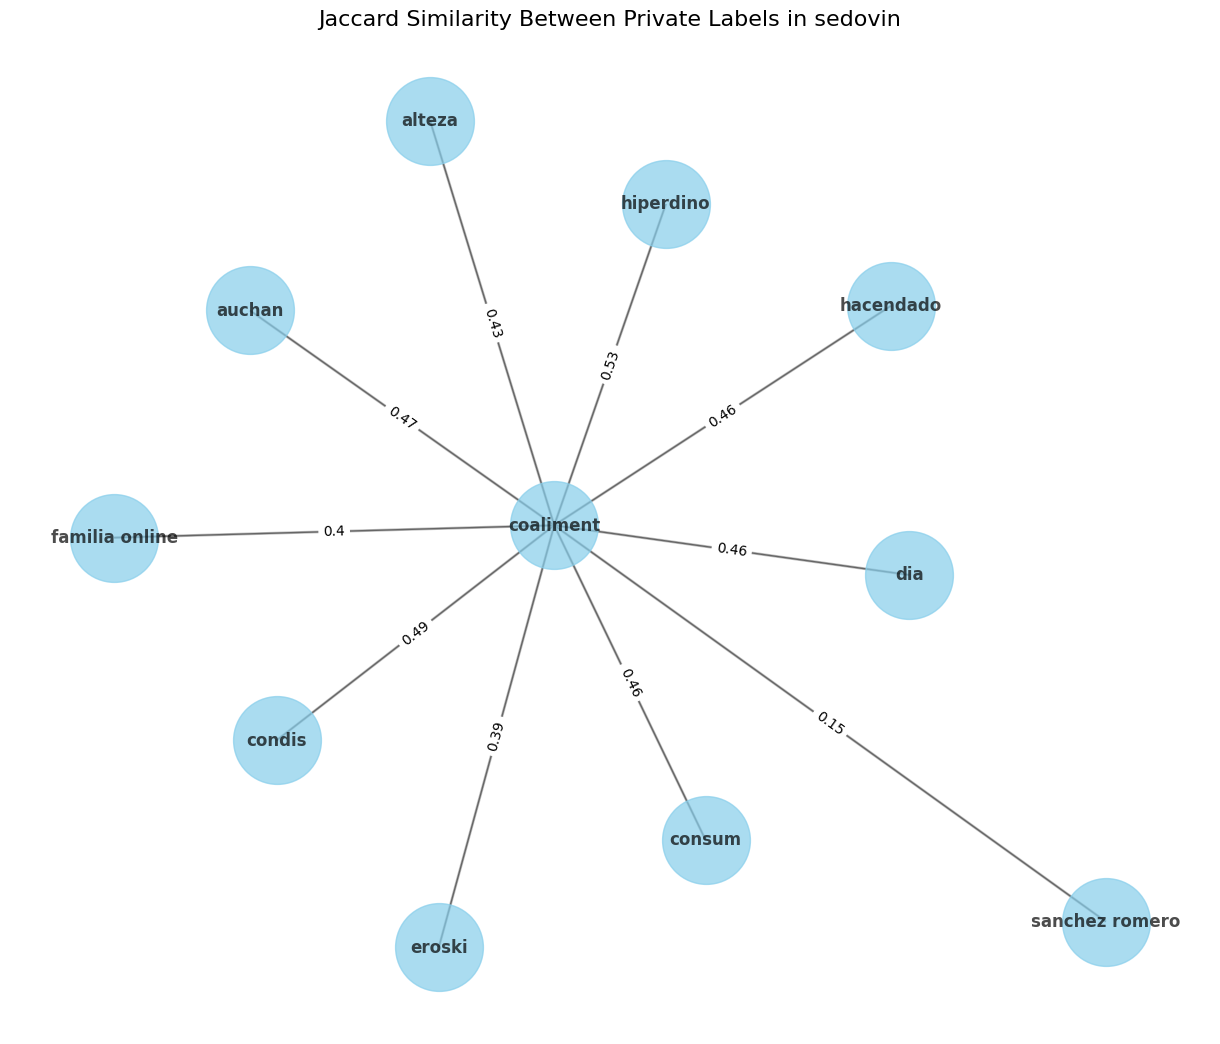

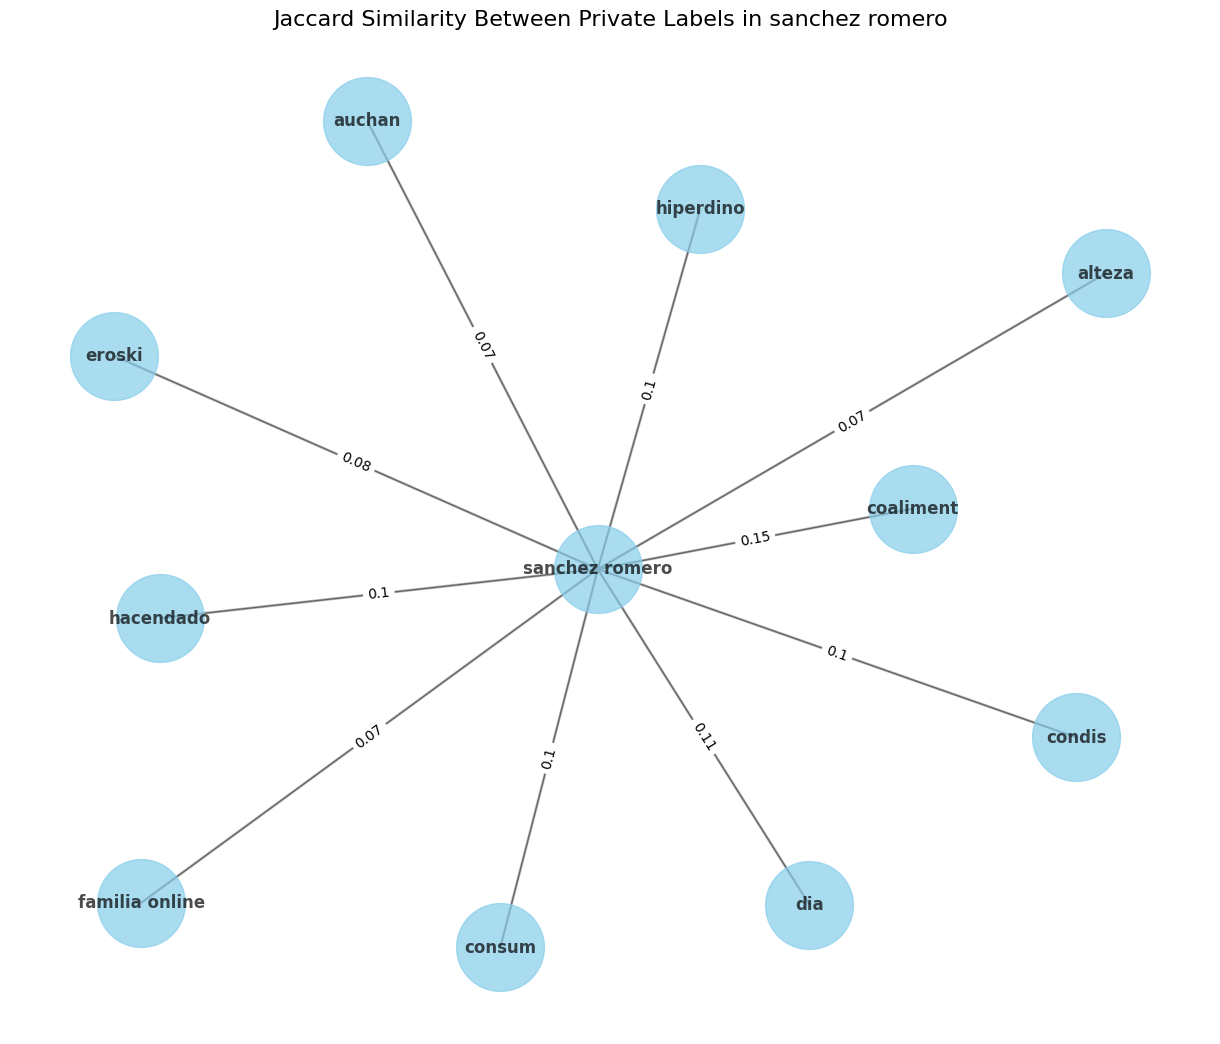

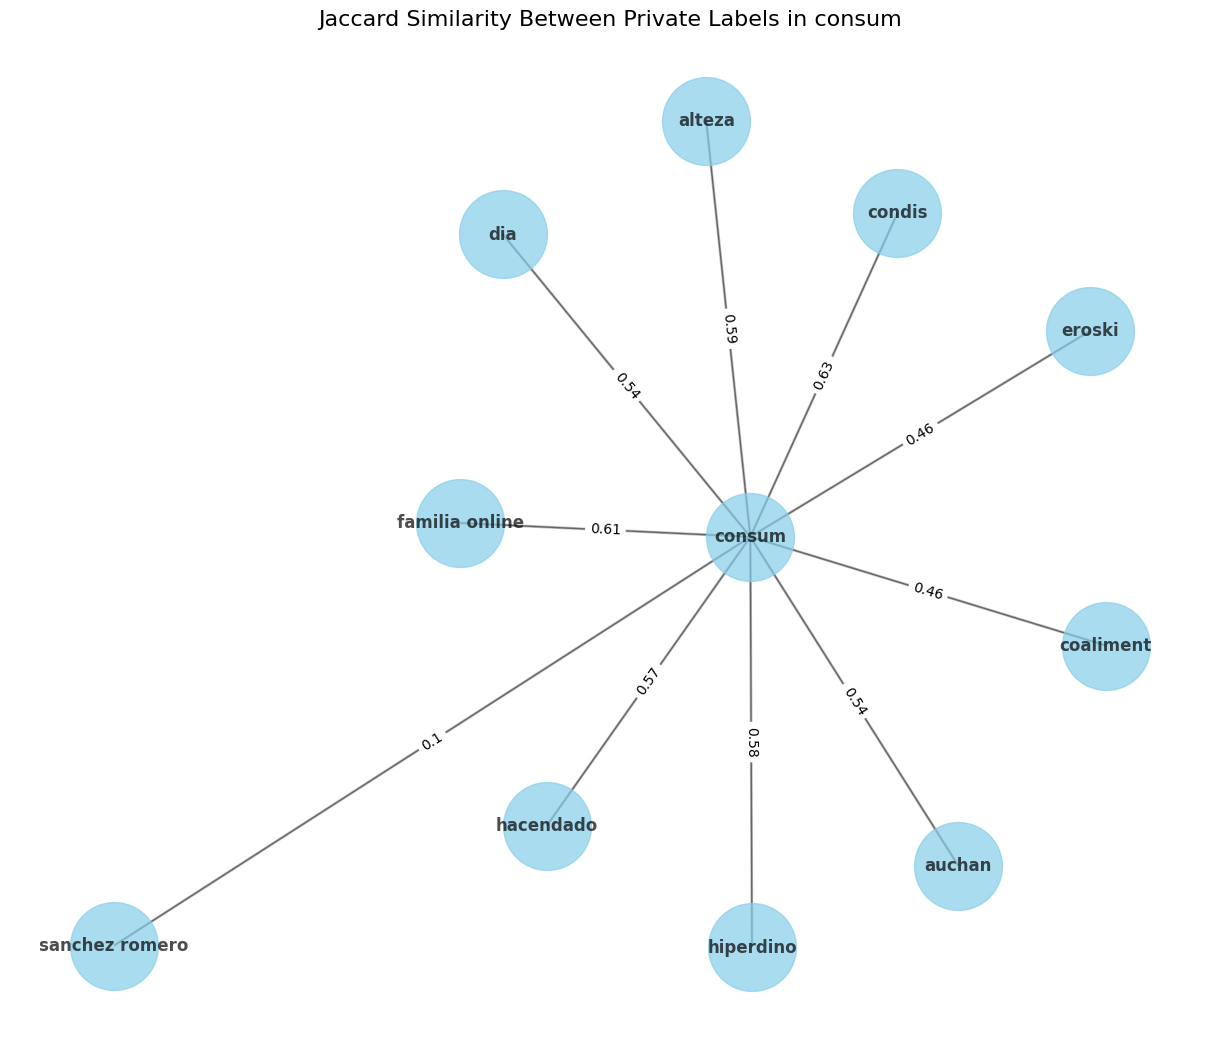

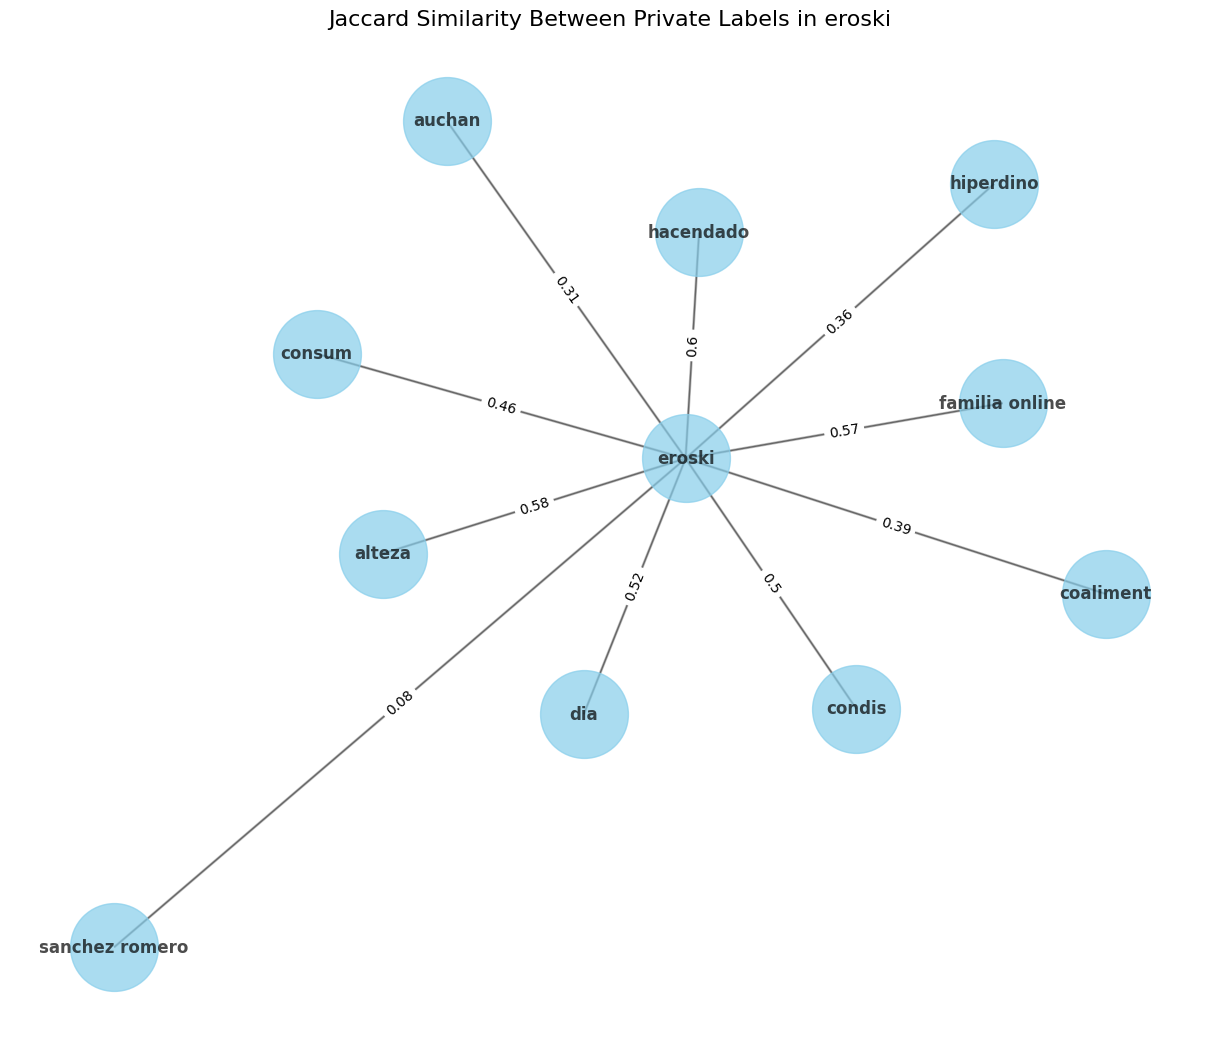

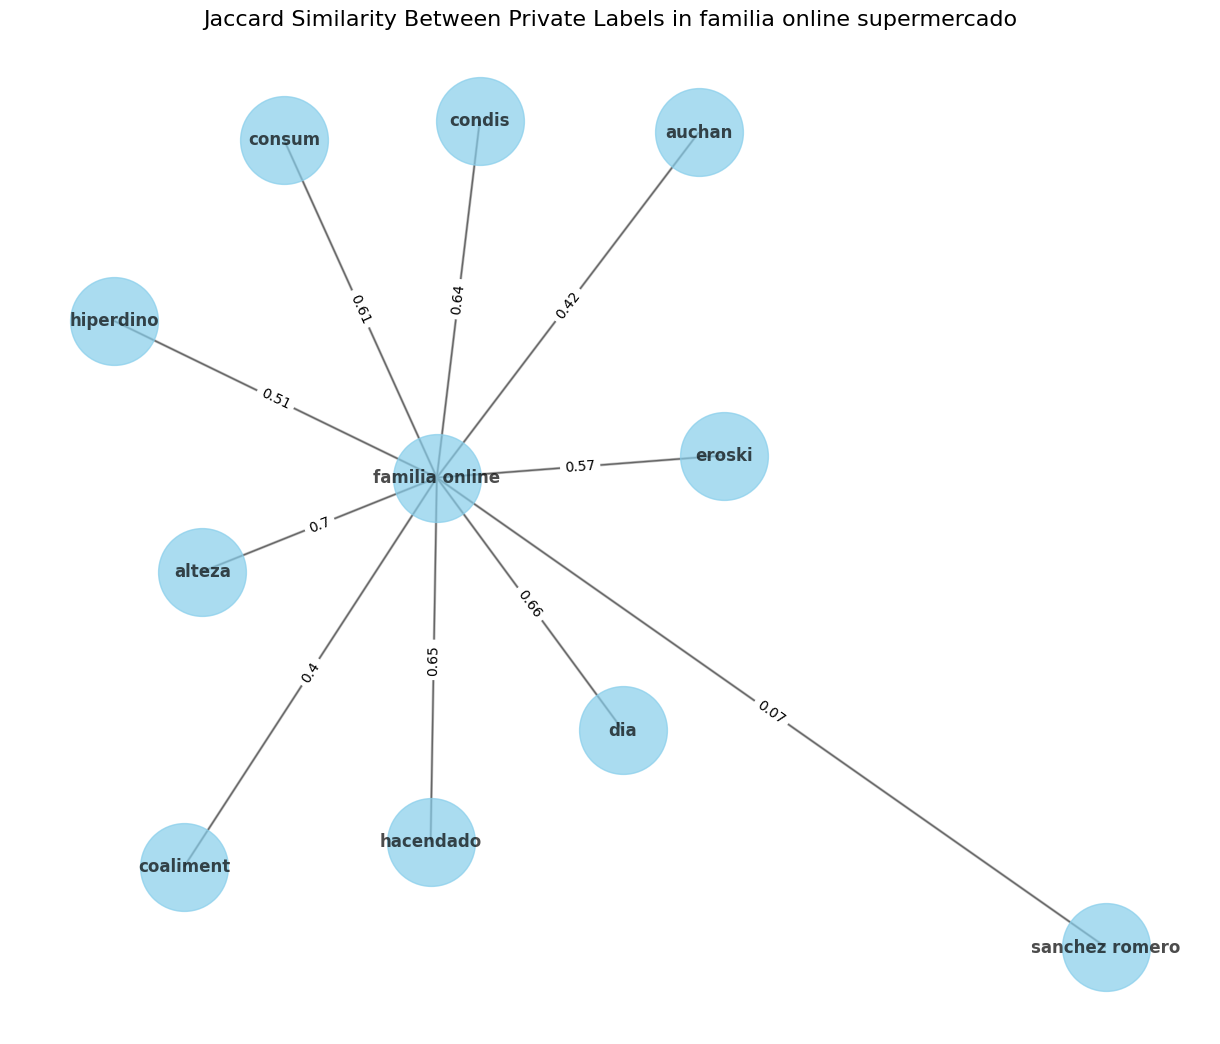

In [ ]:
# For each supermarket, filter private label brands and create a graph
for super, brands in private_brands.items():
    # Filter the Jaccard similarities only for the private label brands of this supermarket
    filtered_similarities = {key: value for key, value in jaccard_similarities.items() if key[0] in brands or key[1] in brands}

    if filtered_similarities:
        # Create a graph of Jaccard similarities for this supermarket
        G = nx.Graph()

        # Add nodes and edges with the Jaccard similarity values
        for (brand1, brand2), similarity in filtered_similarities.items():
            G.add_edge(brand1, brand2, weight=similarity)

        # Draw the network graph
        plt.figure(figsize=(12, 10))

        # Best layout to avoid overlapping
        pos = nx.spring_layout(G, k=0.5, iterations=50)  # Adjust k value to improve layout

        # Draw nodes with more vivid colors and an appropriate size
        nx.draw(G, pos, with_labels=True, node_size=4000, node_color='skyblue', font_size=12, font_weight='bold', alpha=0.7)

        # Draw edges with a light color
        nx.draw_networkx_edges(G, pos, edge_color='gray', width=2, alpha=0.5)

        # Add Jaccard values as edge labels
        edge_labels = nx.get_edge_attributes(G, 'weight')
        nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10, font_color='black')

        # Title
        plt.title(f'Jaccard Similarity Between Private Labels in {super}', fontsize=16)

        # Adjust layout
        plt.tight_layout()

        # Show the graph
        plt.show()

## 4th graph: brand communities


Based on the number of occurrences a brand has per supermarket, we intend to use that information to create communities. By analyzing how often brands appear together in the same supermarkets, we can identify clusters of brands that share similar distribution patterns or market presence.

This approach will allow uncover natural groupings and relationships between brands.

In [ ]:
supers = pd.read_csv("supers_con_cluster.csv", sep = ";")
supers['brand'] = supers['brand'].str.lower().str.strip() # to avoid missing out brands

We can group the products by brand and supermarket to get some initial insight of the most recurrent brands among different supermarkets.

In [ ]:
# Group products by supermarket and brand, and count how many products each brand has per supermarket
brand_supermarket_group = supers.groupby(['Super', 'brand']).size().reset_index(name='count')

# Count how many supermarkets each brand is present in
brand_supermarket_count = brand_supermarket_group.groupby('brand')['Super'].nunique().reset_index(name='supermarkets_count')

# Sort by the number of supermarkets to identify the most central (most connected) brands
brand_supermarket_count_sorted = brand_supermarket_count.sort_values(by='supermarkets_count', ascending=False)

In [ ]:
top_central_brands = brand_supermarket_count_sorted.head(10)
top_central_brands

brand  supermarkets_count
3931      royal                  11
121        albo                  10
3269    nesquik                  10
738   carbonell                  10
3761     puleva                  10
3417       oreo                  10
183       alpro                  10
3066      milka                  10
493       bimbo                  10
3424    orlando                  10

We will use this table for the communities creation, which stores the number of occurences a brand has per supermarket

In [ ]:
brand_supermarket_group

Super          brand  count
0         CondisLine           1545      1
1         CondisLine  4 arreplegats      1
2         CondisLine            7up      1
3         CondisLine        absolut      1
4         CondisLine        activia     13
...              ...            ...    ...
7577  sanchez romero           zoco      1
7578  sanchez romero        zubelzu      1
7579  sanchez romero          zubia      1
7580  sanchez romero          ózeki      1
7581  sanchez romero         únicla      5

[7582 rows x 3 columns]


To construct the graph, we represent the relationship between supermarkets and brands using a bipartite graph structure (two separate groups can be identified: brands and supermarkets). Supermarkets and brands are added as nodes, with each node classified as either a supermarket or a brand. Edges are established between nodes to indicate co-occurrence, where the weight of each edge corresponds to the frequency of a brand appearing in a given supermarket.

In [ ]:
# Creation of the bipartite graph
G = nx.Graph()

# Add supermarkets as nodes with bipartite=0
for supermarket in brand_supermarket_group['Super'].unique():
    G.add_node(supermarket, type='supermarket', bipartite=0)

# Add brands as nodes with bipartite=1
for brand in brand_supermarket_group['brand'].unique():
    G.add_node(brand, type='brand', bipartite=1)

# Add edges between supermarkets and brands based on co-occurrence count
for _, row in brand_supermarket_group.iterrows():
    G.add_edge(row['Super'], row['brand'], weight=row['count'])

The Louvain method is applied to the graph to detect communities based on the edge weights, which represent the co-occurrence between supermarkets and brands.

The algorithm partitions the nodes into distinct communities, and these community labels are then added to each node in the graph. Specifically, the code iterates through the brands, grouping them by their respective community labels, and stores these groupings in the brand_communities dictionary.

In [ ]:
# Apply the Louvain method for community detection
partition = community_louvain.best_partition(G, weight='weight')

# Add the community labels to the nodes (supermarkets and brands)
for node in G.nodes():
    G.nodes[node]['community'] = partition[node]

# Extract communities of brands
brand_communities = {}
for brand, community in partition.items():
    if G.nodes[brand]['type'] == 'brand':  # Only consider brands, not supermarkets
        if community not in brand_communities:
            brand_communities[community] = []
        brand_communities[community].append(brand)

# Print the resulting brand communities
for community, brands in brand_communities.items():
    print(f"Community {community}: {brands}")

Community 9: ['consum', 'apis', 'arias', 'bicentury', 'boadas', 'calvo', 'casa di mama', 'cheetos', 'cruzcampo', 'donuts', 'eko', 'el quijote', 'entremont', 'florette', 'grefusa', 'hero', 'juver', 'ligeresa', 'mistercorn', 'nutella', 'puleva', 'rana', 'recondo', 'ristorante', 'ruffles', 'schweppes', 'solo italia', 'ta-tung', 'we natural', 'aquarel', 'beefeater', 'brugal', 'dyc', 'esgir', 'fuze tea', 'j&b', 'la estepeña', 'peñascal', 'serrano', 'seven up', 'voll damm', 'aldelis', 'anela', 'avecrem', 'bo de debo', 'bocadelia', 'boomer', 'casademont', 'consorcio', 'creapan', 'cuetara', 'dacsa', 'el greco', 'goikoa', 'huercasa', 'jolca', 'just spices', 'kimbo', 'kiri', 'krambals', 'la balinesa', 'la cuina', 'leiston', 'lotus', 'lu', 'maple joe', 'mas protein', 'mastrigo', 'nestle', 'oxfam', 'picken', 'potax', 'ram', 'santal', 'tello', 'trevijano', 'werthers', 'azpilicueta', 'cinzano', 'ferrero', 'loading', 'mendez', 'pastor', 'pico', 'vichy', 'yatekomo', 'alsur', 'burgo arias', 'cabo peñas

We can remember form the theory slides that the formula for **modularity (Q)** is [2]:


$$
Q = \frac{1}{2m} \sum_{i,j} \left( A_{ij} - \frac{k_i k_j}{2m} \right) \delta(c_i, c_j)
$$

Where:

- \( m \) is the total number of edges in the network.
- \( A_{ij} \) is the adjacency matrix, where \( A_{ij} = 1 \) if there is an edge between nodes \( i \) and \( j \), and \( 0 \) otherwise.
- \( k_i \) and \( k_j \) are the degrees of nodes \( i \) and \( j \), respectively (the number of edges connected to them).
- \( \delta(c_i, c_j) \) is a function that equals 1 if nodes \( i \) and \( j \) are in the same community (\( c_i = c_j \)) and 0 otherwise.

We can use directly the network library that computes the modularity of the different partitions.

Modularity is a measure used to evaluate the quality of a community division in a network.

It quantifies how well the network is divided into communities by comparing the density of edges within communities to the density of edges between communities.

The modularity value ranges from -1 to 1: a value close to 1 indicates a strong community structure with dense connections within communities and few connections between them, a value of 0 suggests no better division than random, and negative values imply that the community division is worse than random, with more connections between communities than within them. Thus, a higher modularity value signifies a better and more meaningful community structure.


In [ ]:
# Calculate and print the modularity of the partition
modularity = community_louvain.modularity(partition, G, weight='weight')
print(f"Modularity of the partition: {modularity}")

Modularity of the partition: 0.5492318082773399



**A value of 0.55 indicated that the structure of our communities is quite well structured, separated in cohesive groups. Despite this it is not perfectly separated, which make sense as we are working with real data from supermarkets.**

**VISUALIZATION**

The following code visualizes the top 10 brands per community in a network, focusing on the relationships between brands and supermarkets.

The process begins by identifying the top 10 brands in each community becasue we can not visualize all of them, so representative must be chosen. This is done by iterating over the communities, counting the total co-occurrence of each brand with supermarkets, weighted by the strength of the connections (edge weight). The brands with the highest total weights are selected as the top 10 for each community.

In the second step, a subgraph is created for each community, including only the selected top brands and the associated supermarkets they are connected to.

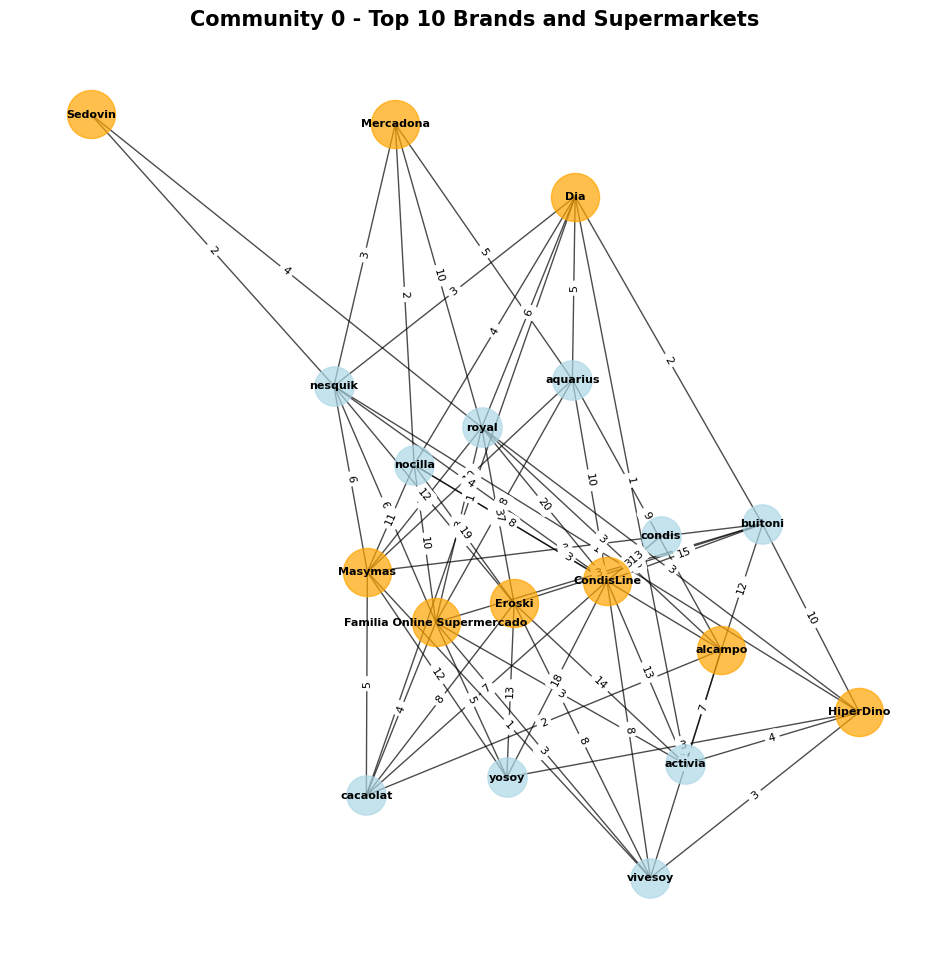

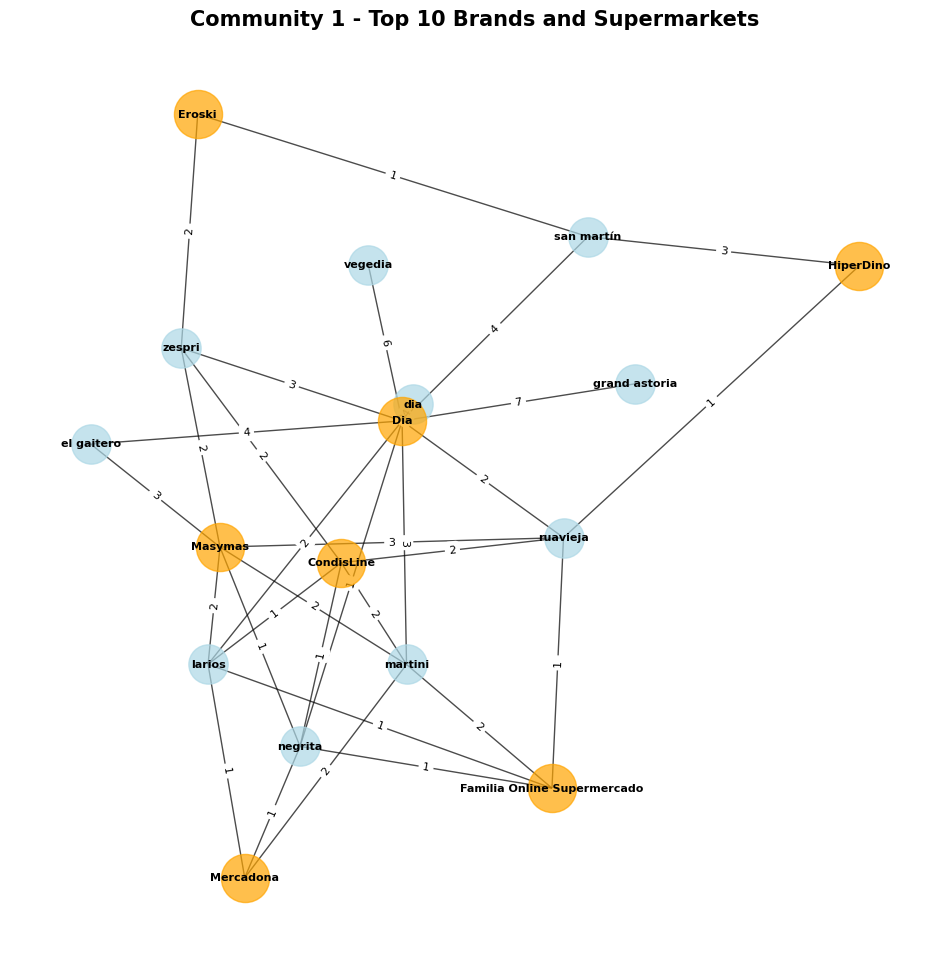

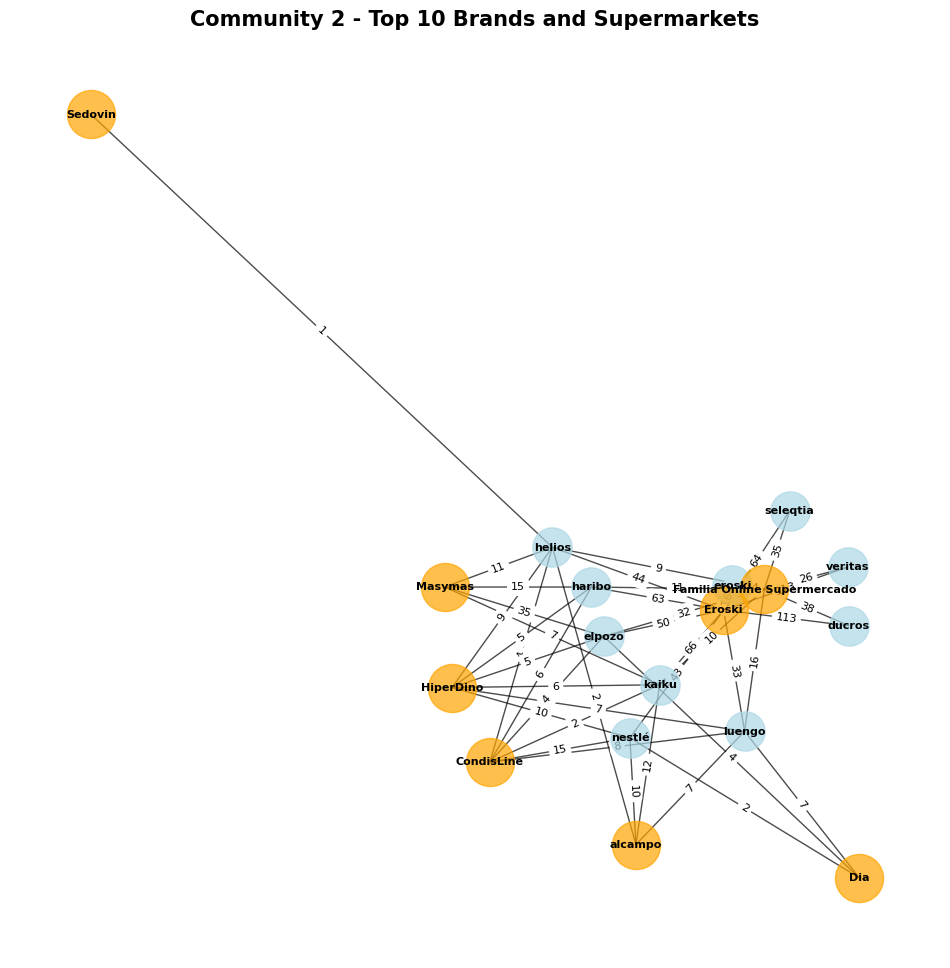

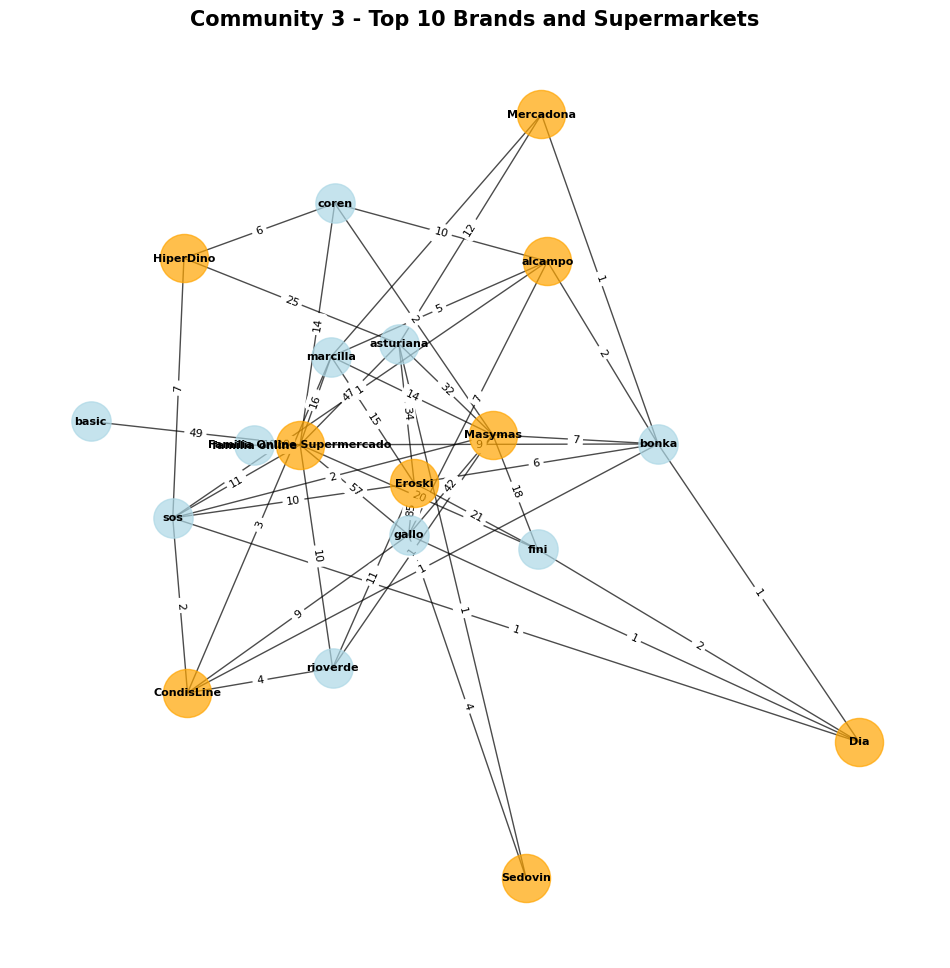

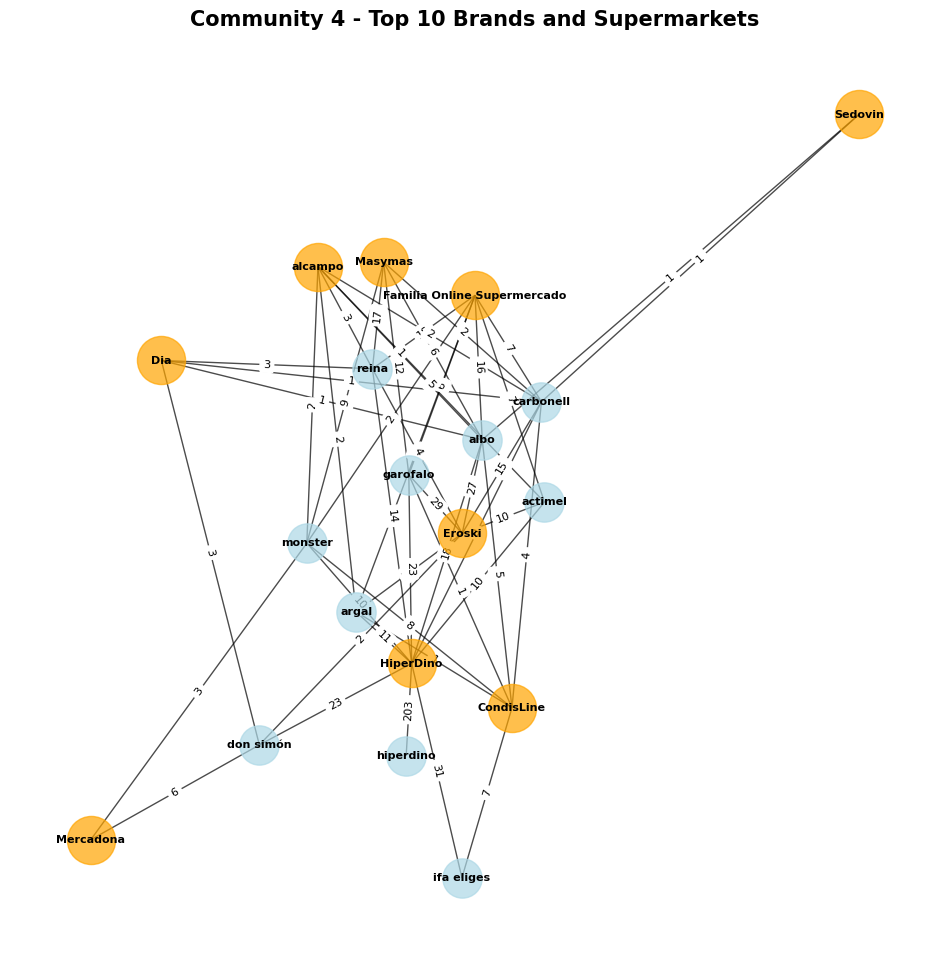

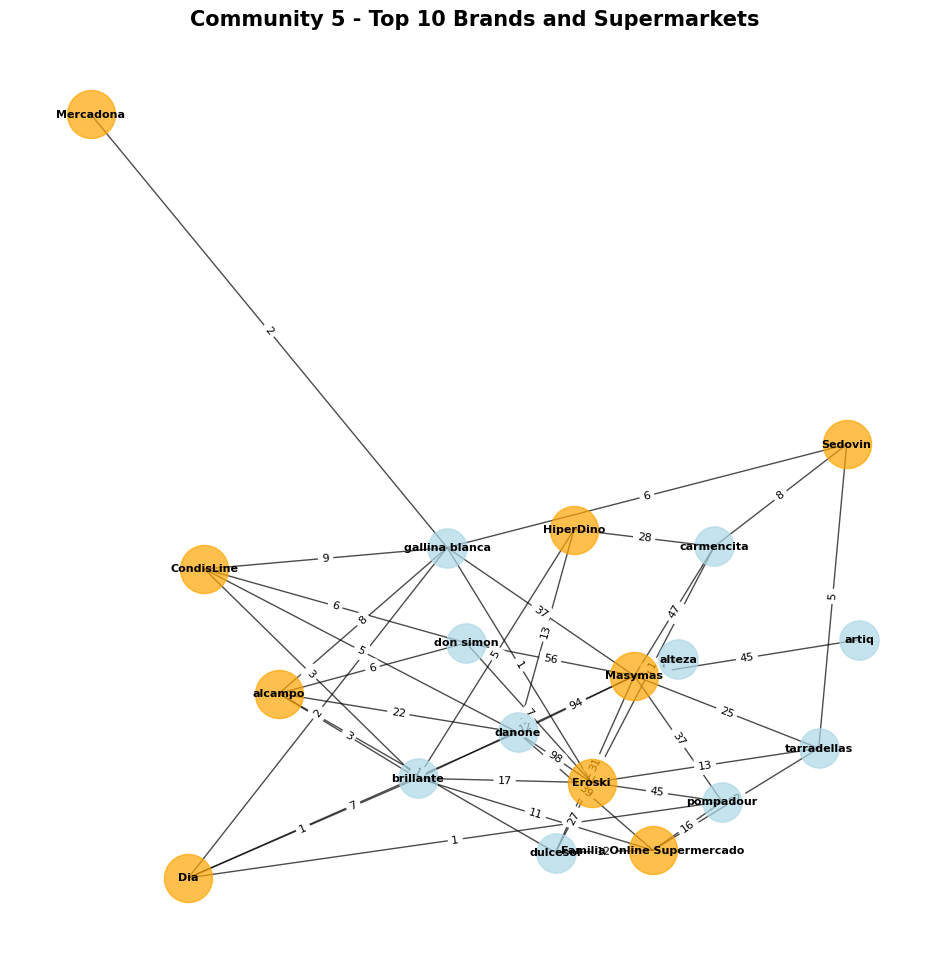

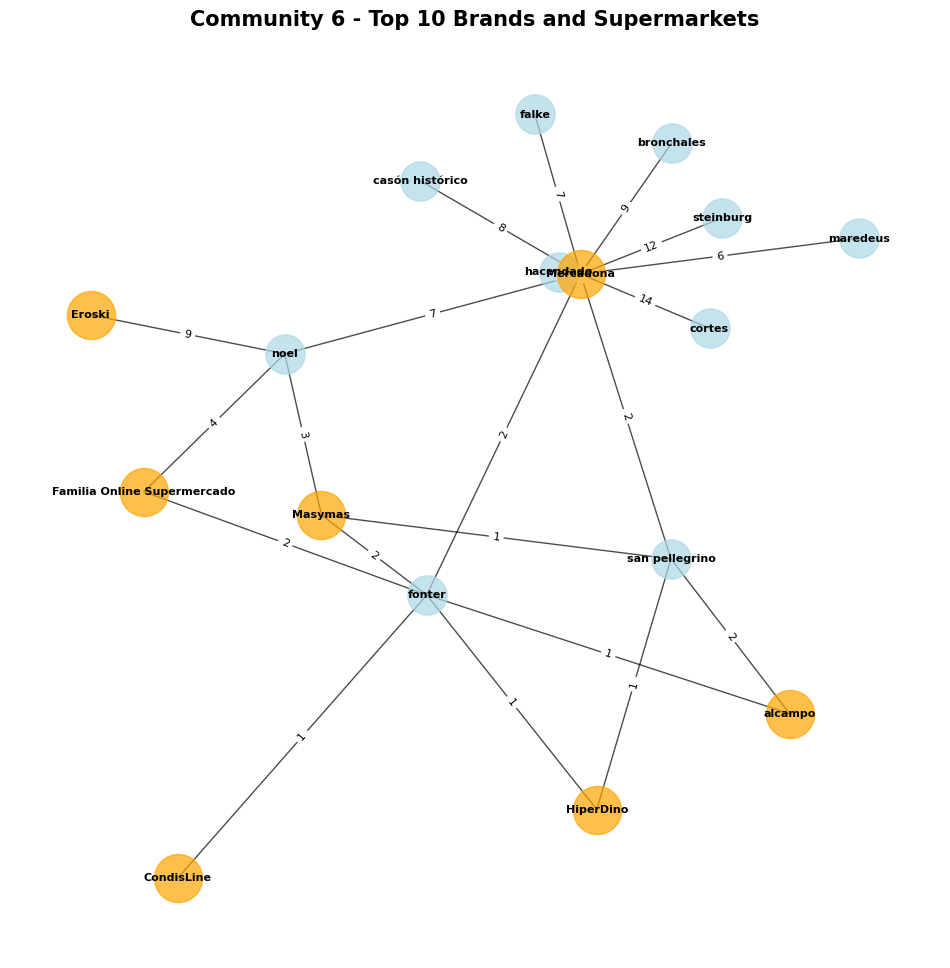

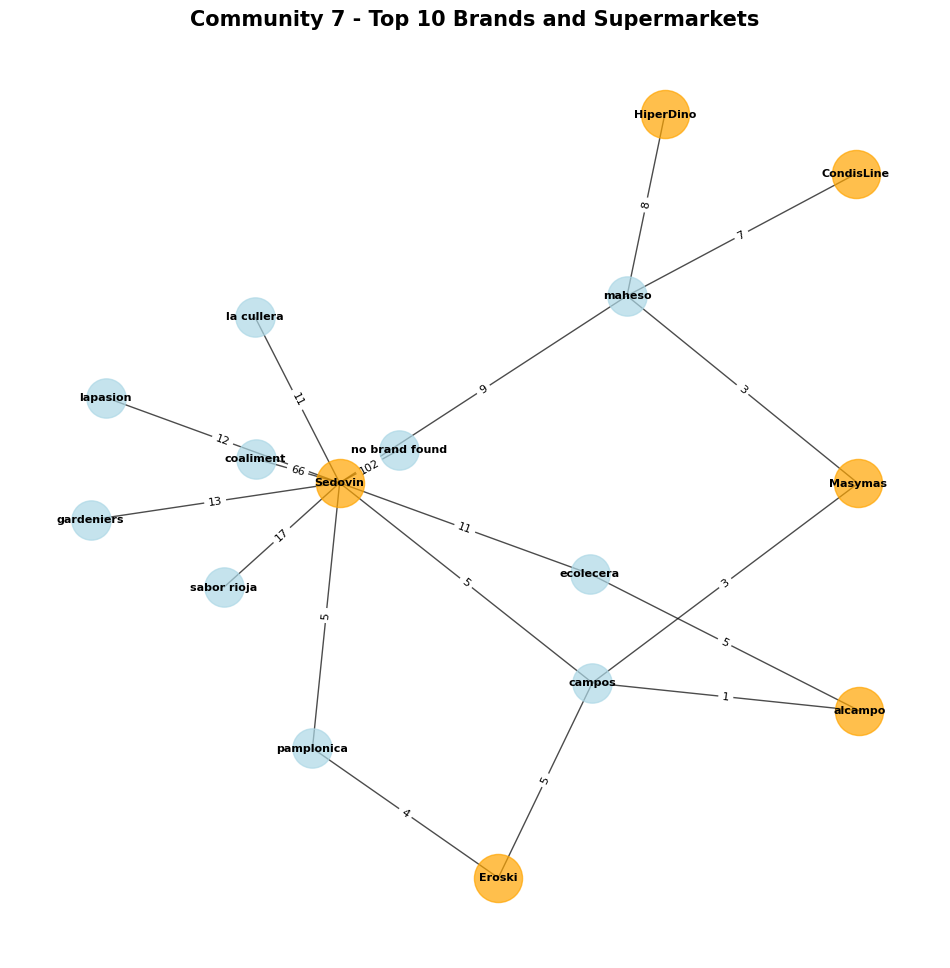

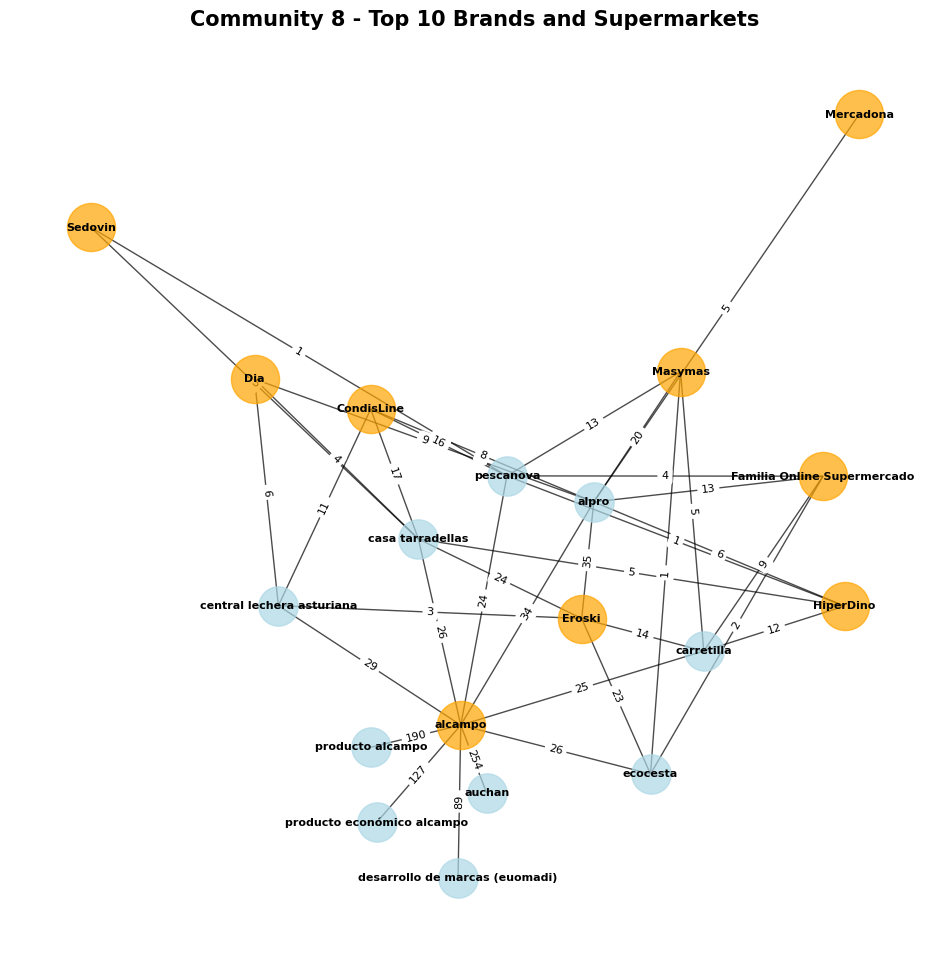

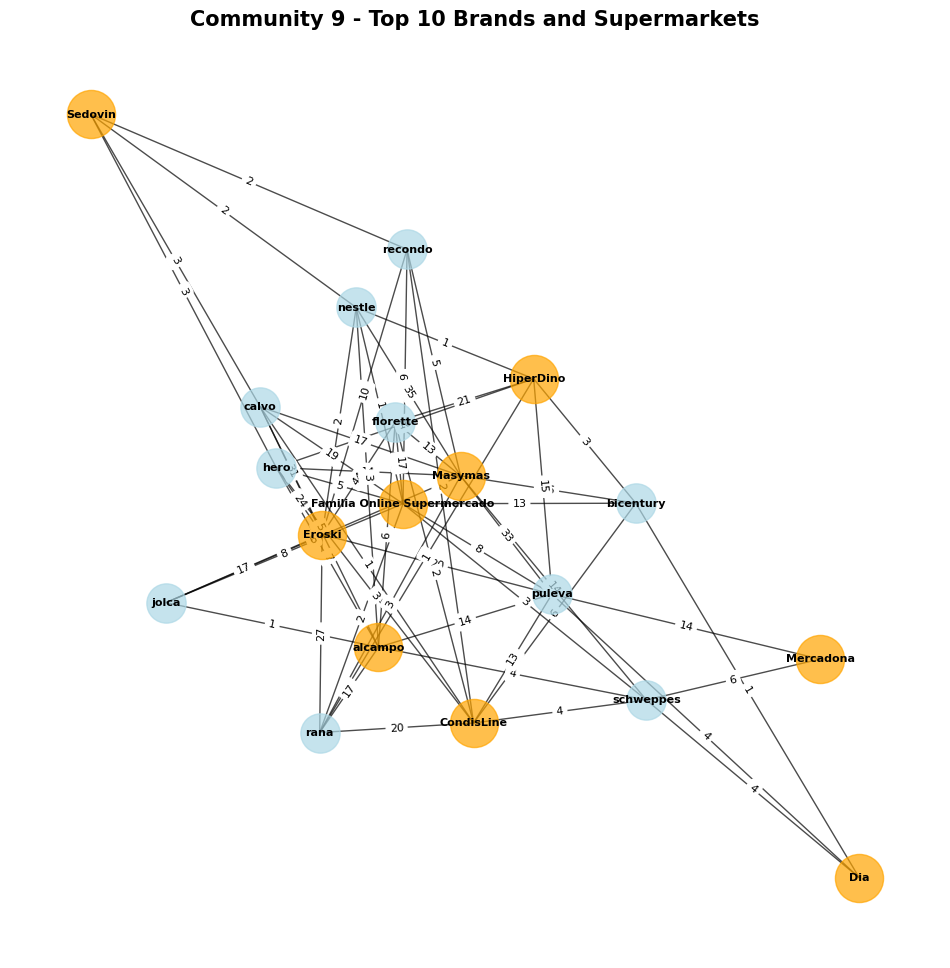

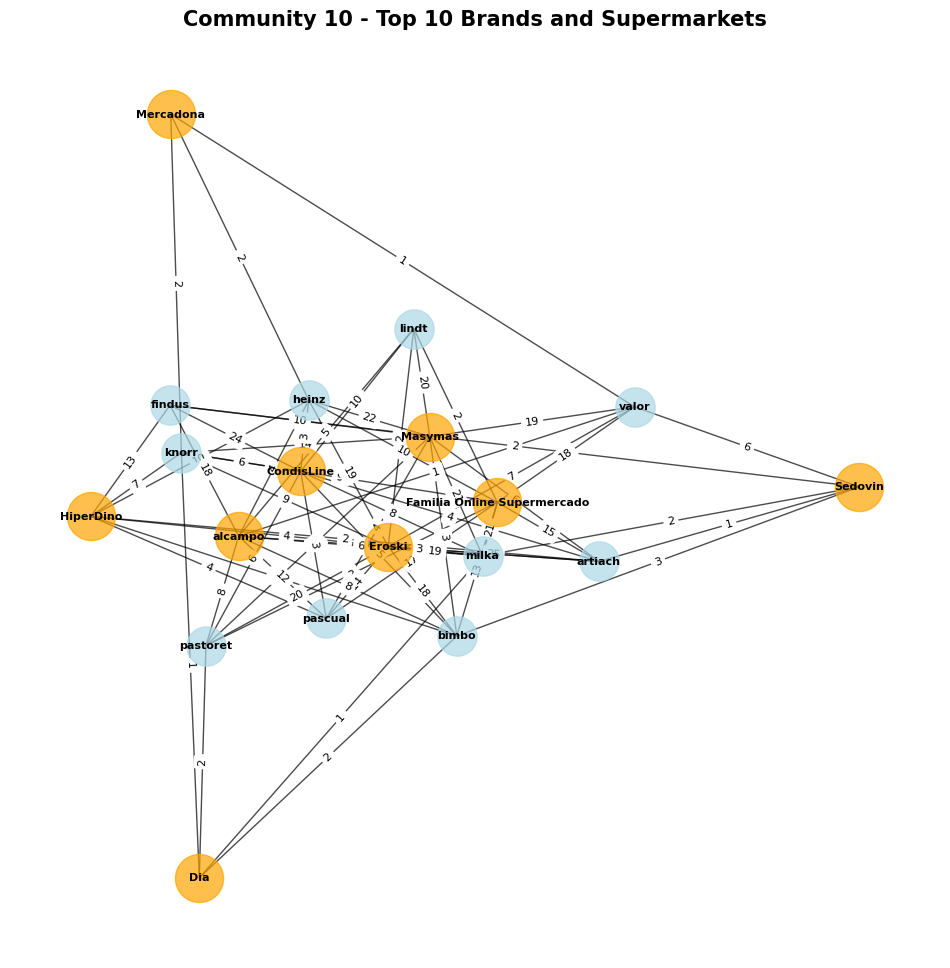

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
from collections import Counter

# Step 1: Identify the top 10 brands per community
top_brands_per_community = {}

# Count the occurrence of each brand per community (based on edge weight)
for community_id in set(partition.values()):
    brands_in_community = [node for node, comm in partition.items() if comm == community_id and G.nodes[node]['type'] == 'brand']

    # Count brands by their total co-occurrence (edge weight)
    brand_counts = Counter()
    for brand in brands_in_community:
        for neighbor in G.neighbors(brand):
            if G.nodes[neighbor]['type'] == 'supermarket':
                brand_counts[brand] += G[brand][neighbor]['weight']

    # Select the top 10 brands based on occurrences
    top_brands_per_community[community_id] = [brand for brand, _ in brand_counts.most_common(10)]

# Step 2: Create a graph per community with a subgraph
for community_id, top_brands in top_brands_per_community.items():
    plt.figure(figsize=(12, 12))  # Larger figure size

    # Create a subgraph that contains only the selected brands and their associated supermarkets
    subgraph_nodes = top_brands.copy()  # Start with the selected brands
    for brand in top_brands:
        for neighbor in G.neighbors(brand):
            if G.nodes[neighbor]['type'] == 'supermarket':
                subgraph_nodes.append(neighbor)  # Add the connected supermarkets

    # Create the subgraph with the selected nodes
    subgraph = G.subgraph(subgraph_nodes)

    # Use spring layout with adjustments for better readability
    pos = nx.spring_layout(subgraph, k=1, iterations=300)  # Increase iterations for better spacing

    # Draw brand and supermarket nodes with different colors and sizes
    brand_nodes = [node for node in subgraph.nodes() if G.nodes[node]['type'] == 'brand']
    supermarket_nodes = [node for node in subgraph.nodes() if G.nodes[node]['type'] == 'supermarket']

    # Colors: Use different color schemes for brands and supermarkets
    nx.draw_networkx_nodes(subgraph, pos, nodelist=brand_nodes, node_size=800, node_color='lightblue', alpha=0.7, label='Brands')
    nx.draw_networkx_nodes(subgraph, pos, nodelist=supermarket_nodes, node_size=1200, node_color='orange', alpha=0.7, label='Supermarkets')

    # Draw edges of the subgraph with black color and equal thickness
    edges = subgraph.edges(data=True)

    # Draw edges with black color and same width
    nx.draw_networkx_edges(subgraph, pos, edgelist=edges, width=1, alpha=0.7, edge_color='black')

    # Labels for brands and supermarkets
    labels = {node: node for node in top_brands}  # Only labels for the brands
    labels.update({node: node for node in supermarket_nodes})  # Add labels for supermarkets as well
    nx.draw_networkx_labels(subgraph, pos, labels=labels, font_size=8, font_weight='bold')  # Smaller and bold font

    # Add weight numbers to each edge
    edge_labels = {(u, v): f"{d['weight']}" for u, v, d in edges}
    nx.draw_networkx_edge_labels(subgraph, pos, edge_labels=edge_labels, font_size=8)

    # Title and display the graph for this community
    plt.title(f"Community {community_id} - Top 10 Brands and Supermarkets", fontsize=15, fontweight='bold')
    plt.axis('off')  # Turn off the axis for clarity
    plt.show()

In [ ]:
# Initialize a dictionary to store statistics for each community
community_stats = {}

# Loop through each community and its associated brands
for community, brands in brand_communities.items():
    # Calculate the total number of brands in the community
    num_brands = len(brands)

    # Initialize a set to store unique supermarkets associated with the brands
    supermarkets_in_community = set()
    for brand in brands:
        # Iterate through neighbors of each brand to identify connected supermarkets
        for neighbor in G.neighbors(brand):
            if G.nodes[neighbor]['type'] == 'supermarket':
                supermarkets_in_community.add(neighbor)

    # Calculate the total number of unique supermarkets in the community
    num_supermarkets = len(supermarkets_in_community)

    # Calculate the frequency of brand appearances in supermarkets
    brand_frequencies = []
    for brand in brands:
        # Count how many supermarkets are connected to each brand
        frequency = sum(1 for neighbor in G.neighbors(brand) if G.nodes[neighbor]['type'] == 'supermarket')
        brand_frequencies.append(frequency)

    # Calculate the average brand frequency across all brands
    avg_brand_frequency = sum(brand_frequencies) / num_brands if num_brands > 0 else 0

    # Store the statistics for the current community
    community_stats[community] = {
        'num_brands': num_brands,
        'num_supermarkets': num_supermarkets,
        'avg_brand_frequency': avg_brand_frequency,
        'brand_frequencies': brand_frequencies,
        # Calculate variance in the brand frequencies if there are multiple brands
        'frequency_variance': (sum((f - avg_brand_frequency) ** 2 for f in brand_frequencies) / num_brands) if num_brands > 1 else 0
    }

# Display the calculated statistics for each community
for community, stats in community_stats.items():
    print(f"Community {community}:")
    print(f"  Total number of brands: {stats['num_brands']}")
    print(f"  Total number of supermarkets: {stats['num_supermarkets']}")
    print(f"  Average brand frequency per supermarket: {stats['avg_brand_frequency']}")
    print(f"  Brand frequency variance: {stats['frequency_variance']}")


Community 9:
  Total number of brands: 646
  Total number of supermarkets: 9
  Average brand frequency per supermarket: 0.6006191950464397
  Brand frequency variance: 1.5401853751114283
Community 10:
  Total number of brands: 870
  Total number of supermarkets: 9
  Average brand frequency per supermarket: 0.47701149425287354
  Brand frequency variance: 1.4425749768793918
Community 0:
  Total number of brands: 151
  Total number of supermarkets: 9
  Average brand frequency per supermarket: 1.8476821192052981
  Brand frequency variance: 2.552958203587557
Community 5:
  Total number of brands: 631
  Total number of supermarkets: 9
  Average brand frequency per supermarket: 1.3375594294770206
  Brand frequency variance: 0.9874799390196461
Community 2:
  Total number of brands: 826
  Total number of supermarkets: 9
  Average brand frequency per supermarket: 1.4225181598062955
  Brand frequency variance: 1.033342811413552
Community 4:
  Total number of brands: 335
  Total number of supermark

Furthermore, the centrality of the brands when it comes to joining supermarkets can be calculated.

The degree centrality of a node in a network is defined as [3]:

$$
C_D(v) = \frac{\text{deg}(v)}{n - 1}
$$

Where:
- \(C_D(v)\) is the degree centrality of node \(v\).
- \(\text{deg}(v)\) is the degree of node \(v\), which is the number of edges incident to node \(v\).
- \(n\) is the total number of nodes in the graph.

For a **brand** node, the formula is:

$$
C_D(\text{Brand}) = \frac{\text{Number of Supermarkets connected to the Brand}}{\text{Total number of Supermarkets} - 1}
$$

This formula normalizes the degree of the node (the number of supermarkets a brand is connected to) by dividing it by the maximum possible number of connections, which is the total number of nodes in the opposite set (supermarkets) minus one.


We will make the same graph as aefore, but making sure we are differentating labels and supermarkets. For that, we will add a prefix to each category with its corresponding label (Brand_ or Super_).

In [ ]:
import pandas as pd
import networkx as nx

# Group by supermarket and brand, calculate weights
brand_supermarket_group = supers.groupby(['Super', 'brand']).size().reset_index(name='weight')

# Initialize a graph
B = nx.Graph()

# Add supermarket nodes with a "Super_" prefix
B.add_nodes_from(['Super_' + sup for sup in supers['Super'].unique()], bipartite=0)

# Add brand nodes with a "Brand_" prefix
B.add_nodes_from(['Brand_' + brand for brand in supers['brand'].unique()], bipartite=1)

# Add weighted edges between supermarkets and brands
edges = [
    ('Super_' + row.Super, 'Brand_' + row.brand, row.weight)
    for row in brand_supermarket_group.itertuples(index=False)
]
B.add_weighted_edges_from(edges)

# Calculate degree centrality for brand nodes (consider only supermarkets)
brand_centrality = []

# For each brand, calculate degree centrality
for brand_node in [node for node in B.nodes if node.startswith('Brand_')]:
    # Get all supermarkets connected to this brand
    connected_supermarkets = list(B.neighbors(brand_node))

    # Degree centrality is the number of distinct supermarkets connected to the brand
    # divided by the total number of supermarkets
    degree_centrality = len(connected_supermarkets) / len([node for node in B.nodes if node.startswith('Super_')])

    # Add to the list
    brand_centrality.append({
        'brand': brand_node.replace('Brand_', ''),
        'degree_centrality': degree_centrality
    })

# Create DataFrame for centrality of brands
brand_centrality_df = pd.DataFrame(brand_centrality).sort_values(by='degree_centrality', ascending=False)

# Print brand centrality sorted by degree centrality
print(brand_centrality_df)

                            brand  degree_centrality
58                          royal           1.000000
235                       orlando           0.909091
499                         bimbo           0.909091
262                         milka           0.909091
229                          albo           0.909091
...                           ...                ...
2181  osborne pedro ximenez jerez           0.090909
2182                reccua oporto           0.090909
2184          gran tehyda orotava           0.090909
2185                care cariñena           0.090909
4797                       olivas           0.090909

[4798 rows x 2 columns]


We can make some plottings to see if the results make sense.

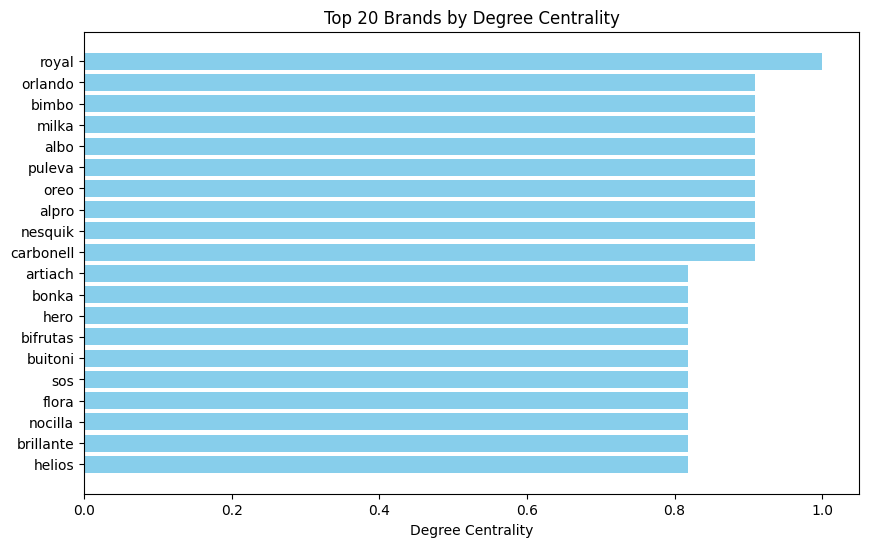

In [ ]:
# Sort by degree centrality and select top 20 brands
top_brands = brand_centrality_df.head(20)

# Plot the top 20 brands by degree centrality
plt.figure(figsize=(10, 6))
plt.barh(top_brands['brand'], top_brands['degree_centrality'], color='skyblue')
plt.xlabel('Degree Centrality')
plt.title('Top 20 Brands by Degree Centrality')
plt.gca().invert_yaxis()  # Invert the y-axis to have the top brand at the top
plt.show()

In [ ]:
# Define the dictionary of private brands
private_brands = {
    'mercadona': ['hacendado'],
    'masymas': ['alteza'],
    'condisline': ['condis'],
    'alcampo': ['auchan'],
    'dia': ['dia'],
    'hiperdino': ['hiperdino'],
    'sedovin': ['coaliment'],
    'sanchez romero': ['sanchez romero'],
    'consum': ['consum'],
    'eroski': ['eroski'],
    'familia online supermercado': ['familia online']
}

# Flatten the private brands dictionary into a list of private brand names
private_brands_list = [brand for brands in private_brands.values() for brand in brands]

# Convert it to a DataFrame
brand_centrality = pd.DataFrame(brand_centrality)

# Sort the entire brand centrality DataFrame by degree_centrality
brand_centrality_sorted = brand_centrality.sort_values(by='degree_centrality', ascending=False)

# Add a global rank column to the brand centrality DataFrame
brand_centrality_sorted['global_rank'] = range(1, len(brand_centrality_sorted) + 1)

# Filter for private brands only
private_brands_centrality_sorted = brand_centrality_sorted[brand_centrality_sorted['brand'].isin(private_brands_list)]

# Print the private brands with their global rank and degree centrality
print(private_brands_centrality_sorted[['brand', 'degree_centrality', 'global_rank']])

               brand  degree_centrality  global_rank
3706          eroski           0.181818          718
0          hacendado           0.090909         1220
3241          consum           0.090909         1809
4394  familia online           0.090909         2108
1288          condis           0.090909         2959
1465          auchan           0.090909         2999
252           alteza           0.090909         3432
2495  sanchez romero           0.090909         4061
1986       hiperdino           0.090909         4349
1880             dia           0.090909         4557
2302       coaliment           0.090909         4661


This results make sense: private labels are unique per supermarket and that's why they have less rank. Also, FAmilia Online belongs to Eroski company, and that's why eroski brands is quite higher compared to the rest.

In [ ]:
supers[supers["brand"]=="eroski"]["Super"].value_counts()

Super
Eroski                         1168
Familia Online Supermercado     834
Name: count, dtype: int64

We can also extract the most and least central brands:

In [ ]:
# Filter out private brands from the sorted centrality DataFrame
non_private_brands_centrality_sorted = brand_centrality_sorted[~brand_centrality_sorted['brand'].isin(private_brands_list)]

# Get the first (most central) and last (least central) non-private brands
first_non_private_brand = non_private_brands_centrality_sorted.iloc[0]
last_non_private_brand = non_private_brands_centrality_sorted.iloc[-1]

# Print the first and last non-private brands
print("First non-private brand (most central):")
print(first_non_private_brand[['brand', 'degree_centrality', 'global_rank']])

print("\nLast non-private brand (least central):")
print(last_non_private_brand[['brand', 'degree_centrality', 'global_rank']])

First non-private brand (most central):
brand                royal
degree_centrality      1.0
global_rank              1
Name: 58, dtype: object

Last non-private brand (least central):
brand                  olivas
degree_centrality    0.090909
global_rank              4798
Name: 4797, dtype: object


# Gradio DashBoard

In order for the dashboard to work, we must have run the recommender system code cells, which contain essential functions related to data cleaning in the recommender system.

Furthermore, we must upload the csv which contains the products information.

In [ ]:
%%capture
pip install gradio

In [ ]:
import gradio as gr
import pandas as pd
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

df = pd.read_csv("supers_con_cluster.csv", sep = ";")

In [ ]:
# Define min and max price for sliders
min_price = df["price"].min()
max_price = df["price"].max()

def search_results(query, brand, min_price, max_price, nutri_score, supermarket, gluten_free, lactose_free, vegan, vegetarian, page):
    """Generate paginated search results based on filters."""
    results = df[df["name"].str.contains(query, case=False, na=False)]
    if brand:
        results = results[results["brand"].str.lower().str.contains(brand.lower(), na=False)]
    results = results[(results["price"] >= min_price) & (results["price"] <= max_price)]
    if nutri_score != "All":
        results = results[results["nutri-score"] == nutri_score]
    if supermarket != "All":
        results = results[results["Super"] == supermarket]
    if gluten_free:
        results = results[results["labels"].str.contains("Sin gluten", na=False)]
    if lactose_free:
        results = results[~results["categories"].str.contains("Lácteos", na=False) | results["labels"].str.contains("Sin lactosa", na=False)]
    if vegan:
        results = results[results["labels"].str.contains("Vegano", na=False)]
    if vegetarian:
        results = results[results["labels"].str.contains("Vegetariano", na=False)]

    # Pagination logic: 7 results per page
    start = (page - 1) * 7
    end = start + 7
    page_results = results.iloc[start:end]

    # Generate HTML for results
    html = "<div style='display: flex; flex-direction: column; color: black;'>"
    for _, row in page_results.iterrows():
        html += f"""
        <div class="product-card" style='padding:10px; border:1px solid #ccc; margin:5px; background-color: #f9f9f9; color: black;'>
            <span style='color: black; font-weight: bold;'>{row['name']}</span><br>
            <span style='color: black; font-weight: normal;'>{row['brand']} - {row['price']}€</span><br>
            <span style='color: black;'>Nutri-Score: {row['nutri-score']}, Supermarket: {row['Super']}</span>
        </div>
        """
    html += "</div>"

    # Show navigation buttons only if there are more than 10 results
    show_buttons = len(results) > 7

    return html, show_buttons

def generate_graphs(query, brand, min_price, max_price, nutri_score, supermarket, gluten_free, lactose_free, vegan, vegetarian):
    """Generate graphs based on filtered results."""
    results = df[df["name"].str.contains(query, case=False, na=False)]
    if brand:
        results = results[results["brand"].str.lower().str.contains(brand.lower(), na=False)]
    results = results[(results["price"] >= min_price) & (results["price"] <= max_price)]
    if nutri_score != "All":
        results = results[results["nutri-score"] == nutri_score]
    if supermarket != "All":
        results = results[results["Super"] == supermarket]
    if gluten_free:
        results = results[results["labels"].str.contains("Sin gluten", na=False)]
    if lactose_free:
        results = results[~results["categories"].str.contains("Lácteos", na=False) | results["labels"].str.contains("Sin lactosa", na=False)]
    if vegan:
        results = results[results["labels"].str.contains("Vegano", na=False)]
    if vegetarian:
        results = results[results["labels"].str.contains("Vegetariano", na=False)]

    if not results.empty:
        # Nutri-Score Bar Plot
        nutri_score_counts = results['nutri-score'].value_counts().reset_index()
        nutri_score_counts.columns = ['nutri-score', 'count']
        nutri_score_fig = px.bar(nutri_score_counts, x='nutri-score', y='count', title="Frequency of Nutri-Score Values",
                                 labels={"nutri-score": "Nutri-Score", "count": "Frequency"})

        # Price Distribution Histogram
        price_hist = px.histogram(results, x="price", nbins=20, title="Price Distribution of Products", labels={"price": "Price (€)"})

        # Scatter Plot: Price vs Weight, Colored by Nutri-Score
        scatter_plot = px.scatter(results, x="price", y="weight", color="nutri-score",
                                  title="Price vs Weight (Colored by Nutri-Score)",
                                  labels={"price": "Price (€)", "weight": "Weight (kg)"})
    else:
        nutri_score_fig = None
        price_hist = None
        scatter_plot = None

    return nutri_score_fig, price_hist, scatter_plot


def recommend_products_html(product_name, top_n=9):
    """Generate HTML for recommended products."""
    recommended_products = recommend_products(product_name, top_n=top_n)

    html = "<table style='width:100%; border-collapse: collapse;'>"
    html += "<tr><th>Name</th><th>Brand</th><th>Price</th><th>Supermarket</th></tr>"

    for _, row in recommended_products.iterrows():
        html += f"<tr>"
        html += f"<td>{row['name']}</td>"
        html += f"<td>{row['brand']}</td>"
        html += f"<td>{row['price']:.2f} €</td>"
        html += f"<td>{row['Super']}</td>"
        html += f"</tr>"

    html += "</table>"

    return html


def generate_recommendation_graph(product_name, top_n=9):
    """Generate a Nutri-Score distribution graph for recommended products."""

    recommended_products = recommend_products(product_name, top_n=top_n)
    print(recommended_products)

    if not recommended_products.empty:
        # Filtrar los productos recomendados para obtener los Nutri-Scores basándose en name, brand y super
        recommended_names = recommended_products["name"]
        recommended_brands = recommended_products["brand"]
        recommended_supers = recommended_products["Super"]

        # Filtrar el DataFrame principal para que coincidan name, brand y super
        filtered_df = df[
            (df["name"].isin(recommended_names)) &
            (df["brand"].isin(recommended_brands)) &
            (df["Super"].isin(recommended_supers))
        ]

        # Eliminar duplicados para asegurarse de que hay un único Nutri-Score por producto recomendado
        filtered_df = filtered_df.drop_duplicates(subset=["name", "brand", "Super"])

        # Extraer los Nutri-Scores y manejar valores NaN
        nutri_scores = filtered_df["nutri-score"].head(top_n).fillna("Not Provided")
        print("nutri_scores", nutri_scores)

        if not nutri_scores.empty:
            # Generate a pie chart for Nutri-Score distribution
            nutri_score_counts = nutri_scores.value_counts().reset_index()
            nutri_score_counts.columns = ["nutri-score", "count"]

            # Customize colors for Nutri-Score categories
            color_discrete_map = {
                "A": "#4CAF50",  # Green
                "B": "#8BC34A",  # Light Green
                "C": "#FFEB3B",  # Yellow
                "D": "#FF9800",  # Orange
                "E": "#F44336",  # Red
                "Not Provided": "#9E9E9E",  # Grey
            }

            # Create the pie chart
            nutri_score_fig = px.pie(
                nutri_score_counts,
                values="count",
                names="nutri-score",
                title=f"Nutri-Score Distribution for Recommended Products: {product_name}",
                labels={"nutri-score": "Nutri-Score", "count": "Count"},
                color="nutri-score",
                color_discrete_map=color_discrete_map
            )

            # Customize the layout for better appearance
            nutri_score_fig.update_traces(
                textinfo="percent+label",  # Show percentage and label on slices
                pull=[0.1 if ns == "Not Provided" else 0 for ns in nutri_score_counts["nutri-score"]],  # Highlight "Not Provided"
                hoverinfo="label+percent+value"  # Detailed hover information
            )

            nutri_score_fig.update_layout(
                title={
                    "text": f"Nutri-Score Distribution for {product_name}",
                    "x": 0.5,  # Center the title
                    "xanchor": "center",
                    "font": {"size": 20},
                },
                legend_title="Nutri-Score",
                legend=dict(
                    orientation="h",  # Horizontal legend
                    x=0.5,
                    xanchor="center",
                    y=-0.1
                )
            )
        else:
            nutri_score_fig = None
    else:
        nutri_score_fig = None

    return nutri_score_fig

def plot_cluster_distribution(selected_cluster):
    """Plot the distribution of products within a selected cluster."""
    if selected_cluster == "All":
        fig = px.scatter(
            df, x="price", y="price_weight", color="cluster",
            title="Price vs Price/Weight by Cluster",
            color_discrete_sequence=["gray"]  # All points in gray
        )
    else:
        try:
            # Convert the selected cluster to an integer
            cluster_value = int(float(selected_cluster))

            # Filter the data based on the selected cluster
            selected_df = df[df["cluster"] == cluster_value]
            other_df = df[df["cluster"] != cluster_value]

            # Create the figure
            fig = go.Figure()

            # Add points from other clusters (in gray)
            fig.add_trace(
                go.Scatter(
                    x=other_df["price"],
                    y=other_df["price_weight"],
                    mode="markers",
                    marker=dict(color="gray"),
                    name="Other Clusters"
                )
            )

            # Add points from the selected cluster (in orange)
            fig.add_trace(
                go.Scatter(
                    x=selected_df["price"],
                    y=selected_df["price_weight"],
                    mode="markers",
                    marker=dict(color="orange"),
                    name=f"Cluster {cluster_value}"
                )
            )

            # Set title and axis labels
            fig.update_layout(
                title="Price vs Price/Weight by Cluster",
                xaxis_title="Price",
                yaxis_title="Price/Weight",
                showlegend=True
            )
        except ValueError:
            return px.scatter(title="Invalid cluster selected")

    return fig

def plot_cluster_analysis(selected_cluster, analysis_type):
    """Plot the analysis based on the selected cluster and analysis type."""

    unique_clusters = df["cluster"].unique()

    # Initialize subplot grid
    rows = len(unique_clusters)
    fig = make_subplots(
        rows=rows, cols=1,
        subplot_titles=[f"Cluster {cluster}" for cluster in unique_clusters]
    )

    # Generate one plot per cluster
    for i, cluster in enumerate(unique_clusters, start=1):
        cluster_df = df[df["cluster"] == cluster]

        if analysis_type == "Price vs Price/Weight":
            trace = go.Scatter(
                x=cluster_df["price"],
                y=cluster_df["price_weight"],
                mode="markers",
                name=f"Cluster {cluster}"
            )
        elif analysis_type == "Nutri-Score vs Price":
            trace = go.Box(
                x=cluster_df["nutri-score"],
                y=cluster_df["price"],
                name=f"Cluster {cluster}"
            )
        elif analysis_type == "Nutri-Score vs Price/Weight":
            trace = go.Box(
                x=cluster_df["nutri-score"],
                y=cluster_df["price_weight"],
                name=f"Cluster {cluster}"
            )
        fig.add_trace(trace, row=i, col=1)

    # Update layout
    fig.update_layout(
        height=300 * rows,  # Adjust height based on the number of clusters
        title_text="Analysis by Cluster",
        showlegend=False  # Disable legend for better clarity
    )

    return fig


#GRAPH 1
def generate_supermarket_communities():
    """Generates graph based on communities of basic product pricing: 1st Graph"""
    G = nx.Graph()

    for super_name in pivot.index:
        G.add_node(super_name)

    threshold = 0.92
    for i, super1 in enumerate(pivot_filled.index):
        for j, super2 in enumerate(pivot_filled.index):
            if i < j:
                similarity = similarity_matrix[i, j]
                if similarity >= threshold:
                    G.add_edge(super1, super2, weight=similarity)

    partition = community_louvain.best_partition(G)

    plt.figure(figsize=(10, 8))
    pos = nx.spring_layout(G, seed=42)
    colors = [partition[node] for node in G.nodes()]
    nx.draw(G, pos, with_labels=True, node_color=colors, cmap=plt.cm.rainbow, node_size=1000, font_size=10, font_weight='bold')

    plt.title("Comunnities of Supermarkets based on average price")
    plt.tight_layout()
    plt.savefig("supermarket_communities.png")
    plt.close()

    return "supermarket_communities.png"


#GRAPH2
def generate_shared_categories_graph(selected_supermarket):
    """
    Generate a graph showing the number of categories shared between the selected supermarket
    and other supermarkets based on pre-computed connections.
    """
    # Create a subgraph for the selected supermarket
    subgraph = nx.Graph()

    # Filter connections for the selected supermarket
    for (super1, super2), weight in super_connections.items():
        if selected_supermarket in (super1, super2):
            neighbor = super2 if super1 == selected_supermarket else super1
            subgraph.add_node(selected_supermarket, tipo='supermarket')
            subgraph.add_node(neighbor, tipo='supermarket')
            subgraph.add_edge(selected_supermarket, neighbor, weight=weight)

    # Define layout and visualization properties
    pos = nx.spring_layout(subgraph)
    node_sizes = [1200 for _ in subgraph.nodes]
    node_colors = ['lightgreen' if node == selected_supermarket else 'lightblue' for node in subgraph.nodes]

    # Create the plot
    plt.figure(figsize=(8, 8))
    nx.draw(
        subgraph, pos, with_labels=True, node_color=node_colors,
        edge_color='gray', font_size=10, node_size=node_sizes,
        font_weight='bold', width=0.5
    )

    # Add edge labels for shared categories
    edge_labels = nx.get_edge_attributes(subgraph, 'weight')
    nx.draw_networkx_edge_labels(
        subgraph, pos, edge_labels=edge_labels, font_size=10, font_color='blue'
    )

    # Set the title and remove axis
    plt.title(f"Number of Shared Categories for {selected_supermarket}", fontsize=14)
    plt.axis('off')
    return plt.gcf()




#GRAPH 3
def generate_jaccard_graph(selected_supermarket):
    """Generate a graph showing the Jaccard similarity between private labels in the selected supermarket."""
    brands = private_brands[selected_supermarket]
    filtered_similarities = {key: value for key, value in jaccard_similarities.items() if key[0] in brands or key[1] in brands}

    if filtered_similarities:
        G = nx.Graph()
        for (brand1, brand2), similarity in filtered_similarities.items():
            G.add_edge(brand1, brand2, weight=similarity)

        plt.figure(figsize=(12, 10))
        pos = nx.spring_layout(G, k=0.5, iterations=50)
        nx.draw(G, pos, with_labels=True, node_size=4000, node_color='skyblue', font_size=12, font_weight='bold', alpha=0.7)
        nx.draw_networkx_edges(G, pos, edge_color='gray', width=2, alpha=0.5)
        edge_labels = nx.get_edge_attributes(G, 'weight')
        nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10, font_color='black')
        plt.title(f'Jaccard Similarity Between Private Labels in {selected_supermarket.capitalize()}', fontsize=16)
        plt.tight_layout()
        return plt.gcf()



#GRAPH 4
def plot_community_graph(community_id, top_n=10, width=12, height=12):
    """Plot the graph for the selected community."""
    # Create a subgraph for the selected community
    top_brands = top_brands_per_community[community_id][:top_n]
    subgraph_nodes = top_brands.copy()
    for brand in top_brands:
        for neighbor in G.neighbors(brand):
            if G.nodes[neighbor]['type'] == 'supermarket':
                subgraph_nodes.append(neighbor)
    subgraph = G.subgraph(subgraph_nodes)

    # Plot the graph
    plt.figure(figsize=(width, height))
    pos = nx.spring_layout(subgraph, k=1, iterations=300)
    brand_nodes = [node for node in subgraph.nodes if G.nodes[node]['type'] == 'brand']
    supermarket_nodes = [node for node in subgraph.nodes if G.nodes[node]['type'] == 'supermarket']
    nx.draw_networkx_nodes(subgraph, pos, nodelist=brand_nodes, node_size=800, node_color='lightblue', label='Brands')
    nx.draw_networkx_nodes(subgraph, pos, nodelist=supermarket_nodes, node_size=1200, node_color='orange', label='Supermarkets')
    nx.draw_networkx_edges(subgraph, pos, edgelist=subgraph.edges, width=1, alpha=0.7, edge_color='black')
    labels = {node: node.replace('Brand_', '').replace('Super_', '') for node in subgraph.nodes}
    nx.draw_networkx_labels(subgraph, pos, labels=labels, font_size=8, font_weight='bold')
    plt.title(f"Community {community_id} - Top {top_n} Brands", fontsize=15)
    plt.axis('off')
    plt.tight_layout()
    return plt.gcf()


# Function to return community statistics
def get_community_stats():
    """Return a DataFrame with community statistics."""
    return pd.DataFrame(community_stats).T.reset_index().rename(columns={"index": "Community"})

# Function to generate the top brands plot
def plot_top_brands(top_n=20, width=12, height=12):
    """Plot the top brands in the selected community."""
    top_brands = brand_centrality.sort_values(by='degree_centrality', ascending=False).head(top_n)
    plt.figure(figsize=(width, height))
    plt.barh(top_brands['brand'], top_brands['degree_centrality'], color='skyblue')
    plt.xlabel('Degree Centrality')
    plt.title(f'Top {top_n} Brands by Degree Centrality')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    return plt.gcf()

# Private brands
def preprocess_private_brands_table():
    """Preprocess the private brands table for display."""
    # Flatten the private brands dictionary into a list of private brand names
    private_brands_list = [brand for brands in private_brands.values() for brand in brands]

    # Sort the entire brand centrality DataFrame
    brand_centrality_sorted = brand_centrality.sort_values(by='degree_centrality', ascending=False)

    # Add a global rank column
    brand_centrality_sorted['global_rank'] = range(1, len(brand_centrality_sorted) + 1)

    # Filter for private brands only
    private_brands_centrality_sorted = brand_centrality_sorted[brand_centrality_sorted['brand'].isin(private_brands_list)]

    # Extract only the 'brand' and 'global_rank' columns
    table_data = private_brands_centrality_sorted[['brand', 'global_rank']].values.tolist()

    return table_data

# Main Gradio function
def analyze_brand_communities(community_id, top_n=10, width=12):
    plot_community_graph(community_id, top_n, width=width, height=12)
    plot_top_brands(top_n, width=width, height=12)
    return get_community_stats()


# Gradio Interface
with gr.Blocks() as app:
    gr.Markdown("# Supermarket Product Finder", elem_id="header")

    with gr.Tabs():
        # --- Section 1: Product search
        with gr.TabItem("Product Search"):
            # Introductory text
            gr.Markdown("""
            ## Product Search
            In this section, you can search for products by filtering them based on various characteristics such as product name, brand, price range, Nutri-Score, supermarket, and dietary options like gluten-free, lactose-free, vegan, or vegetarian.
            The results will be displayed with 7 products per page, and you can navigate through the pages to explore more options.
            For the products displayed, three different plots will be generated:
            - **Nutri-Score Distribution**: This plot shows the frequency of different Nutri-Score values among the products.
            - **Price Distribution**: A histogram displaying the price range of the selected products.
            - **Price vs Price per Weight**: A scatter plot that compares the price with the price per weight (1kg, 1L, or 1 unit) of the products, with the data colored by Nutri-Score.
            """)

            with gr.Row():
                with gr.Column(scale=1):
                    query = gr.Textbox(label="Product Name")
                    brand = gr.Textbox(label="Brand")
                    min_price_slider = gr.Slider(minimum=min_price, maximum=max_price, value=min_price, step=0.1, label="Min Price (€)", interactive=True)
                    max_price_slider = gr.Slider(minimum=min_price, maximum=max_price, value=max_price, step=0.1, label="Max Price (€)", interactive=True)
                    nutri_score = gr.Dropdown(["All", "A", "B", "C", "D", "E"], label="Nutri-Score")
                    supermarket = gr.Dropdown(["All", "Mercadona", "Alcampo", "Consum", "Dia"], label="Supermarket")
                    gluten_free = gr.Checkbox(label="Gluten-Free Only")
                    lactose_free = gr.Checkbox(label="Lactose-Free Only")
                    vegan = gr.Checkbox(label="Vegan Only")
                    vegetarian = gr.Checkbox(label="Vegetarian Only")
                    page = gr.Number(value=1, label="Page", visible=False)
                    search_btn = gr.Button("Search")
                    search_results_html = gr.HTML(label="Search Results")
                    show_buttons = gr.State(value=False)

                with gr.Column(scale=2):  # Right side for graphs
                    price_graph = gr.Plot(label="Nutri-Score Distribution")
                    price_histogram = gr.Plot(label="Price Distribution")
                    scatter_plot = gr.Plot(label="Price vs Weight (Colored by Nutri-Score)")

            with gr.Row(visible=False) as pagination_buttons:
                prev_btn = gr.Button("Previous", elem_id="prev")
                next_btn = gr.Button("Next", elem_id="next")

            search_btn.click(
                fn=search_results,
                inputs=[query, brand, min_price_slider, max_price_slider, nutri_score, supermarket, gluten_free, lactose_free, vegan, vegetarian, page],
                outputs=[search_results_html, show_buttons]
            ).then(
                lambda show: gr.Row.update(visible=show),
                inputs=[show_buttons],
                outputs=[pagination_buttons]
            )

            search_btn.click(
                fn=generate_graphs,
                inputs=[query, brand, min_price_slider, max_price_slider, nutri_score, supermarket, gluten_free, lactose_free, vegan, vegetarian],
                outputs=[price_graph, price_histogram, scatter_plot]
            )

            prev_btn.click(
                lambda page: max(page - 1, 1),
                inputs=page,
                outputs=page
            ).then(
                fn=search_results,
                inputs=[query, brand, min_price_slider, max_price_slider, nutri_score, supermarket, gluten_free, lactose_free, vegan, vegetarian, page],
                outputs=[search_results_html, show_buttons]
            )

            next_btn.click(
                lambda page: page + 1,
                inputs=page,
                outputs=page
            ).then(
                fn=search_results,
                inputs=[query, brand, min_price_slider, max_price_slider, nutri_score, supermarket, gluten_free, lactose_free, vegan, vegetarian, page],
                outputs=[search_results_html, show_buttons]
            )

        # --- Section 2: Clustering Analysis
        with gr.TabItem("Product Recommender"):
            # Add explanatory text
            gr.Markdown("""
            ## Product Recommender
            In this section, you can input the name of a product to receive personalized product recommendations based on similar items.
            You can choose the number of recommendations you would like to receive, with a range from 1 to 15.
            Once you enter the product name and select the desired number of recommendations, a pie chart displaying the Nutri-Score distribution of the recommended products will be shown.
            This helps you understand the nutritional quality of the recommended products in terms of their Nutri-Score ratings.
            """)

            product_name = gr.Textbox(label="Enter a Product Name")
            recommendations_slider = gr.Slider(minimum=1, maximum=15, value=9, step=1, label="Number of Recommendations")
            recommendation_btn = gr.Button("Get Recommendations")

            # Use a Row to place recommendations table and graph side by side
            with gr.Row():
                recommendations_html = gr.HTML(label="Recommended Products")
                recommendation_graph = gr.Plot(label="Nutri-Score Distribution")

            # Button actions
            recommendation_btn.click(
                fn=recommend_products_html,
                inputs=[product_name, recommendations_slider],
                outputs=[recommendations_html]
            ).then(
                fn=generate_recommendation_graph,
                inputs=[product_name, recommendations_slider],
                outputs=[recommendation_graph]
            )


        # --- Section 3: Clustering Analysis
        with gr.TabItem("Clustering Analysis"):
          # Add introductory text
          gr.Markdown("""
          This section contains interactive visualizations related to the clustering of products based on their price, price per weight (1kg, 1L, or 1 unit), and Nutri-Score.
          The clusters help group similar products, while cluster -1 specifically contains outliers, which are products that deviate significantly from the expected price and price per weight ranges.
          """)

          # Separate first plot explanation
          gr.Markdown("""
          ## Price vs Price/Weight Scatter Plot
          The first plot shows a scatter plot of price vs. price per weight for the selected cluster. This allows us to observe the relationship between these two variables for the chosen group of products.
          You can uncheck other clusters in the dropdown menu to better focus on the products within the selected cluster and explore their pricing patterns.
          """)

          cluster_dropdown = gr.Dropdown(
              choices=["All"] + list(map(str, df["cluster"].unique())),
              value="All",
              label="Select Cluster"
          )
          cluster_plot = gr.Plot(label="Cluster Visualization")

          # Separate second plot explanation
          gr.Markdown("""
          ## Cluster Analysis
          The second plot visualizes the relationship between the selected cluster and its associated variables. If you choose Nutri-Score, which is categorical, the plot will display a boxplot where each box represents the distribution of product prices (or price per weight) across different Nutri-Score categories.
          On the other hand, if you are analyzing price vs. price per weight, a scatter plot will be displayed, illustrating how these variables are distributed within the selected cluster.
          This allows you to better understand the pricing trends and nutritional quality across different groups of products.
          """)

          analysis_type = gr.Dropdown(
              choices=["Price vs Price/Weight", "Nutri-Score vs Price", "Nutri-Score vs Price/Weight"],
              value="Price vs Price/Weight",
              label="Select Analysis Type"
          )
          analysis_plot = gr.Plot(label="Cluster Analysis")

          # Buttons funcionalities
          cluster_dropdown.change(
              fn=plot_cluster_distribution,
              inputs=[cluster_dropdown],
              outputs=[cluster_plot]
          )

          cluster_dropdown.change(
              fn=plot_cluster_analysis,
              inputs=[cluster_dropdown, analysis_type],
              outputs=[analysis_plot]
          )
          analysis_type.change(
              fn=plot_cluster_analysis,
              inputs=[cluster_dropdown, analysis_type],
              outputs=[analysis_plot]
          )

        # --- Section 4: Graph analysis
        with gr.TabItem("Supermarket Graphs"):

            # GRAPH 1
            gr.Markdown("""
            ## Pricing Similarities of Basic Kitchen Products
            This analysis visualizes the pricing similarities in Spanish Supermarkets of essential kitchen products commonly found in households, as recommended by the [OCU](#) (Organization of Consumers and Users).

            The analyzed products include:
            - Rice
            - Pasta
            - Mashed potatoes
            - Legumes
            - Flour
            - Breadcrumbs
            - Canned fish
            - Canned vegetables and pickled vegetables
            - Broth
            - Milk
            - Olive oil
            - Olives or pickles
            - Nuts
            - Sugar
            - Salt
            - Vinegar
            """)

            with gr.Row():
                initial_community_graph = generate_supermarket_communities()
                community_graph_image = gr.Image(
                    label="Supermarket Communities",
                    value=initial_community_graph
                )

            # GRAPH 2
            gr.Markdown("""
            ## Price per weight comparison in the same category among supermarkets
            This section compares the similarity between supermarkets based on their prices per weight (price per kilogram, liter, or unit) within the same product category.
            This ensures a fair comparison across products with varying quantities.
            The plot allows you to select a supermarket and view the count of other supermarkets that share similar categories based on price per weight.
            """)

            with gr.Row():
                supermarket_dropdown = gr.Dropdown(
                  choices=list(df["Super"].unique()),  # Convert the unique values to a list
                  label="Select Supermarket",  # Label for the dropdown
                  value=df["Super"].unique()[0]  # Default to the first supermarket in the list
              )
            category_graph = gr.Plot(label="Supermarket Price Similarity Graph")

            supermarket_dropdown.change(
                fn=generate_shared_categories_graph,
                inputs=[supermarket_dropdown],
                outputs=[category_graph]
            )


            # GRAPH 3
            gr.Markdown("""
            ## White label comparison of prices per weight among supermarkets
            Similar to the previous graph, as supermarkets will be compared. But this time a comparison among the prices per weight of their white labels will be done.
            """)

            with gr.Row():
                supermarket_dropdown = gr.Dropdown(
                    choices=list(private_brands.keys()),
                    label="Select Supermarket",
                    value="mercadona"
                )
                similarity_graph = gr.Plot(label="Jaccard Similarity Graph")


            supermarket_dropdown.change(
                fn=generate_jaccard_graph,
                inputs=[supermarket_dropdown],
                outputs=[similarity_graph]
            )


            # GRAPH 4
            gr.Markdown("""
            ## Brand Community Analysis
            Using the co-ocurrence matrix of brands in supermarkets, 11 communities have been created using the Louvain method. In the visualization, we have choosen the top 10 most representative brands of each community,
            using the 10 brands more popular.
            """)

            with gr.Row():
                community_id_input = gr.Dropdown(
                    choices=list(set(partition.values())),
                    label="Select Community ID",
                    value=list(set(partition.values()))[0]
                )
                top_n_slider = gr.Slider(
                    minimum=5, maximum=20, value=10, step=1, label="Number of Top Brands to Display"
                )
                # community_stats_output = gr.Dataframe(label="Community Statistics")

            with gr.Row():
                community_graph_button = gr.Button("Plot Community Graph")
                top_brands_button = gr.Button("Plot Top Brands")


            with gr.Row():
                community_graph_output = gr.Plot(label="Community Graph")
                top_brands_output = gr.Plot(label="Top Brands by Centrality")


            community_graph_button.click(
                fn=plot_community_graph,
                inputs=[community_id_input, top_n_slider],
                outputs=community_graph_output
            )

            top_brands_button.click(
                fn=plot_top_brands,
                inputs=[top_n_slider],
                outputs=top_brands_output
            )

            # Preload the table data
            preloaded_table_data = preprocess_private_brands_table()

            # Add private brands centrality table
            with gr.Row():
                private_brands_table_output = gr.Dataframe(
                    value=preloaded_table_data,  # Preload the table with data
                    label="Private Brands Centrality",
                    headers=["Brand", "Global Rank"],
                    datatype=["str", "number"]
                )



app.launch(debug=True)

<ipython-input-56-1f7484373204>:313: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://33c6a4f2bfd34bec80.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


                                name    brand  price  \
15322         pan rallado sin gluten    gallo   2.45   
20440         pan rallado sin gluten    gallo   2.35   
22415         pan rallado sin gluten    gallo   2.35   
31499         pan rallado sin gluten   EROSKI   1.25   
23142  pan de hamburguesa sin gluten  MONBAKE   0.90   
20392    pan hamburguesa sin gluten,  sinblat   1.85   
31419        pan de molde sin gluten   EROSKI   2.99   
29591        pan de molde sin gluten    BIMBO   3.39   
34219        pan de molde sin gluten    BIMBO   3.29   

                             Super  similarity  
15322               sanchez romero    0.685233  
20440                       consum    0.685233  
22415                       consum    0.666795  
31499  Familia Online Supermercado    0.653786  
23142                       Eroski    0.652328  
20392                       consum    0.652328  
31419  Familia Online Supermercado    0.650759  
29591                       Eroski    0.630906 

<ipython-input-56-1f7484373204>:382: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



# References

[1] J. Han and J. Pei, Data Mining (Third Edition), 3rd ed., 2012.

[2] V. D. Blondel, J.-L. Guillaume, R. Lambiotte, and E. Lefebvre, "Fast unfolding of communities in large networks," Journal of Statistical Mechanics: Theory and Experiment, vol. 2008, no. 10.

[3] L. C. Freeman, "Centrality in social networks: Conceptual clarification," Social Networks, vol. 1, no. 3, 1978.
